## Optimization per Stadsdeel
The aim of this Notebook is to explore the possibiliy to optimize certain subsets of the problem and to reassamble these results to see whether or not this actually helps in obtaining a valid, improved solution. 

### Current situation
The process starts with the normal loading of the data, followed by a calculation of the average distance and penalties as a way to set a baseline. 

In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber
from Code.loading_data import create_all_households

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection (optional parameter)?
API data loaded
DB relation POIs loaded
Table all households created
API and DB joined
containers per cluster determined


..\Code\loading_data.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3]).astype('int64')


distance matrix loaded


In [3]:
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.2455230515281
Penalties are: 295.1202834747615


### Modification
This step consists of remvoving all information regarding the configuration of the containers in a certain stadsdeel, optimizing a copy of this and resetting it back into the initial solution to see its impact. The first optimization is done in stadsdeel Zuidoost (T), as it contains the least amount of garbage clusters

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']

In [ ]:
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined_new = joined[joined['stadsdeel'] != 'T']
joined_new = joined_new.append(best_solution, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined_new, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Conclusion
This system of isolating certain stadsdelen appears to be working just fine and can be applied further to be used for multiple (clusters of) stadsdelen. The obvious places for optimization include Zuidoost (T), Noord (N), Nieuw-West(F) and the remaining cluster of Oost (M), Zuidoost(T), West(E) and Centrum(A). This is applied next

### Optimization of Zuid-Oost (T)

In [11]:
joined_T = joined[joined['stadsdeel'] == 'T']
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 249.6004611676881
Penalties are: 308.1859662117452
Average distance is : 248.58986072868302
Penalties are: 324.03315277834906
Average distance is : 248.24613560639435
Penalties are: 317.60948062685094
Average distance is : 259.65708733140605
Penalties are: 331.5412084687204
Average distance is : 253.78210525821714
Penalties are: 320.5298966886055
Average distance is : 251.0088087455015
Penalties are: 313.72705879328777
Average distance is : 257.87581836872755
Penalties are: 328.0021980957473
Average distance is : 257.52693890510665
Penalties are: 320.0460892563343
Average distance is : 251.728195645587
Penalties are: 322.6625204408982
Average di

Average distance is : 249.46911919720245
Penalties are: 310.77831947890814
310.77831947890814 308.1859662117452
21
Amount of clusters to change: 20
Average distance is : 250.41277788800892
Penalties are: 309.3911941332121
309.3911941332121 308.1859662117452
19
Amount of clusters to change: 14
Average distance is : 249.86113750682378
Penalties are: 306.94674800479675
306.94674800479675 308.1859662117452
19
Amount of clusters to change: 20
Average distance is : 248.08075405481563
Penalties are: 307.2517906572964
307.2517906572964 306.94674800479675
4
Amount of clusters to change: 9
Average distance is : 249.37246039522864
Penalties are: 308.6340980566466
308.6340980566466 306.94674800479675
14
Amount of clusters to change: 16
Average distance is : 252.26779624161802
Penalties are: 309.0916342290202
309.0916342290202 306.94674800479675
10
Amount of clusters to change: 10
Average distance is : 249.96387500194479
Penalties are: 307.58511625454844
307.58511625454844 306.94674800479675
12
Amo

Average distance is : 249.8524834686847
Penalties are: 292.59128270390875
292.59128270390875 292.26211032146097
13
Amount of clusters to change: 14
Average distance is : 251.4223993275882
Penalties are: 295.20574770680105
295.20574770680105 292.26211032146097
9
Amount of clusters to change: 11
Average distance is : 250.26365155755326
Penalties are: 292.9790482604743
292.9790482604743 292.26211032146097
8
Amount of clusters to change: 7
Average distance is : 250.0480569360151
Penalties are: 292.90369264936777
292.90369264936777 292.26211032146097
17
Amount of clusters to change: 17
Average distance is : 250.7829483345772
Penalties are: 293.38152911043454
293.38152911043454 292.26211032146097
20
Amount of clusters to change: 20
Average distance is : 249.92114104834468
Penalties are: 294.34633184597584
294.34633184597584 292.26211032146097
10
Amount of clusters to change: 15
Average distance is : 251.7261095980185
Penalties are: 296.86774405447665
296.86774405447665 292.26211032146097
12


Average distance is : 249.24063500366563
Penalties are: 288.0417938770451
288.0417938770451 285.892352937531
10
Amount of clusters to change: 12
Average distance is : 249.46490454106183
Penalties are: 283.7322443301524
283.7322443301524 285.892352937531
20
Amount of clusters to change: 11
Average distance is : 246.4803386983215
Penalties are: 285.3760168133185
285.3760168133185 283.7322443301524
11
Amount of clusters to change: 12
Average distance is : 249.7101771274863
Penalties are: 283.18617755194776
283.18617755194776 283.7322443301524
9
Amount of clusters to change: 11
Average distance is : 250.42222977080635
Penalties are: 292.03726878588833
292.03726878588833 283.18617755194776
13
Amount of clusters to change: 12
Average distance is : 249.1525670715021
Penalties are: 284.46824939072246
284.46824939072246 283.18617755194776
17
Amount of clusters to change: 10
Average distance is : 250.97285796830636
Penalties are: 283.3465916883546
283.3465916883546 283.18617755194776
13
Amount o

Average distance is : 249.20656443576604
Penalties are: 268.7164025982073
268.7164025982073 266.98087752488743
6
Amount of clusters to change: 9
Average distance is : 250.10248602168602
Penalties are: 270.94815039239984
270.94815039239984 266.98087752488743
11
Amount of clusters to change: 12
Average distance is : 249.3643254065846
Penalties are: 270.4151851171052
270.4151851171052 266.98087752488743
10
Amount of clusters to change: 10
Average distance is : 248.19633449624916
Penalties are: 268.13408790119377
268.13408790119377 266.98087752488743
9
Amount of clusters to change: 10
Average distance is : 248.63854788560286
Penalties are: 275.05307418452554
275.05307418452554 266.98087752488743
9
Amount of clusters to change: 7
Average distance is : 250.2450384031091
Penalties are: 268.9560049981411
268.9560049981411 266.98087752488743
17
Amount of clusters to change: 14
Average distance is : 250.57194084415715
Penalties are: 271.8008584410756
271.8008584410756 266.98087752488743
16
Amoun

Average distance is : 248.50959988538733
Penalties are: 271.3711002065262
271.3711002065262 263.93149888475835
18
Amount of clusters to change: 15
Average distance is : 250.49911025902398
Penalties are: 266.32661990912845
266.32661990912845 263.93149888475835
15
Amount of clusters to change: 12
Average distance is : 251.33658425129474
Penalties are: 265.36483378769105
265.36483378769105 263.93149888475835
22
Amount of clusters to change: 15
Average distance is : 248.78734276999396
Penalties are: 269.7332313824295
269.7332313824295 263.93149888475835
6
Amount of clusters to change: 11
Average distance is : 250.4082580690445
Penalties are: 265.6412714374226
265.6412714374226 263.93149888475835
10
Amount of clusters to change: 8
Average distance is : 250.12305341342335
Penalties are: 265.3756379182156
265.3756379182156 263.93149888475835
10
Amount of clusters to change: 10
Average distance is : 250.18250232587994
Penalties are: 264.7650925030979
264.7650925030979 263.93149888475835
8
Amou

Average distance is : 251.9379912890066
Penalties are: 258.0707591078067
258.0707591078067 258.64508069646394
15
Amount of clusters to change: 8
Average distance is : 253.16239190013852
Penalties are: 261.8930186080132
261.8930186080132 258.0707591078067
13
Amount of clusters to change: 15
Average distance is : 252.0250914537375
Penalties are: 268.1385670177612
268.1385670177612 258.0707591078067
14
Amount of clusters to change: 10
Average distance is : 252.26656321082314
Penalties are: 261.70800210656756
261.70800210656756 258.0707591078067
12
Amount of clusters to change: 9
Average distance is : 254.09838422074668
Penalties are: 259.2620217265593
259.2620217265593 258.0707591078067
13
Amount of clusters to change: 12
Average distance is : 250.9288700911078
Penalties are: 261.27418459314333
261.27418459314333 258.0707591078067
13
Amount of clusters to change: 11
Average distance is : 252.2127255044246
Penalties are: 266.24242982238746
266.24242982238746 258.0707591078067
18
Amount of 

Average distance is : 253.999362922834
Penalties are: 260.9853520033044
260.9853520033044 253.2065560305659
5
Amount of clusters to change: 10
Average distance is : 251.45069394593358
Penalties are: 259.0649463031805
259.0649463031805 253.2065560305659
10
Amount of clusters to change: 12
Average distance is : 252.58144157228966
Penalties are: 253.58756189591077
253.58756189591077 253.2065560305659
20
Amount of clusters to change: 20
Average distance is : 250.42445560089192
Penalties are: 258.65576955803385
258.65576955803385 253.2065560305659
17
Amount of clusters to change: 17
Average distance is : 253.17895121467086
Penalties are: 254.1154546055349
254.1154546055349 253.2065560305659
10
Amount of clusters to change: 14
Average distance is : 253.42206411139475
Penalties are: 253.66574958694756
253.66574958694756 253.2065560305659
17
Amount of clusters to change: 14
Average distance is : 251.35761767553157
Penalties are: 259.0283374638579
259.0283374638579 253.2065560305659
14
Amount o

Average distance is : 253.31657135759065
Penalties are: 254.45757118959108
254.45757118959108 248.98331140024783
22
Amount of clusters to change: 16
Average distance is : 251.78926953873182
Penalties are: 258.48339370095
258.48339370095 248.98331140024783
15
Amount of clusters to change: 11
Average distance is : 250.96533286363774
Penalties are: 252.32041933085506
252.32041933085506 248.98331140024783
9
Amount of clusters to change: 12
Average distance is : 250.7196776984064
Penalties are: 255.41006515902518
255.41006515902518 248.98331140024783
16
Amount of clusters to change: 13
Average distance is : 253.11577435119253
Penalties are: 253.57122271788518
253.57122271788518 248.98331140024783
19
Amount of clusters to change: 10
Average distance is : 252.27923182453287
Penalties are: 253.69495588599747
253.69495588599747 248.98331140024783
11
Amount of clusters to change: 11
Average distance is : 252.607343362107
Penalties are: 253.89645152829408
253.89645152829408 248.98331140024783
11


Average distance is : 249.99025517028545
Penalties are: 253.23936050098717
253.23936050098717 245.02887480380008
24
Amount of clusters to change: 15
Average distance is : 248.97965155593587
Penalties are: 244.8731001032631
244.8731001032631 245.02887480380008
13
Amount of clusters to change: 12
Average distance is : 249.84408856971257
Penalties are: 245.73799320528707
245.73799320528707 244.8731001032631
12
Amount of clusters to change: 14
Average distance is : 249.61434063653405
Penalties are: 255.33695817843866
255.33695817843866 244.8731001032631
13
Amount of clusters to change: 13
Average distance is : 248.6663774915515
Penalties are: 248.80474871953737
248.80474871953737 244.8731001032631
11
Amount of clusters to change: 10
Average distance is : 248.46888710626448
Penalties are: 248.25351191656338
248.25351191656338 244.8731001032631
13
Amount of clusters to change: 10
Average distance is : 249.875934331406
Penalties are: 248.74962346137957
248.74962346137957 244.8731001032631
5
A

Average distance is : 248.20967658402276
Penalties are: 243.5278173275506
243.5278173275506 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 254.79943389478169
Penalties are: 245.03177399636542
245.03177399636542 243.02761420900453
18
Amount of clusters to change: 12
Average distance is : 254.31872965900172
Penalties are: 246.4047883725733
246.4047883725733 243.02761420900453
17
Amount of clusters to change: 13
Average distance is : 249.83931394286475
Penalties are: 249.49907752994628
249.49907752994628 243.02761420900453
12
Amount of clusters to change: 13
Average distance is : 249.7406186140392
Penalties are: 243.64822476249483
243.64822476249483 243.02761420900453
14
Amount of clusters to change: 14
Average distance is : 248.84411240199094
Penalties are: 245.57800881866999
245.57800881866999 243.02761420900453
13
Amount of clusters to change: 10
Average distance is : 248.74998702369143
Penalties are: 252.2226475629905
252.2226475629905 243.02761420900453


Average distance is : 248.67733540633932
Penalties are: 241.97386212308965
241.97386212308965 242.19352947129286
17
Amount of clusters to change: 16
Average distance is : 253.50603253310604
Penalties are: 245.82199458901277
245.82199458901277 241.97386212308965
11
Amount of clusters to change: 8
Average distance is : 248.9588850003072
Penalties are: 243.70289708798018
243.70289708798018 241.97386212308965
13
Amount of clusters to change: 13
Average distance is : 248.15570027571462
Penalties are: 246.37543684427925
246.37543684427925 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 246.8868261690137
Penalties are: 246.8916854812061
246.8916854812061 241.97386212308965
11
Amount of clusters to change: 14
Average distance is : 251.65982485719428
Penalties are: 245.37223946803235
245.37223946803235 241.97386212308965
9
Amount of clusters to change: 11
Average distance is : 247.43764208928377
Penalties are: 248.8950092936803
248.8950092936803 241.97386212308965
1

Average distance is : 248.80447808086535
Penalties are: 240.65921650144568
240.65921650144568 239.30616732755058
16
Amount of clusters to change: 15
Average distance is : 247.7692641723551
Penalties are: 246.1129566088393
246.1129566088393 239.30616732755058
16
Amount of clusters to change: 14
Average distance is : 257.292948355713
Penalties are: 243.36968042131352
243.36968042131352 239.30616732755058
8
Amount of clusters to change: 7
Average distance is : 248.2668223842092
Penalties are: 242.14931592317228
242.14931592317228 239.30616732755058
6
Amount of clusters to change: 6
Average distance is : 249.14803585339382
Penalties are: 239.30616732755058
239.30616732755058 239.30616732755058
14
Amount of clusters to change: 12
Average distance is : 249.298747133334
Penalties are: 239.9277560305659
239.9277560305659 239.30616732755058
19
Amount of clusters to change: 15
Average distance is : 248.07684871746585
Penalties are: 246.90253733994217
246.90253733994217 239.30616732755058
15
Amou

Average distance is : 251.09996912880547
Penalties are: 244.31396425030977
244.31396425030977 236.5562936802974
16
Amount of clusters to change: 15
Average distance is : 249.12536257324825
Penalties are: 240.69268302354396
240.69268302354396 236.5562936802974
14
Amount of clusters to change: 9
Average distance is : 249.1939139787592
Penalties are: 238.35588804213137
238.35588804213137 236.5562936802974
5
Amount of clusters to change: 6
Average distance is : 250.83694131621297
Penalties are: 237.03928306484923
237.03928306484923 236.5562936802974
16
Amount of clusters to change: 12
Average distance is : 249.17060741582776
Penalties are: 238.9748907063197
238.9748907063197 236.5562936802974
17
Amount of clusters to change: 14
Average distance is : 249.37663891530053
Penalties are: 238.96926299049977
238.96926299049977 236.5562936802974
19
Amount of clusters to change: 13
Average distance is : 250.56825013909298
Penalties are: 239.7766430813713
239.7766430813713 236.5562936802974
20
Amoun

Average distance is : 250.95956442850354
Penalties are: 236.98699244114002
236.98699244114002 236.4954705700124
15
Amount of clusters to change: 11
Average distance is : 250.17285550274448
Penalties are: 240.77317333746387
240.77317333746387 236.4954705700124
19
Amount of clusters to change: 11
Average distance is : 249.72224339517246
Penalties are: 242.15149624122262
242.15149624122262 236.4954705700124
14
Amount of clusters to change: 18
Average distance is : 249.95464659034243
Penalties are: 236.59672513629602
236.59672513629602 236.4954705700124
20
Amount of clusters to change: 16
Average distance is : 247.99927002289516
Penalties are: 242.29799446509705
242.29799446509705 236.4954705700124
15
Amount of clusters to change: 13
Average distance is : 252.97320915577234
Penalties are: 243.52030258157782
243.52030258157782 236.4954705700124
21
Amount of clusters to change: 17
Average distance is : 249.6807653868905
Penalties are: 238.8810329409335
238.8810329409335 236.4954705700124
11


Average distance is : 250.94393524243822
Penalties are: 239.08316071871124
239.08316071871124 233.58625371747212
22
Amount of clusters to change: 19
Average distance is : 250.54812462591184
Penalties are: 249.54746106980585
249.54746106980585 233.58625371747212
16
Amount of clusters to change: 12
Average distance is : 252.07305131547355
Penalties are: 236.98073331268068
236.98073331268068 233.58625371747212
5
Amount of clusters to change: 8
Average distance is : 251.24829468907373
Penalties are: 234.53084111937218
234.53084111937218 233.58625371747212
17
Amount of clusters to change: 15
Average distance is : 252.31186667420891
Penalties are: 235.16932548533666
235.16932548533666 233.58625371747212
9
Amount of clusters to change: 13
Average distance is : 251.24936452445792
Penalties are: 242.00455351094584
242.00455351094584 233.58625371747212
23
Amount of clusters to change: 20
Average distance is : 248.3067700857326
Penalties are: 244.79317251135896
244.79317251135896 233.586253717472

Average distance is : 256.5446875353265
Penalties are: 239.96944237680202
239.96944237680202 231.7319876290789
14
Amount of clusters to change: 11
Average distance is : 253.69197771472977
Penalties are: 237.10849265794667
237.10849265794667 231.7319876290789
20
Amount of clusters to change: 15
Average distance is : 253.7554667002975
Penalties are: 237.44281400247831
237.44281400247831 231.7319876290789
14
Amount of clusters to change: 13
Average distance is : 250.8457462865047
Penalties are: 238.4882757331681
238.4882757331681 231.7319876290789
4
Amount of clusters to change: 12
Average distance is : 253.74167707184287
Penalties are: 236.08355782734407
236.08355782734407 231.7319876290789
17
Amount of clusters to change: 15
Average distance is : 254.96026801233063
Penalties are: 242.68819607600165
242.68819607600165 231.7319876290789
11
Amount of clusters to change: 17
Average distance is : 254.33496807448194
Penalties are: 232.5069305245766
232.5069305245766 231.7319876290789
12
Amoun

Average distance is : 254.11614496752486
Penalties are: 236.8151158612144
236.8151158612144 230.16960877736472
7
Amount of clusters to change: 10
Average distance is : 254.1540487334328
Penalties are: 236.81219097480383
236.81219097480383 230.16960877736472
2
Amount of clusters to change: 4
Average distance is : 254.2624608472983
Penalties are: 230.99160772408095
230.99160772408095 230.16960877736472
20
Amount of clusters to change: 10
Average distance is : 255.65100025096277
Penalties are: 232.82253849648907
232.82253849648907 230.16960877736472
16
Amount of clusters to change: 9
Average distance is : 254.6695147913849
Penalties are: 231.37759266831887
231.37759266831887 230.16960877736472
10
Amount of clusters to change: 15
Average distance is : 253.6691814594099
Penalties are: 235.09068736059479
235.09068736059479 230.16960877736472
18
Amount of clusters to change: 16
Average distance is : 254.23785167547334
Penalties are: 230.32913698884755
230.32913698884755 230.16960877736472
11


Average distance is : 252.99894271904012
Penalties are: 241.1399876604146
241.1399876604146 230.16960877736472
12
Amount of clusters to change: 12
Average distance is : 254.90543573750054
Penalties are: 230.88123048327137
230.88123048327137 230.16960877736472
16
Amount of clusters to change: 16
Average distance is : 254.22647139050952
Penalties are: 236.08501540685668
236.08501540685668 230.16960877736472
10
Amount of clusters to change: 11
Average distance is : 252.25134661060986
Penalties are: 233.46566658405618
233.46566658405618 230.16960877736472
15
Amount of clusters to change: 12
Average distance is : 255.08920888374652
Penalties are: 235.96556615035104
235.96556615035104 230.16960877736472
4
Amount of clusters to change: 6
Average distance is : 254.35175321762625
Penalties are: 232.3571054935977
232.3571054935977 230.16960877736472
12
Amount of clusters to change: 10
Average distance is : 253.80363658012732
Penalties are: 235.82617600165221
235.82617600165221 230.16960877736472

Average distance is : 253.84927837916757
Penalties are: 234.16107490706324
234.16107490706324 230.16960877736472
6
Amount of clusters to change: 7
Average distance is : 254.9491310754418
Penalties are: 232.80768163981827
232.80768163981827 230.16960877736472
9
Amount of clusters to change: 11
Average distance is : 255.64327768305645
Penalties are: 235.34017649731518
235.34017649731518 230.16960877736472
16
Amount of clusters to change: 8
Average distance is : 253.22726672790128
Penalties are: 232.41314911193723
232.41314911193723 230.16960877736472
10
Amount of clusters to change: 16
Average distance is : 255.65103952808866
Penalties are: 234.7866704047914
234.7866704047914 230.16960877736472
17
Amount of clusters to change: 14
Average distance is : 253.91572140916142
Penalties are: 234.8092723048327
234.8092723048327 230.16960877736472
14
Amount of clusters to change: 11
Average distance is : 253.95198882807702
Penalties are: 235.9991588393226
235.9991588393226 230.16960877736472
10
A

Average distance is : 256.08027607638275
Penalties are: 229.14309233787694
229.14309233787694 229.40115741429165
17
Amount of clusters to change: 9
Average distance is : 255.66641195358142
Penalties are: 236.90269297810823
236.90269297810823 229.14309233787694
14
Amount of clusters to change: 12
Average distance is : 256.48080992436667
Penalties are: 245.87857668318873
245.87857668318873 229.14309233787694
15
Amount of clusters to change: 12
Average distance is : 255.96510461578202
Penalties are: 239.48799458945976
239.48799458945976 229.14309233787694
9
Amount of clusters to change: 12
Average distance is : 256.81003213800074
Penalties are: 236.80627675436784
236.80627675436784 229.14309233787694
7
Amount of clusters to change: 6
Average distance is : 256.4075844749933
Penalties are: 231.86005861214375
231.86005861214375 229.14309233787694
7
Amount of clusters to change: 8
Average distance is : 257.23316745765
Penalties are: 233.09355390342222
233.09355390342222 229.14309233787694
12


Average distance is : 252.9982562584873
Penalties are: 233.76053684427922
233.76053684427922 227.2100494630318
13
Amount of clusters to change: 12
Average distance is : 255.71714906108934
Penalties are: 229.6595076621231
229.6595076621231 227.2100494630318
9
Amount of clusters to change: 12
Average distance is : 253.0392310374021
Penalties are: 232.76794072697234
232.76794072697234 227.2100494630318
5
Amount of clusters to change: 7
Average distance is : 254.26400827420827
Penalties are: 228.29828448988025
228.29828448988025 227.2100494630318
9
Amount of clusters to change: 12
Average distance is : 254.52011689017885
Penalties are: 233.0862147695358
233.0862147695358 227.2100494630318
21
Amount of clusters to change: 14
Average distance is : 254.47174845313668
Penalties are: 241.05208597686905
241.05208597686905 227.2100494630318
10
Amount of clusters to change: 14
Average distance is : 254.50477185173136
Penalties are: 234.92813343659645
234.92813343659645 227.2100494630318
6
Amount o

Average distance is : 254.89777951673992
Penalties are: 229.25270338703012
229.25270338703012 225.1926903139199
14
Amount of clusters to change: 12
Average distance is : 256.6181669282413
Penalties are: 235.06410245969067
235.06410245969067 225.1926903139199
3
Amount of clusters to change: 5
Average distance is : 256.1208486809391
Penalties are: 226.88133562577445
226.88133562577445 225.1926903139199
8
Amount of clusters to change: 11
Average distance is : 253.81457616607113
Penalties are: 230.67864706732757
230.67864706732757 225.1926903139199
17
Amount of clusters to change: 22
Average distance is : 252.67273218189794
Penalties are: 245.88615243700949
245.88615243700949 225.1926903139199
10
Amount of clusters to change: 11
Average distance is : 257.24862839232685
Penalties are: 228.49951581990916
228.49951581990916 225.1926903139199
10
Amount of clusters to change: 10
Average distance is : 254.9489431769123
Penalties are: 232.5279450433705
232.5279450433705 225.1926903139199
5
Amount

Average distance is : 255.89128379892304
Penalties are: 231.66993579099545
231.66993579099545 223.98575514250305
13
Amount of clusters to change: 13
Average distance is : 253.7062115101985
Penalties are: 231.52455464684016
231.52455464684016 223.98575514250305
12
Amount of clusters to change: 15
Average distance is : 257.3976354745168
Penalties are: 228.35233049727407
228.35233049727407 223.98575514250305
17
Amount of clusters to change: 16
Average distance is : 256.6756294432817
Penalties are: 227.36023137133418
227.36023137133418 223.98575514250305
8
Amount of clusters to change: 9
Average distance is : 256.6083851712563
Penalties are: 225.2077349442379
225.2077349442379 223.98575514250305
11
Amount of clusters to change: 14
Average distance is : 255.42870497151029
Penalties are: 228.93406272201568
228.93406272201568 223.98575514250305
7
Amount of clusters to change: 11
Average distance is : 256.0105011473935
Penalties are: 225.6706404378356
225.6706404378356 223.98575514250305
6
Amo

Average distance is : 256.3370456800133
Penalties are: 232.58765809582815
232.58765809582815 219.42773199091283
15
Amount of clusters to change: 15
Average distance is : 255.0598991648788
Penalties are: 226.94970074349442
226.94970074349442 219.42773199091283
14
Amount of clusters to change: 10
Average distance is : 253.75693536008725
Penalties are: 219.44047178851713
219.44047178851713 219.42773199091283
18
Amount of clusters to change: 16
Average distance is : 251.76713187305938
Penalties are: 226.37918471705905
226.37918471705905 219.42773199091283
13
Amount of clusters to change: 18
Average distance is : 254.15404446745117
Penalties are: 225.02421621010203
225.02421621010203 219.42773199091283
8
Amount of clusters to change: 11
Average distance is : 254.54384285579314
Penalties are: 221.37321561338288
221.37321561338288 219.42773199091283
10
Amount of clusters to change: 14
Average distance is : 253.3859805054046
Penalties are: 223.9903896117307
223.9903896117307 219.42773199091283

Average distance is : 254.4873324174233
Penalties are: 223.16270454357704
223.16270454357704 218.43208820735236
10
Amount of clusters to change: 16
Average distance is : 254.74340088959366
Penalties are: 224.366474370095
224.366474370095 218.43208820735236
9
Amount of clusters to change: 10
Average distance is : 254.22728380276155
Penalties are: 223.35597383312682
223.35597383312682 218.43208820735236
5
Amount of clusters to change: 8
Average distance is : 253.96824191115422
Penalties are: 219.32608870301527
219.32608870301527 218.43208820735236
21
Amount of clusters to change: 14
Average distance is : 256.18448159386156
Penalties are: 222.24554582817018
222.24554582817018 218.43208820735236
13
Amount of clusters to change: 12
Average distance is : 253.2331207056436
Penalties are: 227.35876340901612
227.35876340901612 218.43208820735236
14
Amount of clusters to change: 9
Average distance is : 254.58399513086073
Penalties are: 219.22116499380417
219.22116499380417 218.43208820735236
12


Average distance is : 252.66678300624432
Penalties are: 222.2356846757538
222.2356846757538 218.36783847583644
14
Amount of clusters to change: 9
Average distance is : 253.33299523641648
Penalties are: 222.43461707971915
222.43461707971915 218.36783847583644
12
Amount of clusters to change: 11
Average distance is : 252.91300296327537
Penalties are: 219.54988040066087
219.54988040066087 218.36783847583644
11
Amount of clusters to change: 11
Average distance is : 251.6437484828569
Penalties are: 222.68528143329203
222.68528143329203 218.36783847583644
17
Amount of clusters to change: 18
Average distance is : 252.93960344759853
Penalties are: 229.05686866997107
229.05686866997107 218.36783847583644
8
Amount of clusters to change: 14
Average distance is : 252.93650729117036
Penalties are: 220.26451497315156
220.26451497315156 218.36783847583644
15
Amount of clusters to change: 10
Average distance is : 252.94761870730918
Penalties are: 225.91367238744317
225.91367238744317 218.3678384758364

Average distance is : 253.73713366256158
Penalties are: 221.01295933834464
221.01295933834464 218.32087401900043
9
Amount of clusters to change: 11
Average distance is : 253.88554593236165
Penalties are: 219.222732858323
219.222732858323 218.32087401900043
13
Amount of clusters to change: 12
Average distance is : 253.34195875267832
Penalties are: 229.4030989880215
229.4030989880215 218.32087401900043
14
Amount of clusters to change: 17
Average distance is : 253.681995530977
Penalties are: 225.37751968194962
225.37751968194962 218.32087401900043
18
Amount of clusters to change: 14
Average distance is : 252.93846481496618
Penalties are: 218.23917883106157
218.23917883106157 218.32087401900043
17
Amount of clusters to change: 10
Average distance is : 249.99689919982168
Penalties are: 222.45497631144156
222.45497631144156 218.23917883106157
11
Amount of clusters to change: 12
Average distance is : 254.35310807377192
Penalties are: 224.49075148698884
224.49075148698884 218.23917883106157
14

Average distance is : 251.5873898014442
Penalties are: 229.9781824246179
229.9781824246179 218.23917883106157
10
Amount of clusters to change: 12
Average distance is : 253.28549418309368
Penalties are: 219.91966648079304
219.91966648079304 218.23917883106157
11
Amount of clusters to change: 7
Average distance is : 252.76616697639065
Penalties are: 218.19610693928126
218.19610693928126 218.23917883106157
11
Amount of clusters to change: 14
Average distance is : 254.6320724838539
Penalties are: 229.08493230070218
229.08493230070218 218.19610693928126
16
Amount of clusters to change: 12
Average distance is : 252.12018290053723
Penalties are: 219.92503035935565
219.92503035935565 218.19610693928126
16
Amount of clusters to change: 16
Average distance is : 252.922835795516
Penalties are: 227.79292152003302
227.79292152003302 218.19610693928126
8
Amount of clusters to change: 9
Average distance is : 252.64008676823732
Penalties are: 229.40532674514662
229.40532674514662 218.19610693928126
8


Average distance is : 253.37238205298183
Penalties are: 223.842897976043
223.842897976043 217.81279653035935
6
Amount of clusters to change: 8
Average distance is : 252.45528004558395
Penalties are: 222.12601290788933
222.12601290788933 217.81279653035935
12
Amount of clusters to change: 12
Average distance is : 253.5805166298496
Penalties are: 221.5414785006196
221.5414785006196 217.81279653035935
14
Amount of clusters to change: 10
Average distance is : 253.41337241323717
Penalties are: 227.5940089223016
227.5940089223016 217.81279653035935
7
Amount of clusters to change: 8
Average distance is : 253.27260794938152
Penalties are: 217.48288461379596
217.48288461379596 217.81279653035935
12
Amount of clusters to change: 9
Average distance is : 252.82824862884692
Penalties are: 219.3473523337464
219.3473523337464 217.48288461379596
25
Amount of clusters to change: 19
Average distance is : 254.22693815910205
Penalties are: 220.72932676579924
220.72932676579924 217.48288461379596
6
Amount 

Average distance is : 253.02478219270697
Penalties are: 213.58110156959933
213.58110156959933 213.39727567121022
6
Amount of clusters to change: 10
Average distance is : 253.14033643058312
Penalties are: 214.2554363538741
214.2554363538741 213.39727567121022
7
Amount of clusters to change: 8
Average distance is : 253.5509188815413
Penalties are: 220.486146716233
220.486146716233 213.39727567121022
12
Amount of clusters to change: 9
Average distance is : 253.33061869188035
Penalties are: 219.20927492771582
219.20927492771582 213.39727567121022
9
Amount of clusters to change: 12
Average distance is : 254.30895344888344
Penalties are: 220.57857705493598
220.57857705493598 213.39727567121022
6
Amount of clusters to change: 9
Average distance is : 254.2592078917371
Penalties are: 220.85195456975976
220.85195456975976 213.39727567121022
9
Amount of clusters to change: 13
Average distance is : 254.98644713850484
Penalties are: 234.1906590251962
234.1906590251962 213.39727567121022
8
Amount of

Average distance is : 253.2272666755516
Penalties are: 220.6036581371334
220.6036581371334 213.07886073936388
17
Amount of clusters to change: 15
Average distance is : 255.3741167434238
Penalties are: 215.82808519206935
215.82808519206935 213.07886073936388
16
Amount of clusters to change: 14
Average distance is : 253.7273068835051
Penalties are: 219.42139330855017
219.42139330855017 213.07886073936388
15
Amount of clusters to change: 14
Average distance is : 252.45898329765706
Penalties are: 221.67791367203634
221.67791367203634 213.07886073936388
12
Amount of clusters to change: 12
Average distance is : 252.27383804656094
Penalties are: 224.03745336637752
224.03745336637752 213.07886073936388
11
Amount of clusters to change: 17
Average distance is : 253.69615041700007
Penalties are: 214.5591706113176
214.5591706113176 213.07886073936388
3
Amount of clusters to change: 3
Average distance is : 253.3900092951831
Penalties are: 213.07886073936388
213.07886073936388 213.07886073936388
3
A

Average distance is : 252.40185637891227
Penalties are: 221.19102234613794
221.19102234613794 212.57885448161917
15
Amount of clusters to change: 14
Average distance is : 253.19075000317267
Penalties are: 216.9326660057827
216.9326660057827 212.57885448161917
8
Amount of clusters to change: 12
Average distance is : 255.64592390821775
Penalties are: 216.4878194134655
216.4878194134655 212.57885448161917
11
Amount of clusters to change: 13
Average distance is : 252.08297975085648
Penalties are: 222.70417971912428
222.70417971912428 212.57885448161917
12
Amount of clusters to change: 10
Average distance is : 254.4496067228097
Penalties are: 221.32535588599754
221.32535588599754 212.57885448161917
14
Amount of clusters to change: 17
Average distance is : 257.13733536683446
Penalties are: 216.41084396943413
216.41084396943413 212.57885448161917
11
Amount of clusters to change: 14
Average distance is : 252.11086993099357
Penalties are: 218.32672899628253
218.32672899628253 212.57885448161917

Average distance is : 252.10157730734488
Penalties are: 211.11862256319182
211.11862256319182 209.1710615190815
8
Amount of clusters to change: 11
Average distance is : 252.63580426454635
Penalties are: 216.902352387246
216.902352387246 209.1710615190815
9
Amount of clusters to change: 7
Average distance is : 251.80462436950825
Penalties are: 209.34034586155627
209.34034586155627 209.1710615190815
14
Amount of clusters to change: 15
Average distance is : 252.1610733624669
Penalties are: 216.55775448124896
216.55775448124896 209.1710615190815
12
Amount of clusters to change: 7
Average distance is : 252.10333647715436
Penalties are: 211.47105214356517
211.47105214356517 209.1710615190815
9
Amount of clusters to change: 11
Average distance is : 251.9796080937896
Penalties are: 211.53229287130347
211.53229287130347 209.1710615190815
14
Amount of clusters to change: 6
Average distance is : 251.4425413140156
Penalties are: 211.44287367834133
211.44287367834133 209.1710615190815
8
Amount of c

Average distance is : 252.24670766558222
Penalties are: 215.0589693540393
215.0589693540393 209.1710615190815
13
Amount of clusters to change: 10
Average distance is : 251.78129594177648
Penalties are: 212.46280780191643
212.46280780191643 209.1710615190815
11
Amount of clusters to change: 12
Average distance is : 251.8476335577643
Penalties are: 213.13158582521064
213.13158582521064 209.1710615190815
10
Amount of clusters to change: 12
Average distance is : 252.24584336315883
Penalties are: 210.69028952585492
210.69028952585492 209.1710615190815
11
Amount of clusters to change: 11
Average distance is : 252.38111425447286
Penalties are: 211.0929293532133
211.0929293532133 209.1710615190815
11
Amount of clusters to change: 10
Average distance is : 252.31567512088793
Penalties are: 210.3314210928465
210.3314210928465 209.1710615190815
13
Amount of clusters to change: 16
Average distance is : 249.92175857768922
Penalties are: 218.41868670493972
218.41868670493972 209.1710615190815
10
Amou

Average distance is : 253.00028063453692
Penalties are: 213.35288237237737
213.35288237237737 208.84842014290433
22
Amount of clusters to change: 17
Average distance is : 250.91263505574204
Penalties are: 218.22953642821744
218.22953642821744 208.84842014290433
24
Amount of clusters to change: 15
Average distance is : 253.05887369005896
Penalties are: 214.5410810341979
214.5410810341979 208.84842014290433
14
Amount of clusters to change: 12
Average distance is : 252.57995790556197
Penalties are: 212.6879617545019
212.6879617545019 208.84842014290433
17
Amount of clusters to change: 19
Average distance is : 252.1455028610148
Penalties are: 217.85069139269783
217.85069139269783 208.84842014290433
15
Amount of clusters to change: 12
Average distance is : 251.9887377960828
Penalties are: 217.51053907153477
217.51053907153477 208.84842014290433
13
Amount of clusters to change: 12
Average distance is : 250.16289911786714
Penalties are: 221.6516805509665
221.6516805509665 208.84842014290433
1

Average distance is : 252.92346794255073
Penalties are: 214.41414521724764
214.41414521724764 208.07446697918388
12
Amount of clusters to change: 11
Average distance is : 253.15421264321543
Penalties are: 211.52170339088053
211.52170339088053 208.07446697918388
7
Amount of clusters to change: 10
Average distance is : 252.82073928221678
Penalties are: 211.75611006938706
211.75611006938706 208.07446697918388
15
Amount of clusters to change: 15
Average distance is : 252.53059444937244
Penalties are: 217.27524477531804
217.27524477531804 208.07446697918388
14
Amount of clusters to change: 10
Average distance is : 252.40949693119097
Penalties are: 214.7932551214274
214.7932551214274 208.07446697918388
8
Amount of clusters to change: 11
Average distance is : 253.89571127190698
Penalties are: 221.38633186023458
221.38633186023458 208.07446697918388
14
Amount of clusters to change: 12
Average distance is : 252.80511146135768
Penalties are: 212.4969653890633
212.4969653890633 208.07446697918388

Average distance is : 253.26253814796672
Penalties are: 214.22729183875762
214.22729183875762 208.06088321906492
14
Amount of clusters to change: 14
Average distance is : 252.69817484370452
Penalties are: 216.79879518420617
216.79879518420617 208.06088321906492
8
Amount of clusters to change: 10
Average distance is : 252.9983196831759
Penalties are: 208.14808084833967
208.14808084833967 208.06088321906492
16
Amount of clusters to change: 11
Average distance is : 253.5872075519501
Penalties are: 209.76400939616718
209.76400939616718 208.06088321906492
6
Amount of clusters to change: 6
Average distance is : 253.003152943146
Penalties are: 208.55965971419133
208.55965971419133 208.06088321906492
16
Amount of clusters to change: 15
Average distance is : 252.5730810521778
Penalties are: 208.75698052618537
208.75698052618537 208.06088321906492
17
Amount of clusters to change: 12
Average distance is : 253.31102978553952
Penalties are: 213.5789726168842
213.5789726168842 208.06088321906492
15


Average distance is : 256.2699178464954
Penalties are: 212.90695739539873
212.90695739539873 207.5659190071039
9
Amount of clusters to change: 9
Average distance is : 255.91337381397366
Penalties are: 214.9890631711548
214.9890631711548 207.5659190071039
15
Amount of clusters to change: 17
Average distance is : 257.5125970089251
Penalties are: 214.18673895175945
214.18673895175945 207.5659190071039
16
Amount of clusters to change: 13
Average distance is : 255.71764663845389
Penalties are: 212.48958499917393
212.48958499917393 207.5659190071039
12
Amount of clusters to change: 11
Average distance is : 255.6342509637853
Penalties are: 208.91913371468692
208.91913371468692 207.5659190071039
20
Amount of clusters to change: 14
Average distance is : 255.68467520355384
Penalties are: 222.9888456963489
222.9888456963489 207.5659190071039
14
Amount of clusters to change: 14
Average distance is : 254.65441550052486
Penalties are: 217.69825749628282
217.69825749628282 207.5659190071039
18
Amount

Average distance is : 256.1518982866493
Penalties are: 213.4450853417784
213.4450853417784 207.5659190071039
8
Amount of clusters to change: 13
Average distance is : 256.34290210635606
Penalties are: 212.22958188088552
212.22958188088552 207.5659190071039
4
Amount of clusters to change: 7
Average distance is : 256.0725598505416
Penalties are: 214.08591210969766
214.08591210969766 207.5659190071039
16
Amount of clusters to change: 11
Average distance is : 255.2344503422533
Penalties are: 213.62941669420124
213.62941669420124 207.5659190071039
9
Amount of clusters to change: 9
Average distance is : 255.19614373559804
Penalties are: 207.5411515364282
207.5411515364282 207.5659190071039
17
Amount of clusters to change: 13
Average distance is : 255.26424093167466
Penalties are: 217.08871276639684
217.08871276639684 207.5411515364282
18
Amount of clusters to change: 15
Average distance is : 255.5616114882925
Penalties are: 214.4197178671733
214.4197178671733 207.5411515364282
15
Amount of cl

Average distance is : 254.82178151962094
Penalties are: 214.5420519185494
214.5420519185494 205.67506269618372
18
Amount of clusters to change: 15
Average distance is : 257.856723076945
Penalties are: 217.7573044771188
217.7573044771188 205.67506269618372
11
Amount of clusters to change: 14
Average distance is : 255.52210202704296
Penalties are: 212.79134617132001
212.79134617132001 205.67506269618372
8
Amount of clusters to change: 9
Average distance is : 254.481961032108
Penalties are: 208.66624652017677
208.66624652017677 205.67506269618372
12
Amount of clusters to change: 11
Average distance is : 255.2416168986792
Penalties are: 206.72002290186686
206.72002290186686 205.67506269618372
11
Amount of clusters to change: 10
Average distance is : 256.80772920100986
Penalties are: 208.69274021146538
208.69274021146538 205.67506269618372
9
Amount of clusters to change: 11
Average distance is : 255.4134190790736
Penalties are: 208.35646305550966
208.35646305550966 205.67506269618372
3
Amou

Average distance is : 255.3054649468188
Penalties are: 208.49422992730877
208.49422992730877 205.67506269618372
13
Amount of clusters to change: 14
Average distance is : 255.69372640858316
Penalties are: 212.77461647117133
212.77461647117133 205.67506269618372
9
Amount of clusters to change: 9
Average distance is : 256.6770635940924
Penalties are: 215.94836518055442
215.94836518055442 205.67506269618372
11
Amount of clusters to change: 10
Average distance is : 256.5737163985474
Penalties are: 210.3801248347927
210.3801248347927 205.67506269618372
16
Amount of clusters to change: 13
Average distance is : 255.43855033316353
Penalties are: 214.74743804724932
214.74743804724932 205.67506269618372
20
Amount of clusters to change: 18
Average distance is : 255.35458394052068
Penalties are: 212.33293570838492
212.33293570838492 205.67506269618372
16
Amount of clusters to change: 18
Average distance is : 254.1315567920334
Penalties are: 215.22686857756486
215.22686857756486 205.67506269618372
9

Average distance is : 255.2048291038975
Penalties are: 208.7309834999174
208.7309834999174 205.00273160003306
20
Amount of clusters to change: 15
Average distance is : 255.19540855402846
Penalties are: 207.55387351313396
207.55387351313396 205.00273160003306
19
Amount of clusters to change: 17
Average distance is : 251.19259820037098
Penalties are: 212.32969921939537
212.32969921939537 205.00273160003306
11
Amount of clusters to change: 9
Average distance is : 255.42308924677835
Penalties are: 210.25079146704113
210.25079146704113 205.00273160003306
7
Amount of clusters to change: 10
Average distance is : 254.74912763633114
Penalties are: 209.3002884107054
209.3002884107054 205.00273160003306
21
Amount of clusters to change: 19
Average distance is : 256.4208037274401
Penalties are: 222.37987004377993
222.37987004377993 205.00273160003306
14
Amount of clusters to change: 11
Average distance is : 256.85680859497717
Penalties are: 213.49940884685282
213.49940884685282 205.00273160003306
1

Average distance is : 255.33838921560394
Penalties are: 204.80298515199075
204.80298515199075 205.00273160003306
5
Amount of clusters to change: 9
Average distance is : 255.53382443807186
Penalties are: 213.6662314554766
213.6662314554766 204.80298515199075
21
Amount of clusters to change: 17
Average distance is : 255.2277814499342
Penalties are: 211.6339082479762
211.6339082479762 204.80298515199075
16
Amount of clusters to change: 10
Average distance is : 254.6905692318188
Penalties are: 207.68557781265486
207.68557781265486 204.80298515199075
17
Amount of clusters to change: 14
Average distance is : 255.48774130227446
Penalties are: 212.11565225921032
212.11565225921032 204.80298515199075
17
Amount of clusters to change: 15
Average distance is : 255.46856224044717
Penalties are: 213.559695337023
213.559695337023 204.80298515199075
13
Amount of clusters to change: 16
Average distance is : 257.0891842660583
Penalties are: 208.72586731785893
208.72586731785893 204.80298515199075
15
Amo

Average distance is : 256.1926780507177
Penalties are: 221.6335630679002
221.6335630679002 202.74823829093012
10
Amount of clusters to change: 8
Average distance is : 255.66670595030521
Penalties are: 207.19621187141027
207.19621187141027 202.74823829093012
19
Amount of clusters to change: 16
Average distance is : 252.14958816217774
Penalties are: 222.15017786634726
222.15017786634726 202.74823829093012
14
Amount of clusters to change: 12
Average distance is : 254.17744197659414
Penalties are: 213.71869184701802
213.71869184701802 202.74823829093012
12
Amount of clusters to change: 13
Average distance is : 255.8827604437203
Penalties are: 206.62857254667102
206.62857254667102 202.74823829093012
14
Amount of clusters to change: 11
Average distance is : 255.81244122670194
Penalties are: 204.52798075334545
204.52798075334545 202.74823829093012
22
Amount of clusters to change: 14
Average distance is : 258.3727039854535
Penalties are: 217.18190027672227
217.18190027672227 202.74823829093012

Average distance is : 255.0898859247768
Penalties are: 219.4774416405088
219.4774416405088 202.47530282504545
7
Amount of clusters to change: 9
Average distance is : 255.5732666275836
Penalties are: 210.5726088303321
210.5726088303321 202.47530282504545
21
Amount of clusters to change: 19
Average distance is : 255.39382884481807
Penalties are: 211.51568141830495
211.51568141830495 202.47530282504545
4
Amount of clusters to change: 6
Average distance is : 254.77750027502108
Penalties are: 205.55775636048241
205.55775636048241 202.47530282504545
19
Amount of clusters to change: 15
Average distance is : 254.29890070008963
Penalties are: 214.72420992021057
214.72420992021057 202.47530282504545
13
Amount of clusters to change: 10
Average distance is : 256.03649102147034
Penalties are: 207.12914624979348
207.12914624979348 202.47530282504545
7
Amount of clusters to change: 8
Average distance is : 256.57908010737043
Penalties are: 204.31720886337354
204.31720886337354 202.47530282504545
20
Am

Average distance is : 256.1315511763265
Penalties are: 209.16638650256073
209.16638650256073 201.3265908020816
6
Amount of clusters to change: 8
Average distance is : 254.9361368059048
Penalties are: 206.4301623755861
206.4301623755861 201.3265908020816
6
Amount of clusters to change: 9
Average distance is : 255.9966942898493
Penalties are: 204.7943064596068
204.7943064596068 201.3265908020816
14
Amount of clusters to change: 14
Average distance is : 255.26147549268333
Penalties are: 205.930083739468
205.930083739468 201.3265908020816
11
Amount of clusters to change: 10
Average distance is : 255.71290268812038
Penalties are: 208.44229413100942
208.44229413100942 201.3265908020816
6
Amount of clusters to change: 11
Average distance is : 255.2007189579456
Penalties are: 206.91502432678013
206.91502432678013 201.3265908020816
13
Amount of clusters to change: 15
Average distance is : 254.42777018619557
Penalties are: 217.33644653477617
217.33644653477617 201.3265908020816
9
Amount of clust

Average distance is : 254.78142493561387
Penalties are: 201.52936550057822
201.52936550057822 201.3265908020816
10
Amount of clusters to change: 11
Average distance is : 254.72799807684822
Penalties are: 213.1300299231786
213.1300299231786 201.3265908020816
9
Amount of clusters to change: 13
Average distance is : 254.54884289387286
Penalties are: 207.38765950768214
207.38765950768214 201.3265908020816
5
Amount of clusters to change: 8
Average distance is : 255.71778512942723
Penalties are: 202.77742906117052
202.77742906117052 201.3265908020816
10
Amount of clusters to change: 14
Average distance is : 254.73056362113456
Penalties are: 217.37587295555923
217.37587295555923 201.3265908020816
22
Amount of clusters to change: 18
Average distance is : 254.7637967497236
Penalties are: 216.3915632537585
216.3915632537585 201.3265908020816
10
Amount of clusters to change: 11
Average distance is : 255.55254318708486
Penalties are: 210.95086490170164
210.95086490170164 201.3265908020816
10
Amoun

Average distance is : 255.1704984110038
Penalties are: 213.21740230051213
213.21740230051213 201.3265908020816
11
Amount of clusters to change: 16
Average distance is : 253.9575063767955
Penalties are: 219.63112177845696
219.63112177845696 201.3265908020816
15
Amount of clusters to change: 13
Average distance is : 255.75420855986036
Penalties are: 206.62349997934908
206.62349997934908 201.3265908020816
6
Amount of clusters to change: 8
Average distance is : 256.5025132178928
Penalties are: 203.2310802321259
203.2310802321259 201.3265908020816
9
Amount of clusters to change: 15
Average distance is : 256.3657222101897
Penalties are: 207.0789528726612
207.0789528726612 201.3265908020816
19
Amount of clusters to change: 13
Average distance is : 253.3605082187012
Penalties are: 209.96335102428546
209.96335102428546 201.3265908020816
13
Amount of clusters to change: 17
Average distance is : 254.5587679202104
Penalties are: 214.76474754254087
214.76474754254087 201.3265908020816
16
Amount of 

Average distance is : 253.56715816947784
Penalties are: 215.88725458450355
215.88725458450355 201.3265908020816
12
Amount of clusters to change: 16
Average distance is : 254.95292414877645
Penalties are: 211.33923504873619
211.33923504873619 201.3265908020816
17
Amount of clusters to change: 14
Average distance is : 253.54371349554552
Penalties are: 210.485298963324
210.485298963324 201.3265908020816
11
Amount of clusters to change: 11
Average distance is : 254.98916771173106
Penalties are: 214.37999950437802
214.37999950437802 201.3265908020816
16
Amount of clusters to change: 12
Average distance is : 253.9054336264799
Penalties are: 210.35546057739964
210.35546057739964 201.3265908020816
13
Amount of clusters to change: 17
Average distance is : 256.5505548284609
Penalties are: 208.94797447546668
208.94797447546668 201.3265908020816
14
Amount of clusters to change: 9
Average distance is : 254.35632303413314
Penalties are: 203.1015840905336
203.1015840905336 201.3265908020816
10
Amount

Average distance is : 255.19825253076442
Penalties are: 201.2380332273253
201.2380332273253 198.94571301420783
22
Amount of clusters to change: 23
Average distance is : 258.22311184563955
Penalties are: 208.24734920700476
208.24734920700476 198.94571301420783
13
Amount of clusters to change: 15
Average distance is : 253.78652541218025
Penalties are: 207.20046669007104
207.20046669007104 198.94571301420783
15
Amount of clusters to change: 13
Average distance is : 254.6487313262357
Penalties are: 200.18197699487857
200.18197699487857 198.94571301420783
8
Amount of clusters to change: 9
Average distance is : 255.82724946992562
Penalties are: 203.46325179662975
203.46325179662975 198.94571301420783
10
Amount of clusters to change: 10
Average distance is : 255.62585476822204
Penalties are: 202.25526786304314
202.25526786304314 198.94571301420783
9
Amount of clusters to change: 15
Average distance is : 255.90015412116523
Penalties are: 214.14363955889638
214.14363955889638 198.94571301420783

Average distance is : 255.86067838834407
Penalties are: 210.434655315546
210.434655315546 197.85890923922022
6
Amount of clusters to change: 9
Average distance is : 255.1870487054711
Penalties are: 200.6532667891954
200.6532667891954 197.85890923922022
17
Amount of clusters to change: 13
Average distance is : 255.03759067518553
Penalties are: 199.54632750289113
199.54632750289113 197.85890923922022
11
Amount of clusters to change: 10
Average distance is : 254.65744014660294
Penalties are: 200.09783295473318
200.09783295473318 197.85890923922022
15
Amount of clusters to change: 12
Average distance is : 253.31828575540612
Penalties are: 207.403603417784
207.403603417784 197.85890923922022
13
Amount of clusters to change: 14
Average distance is : 256.1882109600629
Penalties are: 203.70813348752685
203.70813348752685 197.85890923922022
8
Amount of clusters to change: 9
Average distance is : 254.61210113023031
Penalties are: 209.61016000330417
209.61016000330417 197.85890923922022
18
Amount

Average distance is : 255.8319672459641
Penalties are: 203.35654654716672
203.35654654716672 197.85890923922022
10
Amount of clusters to change: 10
Average distance is : 254.88334455295723
Penalties are: 201.0398175698001
201.0398175698001 197.85890923922022
6
Amount of clusters to change: 6
Average distance is : 253.84845465851862
Penalties are: 204.6703548240542
204.6703548240542 197.85890923922022
13
Amount of clusters to change: 10
Average distance is : 256.28298889765426
Penalties are: 199.1250781224186
199.1250781224186 197.85890923922022
17
Amount of clusters to change: 15
Average distance is : 255.28668733441128
Penalties are: 211.01861835040475
211.01861835040475 197.85890923922022
15
Amount of clusters to change: 14
Average distance is : 254.7368208931793
Penalties are: 210.2591211030682
210.2591211030682 197.85890923922022
15
Amount of clusters to change: 13
Average distance is : 255.84690363878286
Penalties are: 203.94002063026596
203.94002063026596 197.85890923922022
11
Am

Average distance is : 254.53932547528422
Penalties are: 201.33117718486702
201.33117718486702 197.7182322815133
14
Amount of clusters to change: 17
Average distance is : 256.1743975473788
Penalties are: 210.54801373285972
210.54801373285972 197.7182322815133
17
Amount of clusters to change: 8
Average distance is : 254.03955002709623
Penalties are: 205.97316206839585
205.97316206839585 197.7182322815133
10
Amount of clusters to change: 9
Average distance is : 254.3862740565856
Penalties are: 201.30908064183052
201.30908064183052 197.7182322815133
19
Amount of clusters to change: 14
Average distance is : 257.38891920185705
Penalties are: 205.49629194201222
205.49629194201222 197.7182322815133
18
Amount of clusters to change: 18
Average distance is : 254.8405367037343
Penalties are: 205.44843637452502
205.44843637452502 197.7182322815133
2
Amount of clusters to change: 5
Average distance is : 254.55775293885006
Penalties are: 205.20317291012725
205.20317291012725 197.7182322815133
7
Amoun

Average distance is : 254.30335920064653
Penalties are: 199.0954248451053
199.0954248451053 196.334125
14
Amount of clusters to change: 17
Average distance is : 253.33520052974606
Penalties are: 211.18169174926993
211.18169174926993 196.334125
14
Amount of clusters to change: 13
Average distance is : 254.76820248188568
Penalties are: 199.81394292086568
199.81394292086568 196.334125
11
Amount of clusters to change: 13
Average distance is : 254.1764425547135
Penalties are: 210.3337152337108
210.3337152337108 196.334125
15
Amount of clusters to change: 13
Average distance is : 254.42090776168624
Penalties are: 204.35859598546173
204.35859598546173 196.334125
9
Amount of clusters to change: 11
Average distance is : 255.11342636824645
Penalties are: 203.34627630926815
203.34627630926815 196.334125
21
Amount of clusters to change: 13
Average distance is : 253.82250053887094
Penalties are: 204.88449973153809
204.88449973153809 196.334125
3
Amount of clusters to change: 4
Average distance is :

Average distance is : 253.85000652034014
Penalties are: 201.29826497191476
201.29826497191476 196.3031516190319
7
Amount of clusters to change: 10
Average distance is : 253.36649002320866
Penalties are: 203.79264083925327
203.79264083925327 196.3031516190319
19
Amount of clusters to change: 17
Average distance is : 254.2546625997789
Penalties are: 208.79294762927475
208.79294762927475 196.3031516190319
15
Amount of clusters to change: 14
Average distance is : 250.17162845826113
Penalties are: 197.19690506773503
197.19690506773503 196.3031516190319
14
Amount of clusters to change: 18
Average distance is : 254.5242591175751
Penalties are: 213.61563175284985
213.61563175284985 196.3031516190319
30
Amount of clusters to change: 17
Average distance is : 250.23258761564583
Penalties are: 198.72345277135304
198.72345277135304 196.3031516190319
8
Amount of clusters to change: 9
Average distance is : 252.25307454800299
Penalties are: 204.3993117049397
204.3993117049397 196.3031516190319
15
Amou

Average distance is : 253.78590682856213
Penalties are: 202.51779099207005
202.51779099207005 195.70575332479763
10
Amount of clusters to change: 11
Average distance is : 254.5491409568526
Penalties are: 202.52752866347265
202.52752866347265 195.70575332479763
8
Amount of clusters to change: 10
Average distance is : 254.02363797895643
Penalties are: 199.0361738807203
199.0361738807203 195.70575332479763
10
Amount of clusters to change: 10
Average distance is : 253.49202233606687
Penalties are: 206.46802286056501
206.46802286056501 195.70575332479763
8
Amount of clusters to change: 11
Average distance is : 251.42000451199374
Penalties are: 206.00726166776803
206.00726166776803 195.70575332479763
9
Amount of clusters to change: 13
Average distance is : 254.81805405864623
Penalties are: 203.989622005617
203.989622005617 195.70575332479763
15
Amount of clusters to change: 15
Average distance is : 257.36344613073965
Penalties are: 198.259174954568
198.259174954568 195.70575332479763
20
Amou

Average distance is : 253.42502525186256
Penalties are: 203.7764736907319
203.7764736907319 195.46229524615893
9
Amount of clusters to change: 11
Average distance is : 253.82743824243832
Penalties are: 197.20039323475962
197.20039323475962 195.46229524615893
13
Amount of clusters to change: 13
Average distance is : 252.9572064388361
Penalties are: 201.79161591359656
201.79161591359656 195.46229524615893
13
Amount of clusters to change: 13
Average distance is : 251.35178901957883
Penalties are: 205.74809069882704
205.74809069882704 195.46229524615893
14
Amount of clusters to change: 14
Average distance is : 252.53377172953932
Penalties are: 208.25832518998843
208.25832518998843 195.46229524615893
10
Amount of clusters to change: 15
Average distance is : 255.86082218913182
Penalties are: 210.4739084957872
210.4739084957872 195.46229524615893
11
Amount of clusters to change: 18
Average distance is : 254.5276042743183
Penalties are: 207.9139188418966
207.9139188418966 195.46229524615893
10

Average distance is : 253.10697216759957
Penalties are: 200.71108696101106
200.71108696101106 195.46229524615893
6
Amount of clusters to change: 11
Average distance is : 253.93735214428156
Penalties are: 197.6864833140591
197.6864833140591 195.46229524615893
8
Amount of clusters to change: 6
Average distance is : 253.44005703646212
Penalties are: 197.11027523750516
197.11027523750516 195.46229524615893
8
Amount of clusters to change: 7
Average distance is : 253.75020700381052
Penalties are: 195.20415878490002
195.20415878490002 195.46229524615893
19
Amount of clusters to change: 17
Average distance is : 253.54575707592122
Penalties are: 203.79165461341483
203.79165461341483 195.20415878490002
13
Amount of clusters to change: 11
Average distance is : 253.5287684151467
Penalties are: 207.1607544399471
207.1607544399471 195.20415878490002
9
Amount of clusters to change: 11
Average distance is : 251.09792079897818
Penalties are: 199.87765002891126
199.87765002891126 195.20415878490002
7
Am

Average distance is : 253.70229272846046
Penalties are: 199.84471929208655
199.84471929208655 195.20415878490002
14
Amount of clusters to change: 13
Average distance is : 254.10032074423813
Penalties are: 205.0298135642017
205.0298135642017 195.20415878490002
22
Amount of clusters to change: 15
Average distance is : 255.085200525164
Penalties are: 205.62552794069057
205.62552794069057 195.20415878490002
17
Amount of clusters to change: 9
Average distance is : 253.58553188741058
Penalties are: 196.17138726664464
196.17138726664464 195.20415878490002
12
Amount of clusters to change: 12
Average distance is : 254.27379491537496
Penalties are: 198.9229737113828
198.9229737113828 195.20415878490002
18
Amount of clusters to change: 13
Average distance is : 253.9775468801854
Penalties are: 199.01319579134312
199.01319579134312 195.20415878490002
16
Amount of clusters to change: 16
Average distance is : 255.658459205345
Penalties are: 195.75433972823396
195.75433972823396 195.20415878490002
17


Average distance is : 252.57122852313614
Penalties are: 204.5014552081612
204.5014552081612 195.20415878490002
14
Amount of clusters to change: 13
Average distance is : 252.96158422289386
Penalties are: 206.68595781017675
206.68595781017675 195.20415878490002
11
Amount of clusters to change: 8
Average distance is : 253.65556772243394
Penalties are: 205.52431129192138
205.52431129192138 195.20415878490002
5
Amount of clusters to change: 10
Average distance is : 254.98199484708599
Penalties are: 204.34355342392203
204.34355342392203 195.20415878490002
8
Amount of clusters to change: 7
Average distance is : 251.6051099892835
Penalties are: 203.72749349496115
203.72749349496115 195.20415878490002
22
Amount of clusters to change: 16
Average distance is : 253.09472675264564
Penalties are: 204.08761031719808
204.08761031719808 195.20415878490002
11
Amount of clusters to change: 14
Average distance is : 254.5408416342796
Penalties are: 201.86196476953575
201.86196476953575 195.20415878490002
1

Average distance is : 253.58853219995171
Penalties are: 196.19297854369734
196.19297854369734 195.20415878490002
11
Amount of clusters to change: 8
Average distance is : 253.43607433231145
Penalties are: 199.86433528828678
199.86433528828678 195.20415878490002
9
Amount of clusters to change: 11
Average distance is : 252.63664215855513
Penalties are: 201.4977559268131
201.4977559268131 195.20415878490002
15
Amount of clusters to change: 15
Average distance is : 254.79662673249567
Penalties are: 202.4607169326314
202.4607169326314 195.20415878490002
7
Amount of clusters to change: 9
Average distance is : 254.07723790269293
Penalties are: 197.28484084338345
197.28484084338345 195.20415878490002
19
Amount of clusters to change: 14
Average distance is : 251.4100516052395
Penalties are: 214.94834169007103
214.94834169007103 195.20415878490002
17
Amount of clusters to change: 12
Average distance is : 252.34577276765197
Penalties are: 205.34787402940685
205.34787402940685 195.20415878490002
10

Average distance is : 254.62634666763458
Penalties are: 197.61617980753346
197.61617980753346 195.20415878490002
2
Amount of clusters to change: 3
Average distance is : 253.06585077307847
Penalties are: 199.8378160003304
199.8378160003304 195.20415878490002
23
Amount of clusters to change: 19
Average distance is : 255.48425831570324
Penalties are: 202.89974902940693
202.89974902940693 195.20415878490002
13
Amount of clusters to change: 9
Average distance is : 253.93325697294222
Penalties are: 198.2024818050392
198.2024818050392 195.20415878490002
9
Amount of clusters to change: 15
Average distance is : 253.3591883339593
Penalties are: 208.16863144308607
208.16863144308607 195.20415878490002
13
Amount of clusters to change: 15
Average distance is : 254.13625509675876
Penalties are: 206.87070403105898
206.87070403105898 195.20415878490002
9
Amount of clusters to change: 9
Average distance is : 254.18174822511523
Penalties are: 200.61186737981166
200.61186737981166 195.20415878490002
5
Am

Average distance is : 253.52522145629564
Penalties are: 201.70164746819756
201.70164746819756 195.17204824054187
10
Amount of clusters to change: 11
Average distance is : 254.88349632528696
Penalties are: 206.21378900958203
206.21378900958203 195.17204824054187
19
Amount of clusters to change: 15
Average distance is : 253.52060398060783
Penalties are: 203.90509009995043
203.90509009995043 195.17204824054187
15
Amount of clusters to change: 13
Average distance is : 253.90409015641583
Penalties are: 201.62074675780605
201.62074675780605 195.17204824054187
17
Amount of clusters to change: 15
Average distance is : 253.5888916501437
Penalties are: 207.0188494341649
207.0188494341649 195.17204824054187
12
Amount of clusters to change: 9
Average distance is : 253.5001740787539
Penalties are: 207.6359387080786
207.6359387080786 195.17204824054187
13
Amount of clusters to change: 11
Average distance is : 253.9859387079423
Penalties are: 201.28621741285315
201.28621741285315 195.17204824054187
1

Average distance is : 254.3204686590137
Penalties are: 197.30684489096313
197.30684489096313 195.1049341648769
19
Amount of clusters to change: 13
Average distance is : 252.07831115946283
Penalties are: 201.54441066413347
201.54441066413347 195.1049341648769
15
Amount of clusters to change: 10
Average distance is : 256.22262983256996
Penalties are: 203.4175883652734
203.4175883652734 195.1049341648769
4
Amount of clusters to change: 4
Average distance is : 253.4330609147956
Penalties are: 193.94324134726583
193.94324134726583 195.1049341648769
14
Amount of clusters to change: 12
Average distance is : 253.67509744997335
Penalties are: 203.40686539732363
203.40686539732363 193.94324134726583
10
Amount of clusters to change: 12
Average distance is : 253.74974852070667
Penalties are: 195.625684887659
195.625684887659 193.94324134726583
22
Amount of clusters to change: 17
Average distance is : 252.4144502174375
Penalties are: 210.59881726003638
210.59881726003638 193.94324134726583
20
Amoun

Average distance is : 252.83868936992815
Penalties are: 198.81595791343136
198.81595791343136 193.62935137535104
21
Amount of clusters to change: 16
Average distance is : 253.5273065569541
Penalties are: 205.94289183049727
205.94289183049727 193.62935137535104
6
Amount of clusters to change: 9
Average distance is : 253.31876671925528
Penalties are: 199.01469626631422
199.01469626631422 193.62935137535104
17
Amount of clusters to change: 11
Average distance is : 250.9316082338608
Penalties are: 206.51544897158433
206.51544897158433 193.62935137535104
14
Amount of clusters to change: 13
Average distance is : 252.5521232286054
Penalties are: 198.28044979762097
198.28044979762097 193.62935137535104
17
Amount of clusters to change: 18
Average distance is : 254.09311780933592
Penalties are: 206.60107477697008
206.60107477697008 193.62935137535104
10
Amount of clusters to change: 13
Average distance is : 253.35264227694384
Penalties are: 199.2825505947464
199.2825505947464 193.62935137535104


Average distance is : 253.09358019310835
Penalties are: 203.81774591111846
203.81774591111846 193.62935137535104
8
Amount of clusters to change: 11
Average distance is : 252.2259183531801
Penalties are: 207.70497051049068
207.70497051049068 193.62935137535104
17
Amount of clusters to change: 20
Average distance is : 254.19651849410255
Penalties are: 203.77061568643646
203.77061568643646 193.62935137535104
11
Amount of clusters to change: 11
Average distance is : 252.0707744651709
Penalties are: 199.50733588716338
199.50733588716338 193.62935137535104
5
Amount of clusters to change: 6
Average distance is : 252.87504714903162
Penalties are: 193.81596557492156
193.81596557492156 193.62935137535104
19
Amount of clusters to change: 17
Average distance is : 256.3525633646836
Penalties are: 199.89826587088513
199.89826587088513 193.62935137535104
11
Amount of clusters to change: 15
Average distance is : 253.28476243266
Penalties are: 209.82472261688417
209.82472261688417 193.62935137535104
15

Average distance is : 253.1182845518237
Penalties are: 201.92502977862216
201.92502977862216 193.02616204774495
11
Amount of clusters to change: 15
Average distance is : 253.75542243751468
Penalties are: 200.6912349661325
200.6912349661325 193.02616204774495
9
Amount of clusters to change: 12
Average distance is : 253.53537418616872
Penalties are: 197.45241002395505
197.45241002395505 193.02616204774495
11
Amount of clusters to change: 12
Average distance is : 253.76658202262635
Penalties are: 202.63555972245166
202.63555972245166 193.02616204774495
19
Amount of clusters to change: 18
Average distance is : 252.91583882384106
Penalties are: 201.35211353874112
201.35211353874112 193.02616204774495
10
Amount of clusters to change: 13
Average distance is : 254.9420007799457
Penalties are: 200.5515584214439
200.5515584214439 193.02616204774495
12
Amount of clusters to change: 13
Average distance is : 253.06526023575645
Penalties are: 195.55131631009414
195.55131631009414 193.02616204774495


Average distance is : 253.79686750532574
Penalties are: 197.92063369403598
197.92063369403598 193.02616204774495
7
Amount of clusters to change: 10
Average distance is : 253.69186267801945
Penalties are: 200.04085525772345
200.04085525772345 193.02616204774495
14
Amount of clusters to change: 17
Average distance is : 250.99966448889663
Penalties are: 202.89540525359325
202.89540525359325 193.02616204774495
14
Amount of clusters to change: 12
Average distance is : 253.24475794216838
Penalties are: 198.17294618371054
198.17294618371054 193.02616204774495
15
Amount of clusters to change: 14
Average distance is : 253.75907373099375
Penalties are: 193.4035454881961
193.4035454881961 193.02616204774495
10
Amount of clusters to change: 13
Average distance is : 253.52172692409113
Penalties are: 201.0238800801256
201.0238800801256 193.02616204774495
7
Amount of clusters to change: 10
Average distance is : 253.06996383671603
Penalties are: 198.95374279283004
198.95374279283004 193.02616204774495

Average distance is : 252.8922356161645
Penalties are: 200.07284526267966
200.07284526267966 193.02616204774495
11
Amount of clusters to change: 13
Average distance is : 252.27729354356185
Penalties are: 198.51668577564845
198.51668577564845 193.02616204774495
17
Amount of clusters to change: 18
Average distance is : 252.95335031942196
Penalties are: 199.24927893193455
199.24927893193455 193.02616204774495
3
Amount of clusters to change: 6
Average distance is : 253.5145959726634
Penalties are: 193.4110356847844
193.4110356847844 193.02616204774495
23
Amount of clusters to change: 22
Average distance is : 254.6262053752431
Penalties are: 201.73128929869483
201.73128929869483 193.02616204774495
12
Amount of clusters to change: 10
Average distance is : 253.03958968826907
Penalties are: 194.05711382785393
194.05711382785393 193.02616204774495
10
Amount of clusters to change: 14
Average distance is : 252.71369500736634
Penalties are: 199.45837369416793
199.45837369416793 193.02616204774495


Average distance is : 252.21754701106664
Penalties are: 205.24219535767386
205.24219535767386 192.6524225384107
11
Amount of clusters to change: 14
Average distance is : 252.75528829893008
Penalties are: 202.06288127787872
202.06288127787872 192.6524225384107
9
Amount of clusters to change: 13
Average distance is : 252.9335070041781
Penalties are: 202.01390808276886
202.01390808276886 192.6524225384107
9
Amount of clusters to change: 8
Average distance is : 250.95686325338826
Penalties are: 201.38385703370227
201.38385703370227 192.6524225384107
13
Amount of clusters to change: 12
Average distance is : 252.96366057493893
Penalties are: 199.46371600859078
199.46371600859078 192.6524225384107
23
Amount of clusters to change: 17
Average distance is : 253.8619824889539
Penalties are: 199.43988668841897
199.43988668841897 192.6524225384107
13
Amount of clusters to change: 7
Average distance is : 253.7571508291701
Penalties are: 194.28003587064265
194.28003587064265 192.6524225384107
12
Amou

Average distance is : 252.51613561157762
Penalties are: 195.94140104080623
195.94140104080623 192.1499589459772
8
Amount of clusters to change: 10
Average distance is : 252.74212054977377
Penalties are: 199.6682713943499
199.6682713943499 192.1499589459772
15
Amount of clusters to change: 14
Average distance is : 253.12817140700224
Penalties are: 196.0780634396167
196.0780634396167 192.1499589459772
10
Amount of clusters to change: 12
Average distance is : 252.77264696390165
Penalties are: 194.13195266809845
194.13195266809845 192.1499589459772
20
Amount of clusters to change: 20
Average distance is : 253.74397931598642
Penalties are: 197.19306346288874
197.19306346288874 192.1499589459772
8
Amount of clusters to change: 8
Average distance is : 253.3555918644082
Penalties are: 193.05838224847184
193.05838224847184 192.1499589459772
6
Amount of clusters to change: 7
Average distance is : 252.18915277998065
Penalties are: 194.6125158805551
194.6125158805551 192.1499589459772
6
Amount of 

Average distance is : 251.9630916803636
Penalties are: 200.44945279200397
200.44945279200397 191.68115434495292
19
Amount of clusters to change: 12
Average distance is : 254.1383774906816
Penalties are: 201.3411251542321
201.3411251542321 191.68115434495292
12
Amount of clusters to change: 11
Average distance is : 253.73042928912264
Penalties are: 196.22804745580706
196.22804745580706 191.68115434495292
6
Amount of clusters to change: 10
Average distance is : 253.63084441446787
Penalties are: 197.02305811168017
197.02305811168017 191.68115434495292
2
Amount of clusters to change: 2
Average distance is : 253.32680397326692
Penalties are: 196.19237433917067
196.19237433917067 191.68115434495292
16
Amount of clusters to change: 13
Average distance is : 257.39449639895577
Penalties are: 207.44673341731374
207.44673341731374 191.68115434495292
8
Amount of clusters to change: 8
Average distance is : 254.61292951299214
Penalties are: 195.43013016272923
195.43013016272923 191.68115434495292
6


Average distance is : 253.88087403318463
Penalties are: 193.87422026267967
193.87422026267967 191.68115434495292
10
Amount of clusters to change: 12
Average distance is : 253.78176216878177
Penalties are: 199.56472317445895
199.56472317445895 191.68115434495292
4
Amount of clusters to change: 11
Average distance is : 253.24966355056435
Penalties are: 195.32563788617213
195.32563788617213 191.68115434495292
17
Amount of clusters to change: 14
Average distance is : 253.72447858510088
Penalties are: 204.5102022344292
204.5102022344292 191.68115434495292
12
Amount of clusters to change: 11
Average distance is : 252.33517896443482
Penalties are: 207.76146685527834
207.76146685527834 191.68115434495292
7
Amount of clusters to change: 7
Average distance is : 253.672004099172
Penalties are: 194.25525774409383
194.25525774409383 191.68115434495292
14
Amount of clusters to change: 17
Average distance is : 254.78144817615714
Penalties are: 204.81885141665288
204.81885141665288 191.68115434495292


Average distance is : 253.6302844615524
Penalties are: 193.30663807203035
193.30663807203035 191.68115434495292
10
Amount of clusters to change: 9
Average distance is : 254.55482449780544
Penalties are: 198.23474783165372
198.23474783165372 191.68115434495292
12
Amount of clusters to change: 14
Average distance is : 252.33095109193968
Penalties are: 207.24026780109034
207.24026780109034 191.68115434495292
13
Amount of clusters to change: 12
Average distance is : 253.48179215477552
Penalties are: 193.84715653395014
193.84715653395014 191.68115434495292
17
Amount of clusters to change: 12
Average distance is : 254.15078195667382
Penalties are: 191.55541743763422
191.55541743763422 191.68115434495292
12
Amount of clusters to change: 12
Average distance is : 253.9998996646421
Penalties are: 201.52825534858746
201.52825534858746 191.55541743763422
22
Amount of clusters to change: 14
Average distance is : 253.1658009138543
Penalties are: 198.84506988270277
198.84506988270277 191.555417437634

Average distance is : 252.9063434497878
Penalties are: 195.38932578886502
195.38932578886502 190.817616058153
7
Amount of clusters to change: 9
Average distance is : 253.50984818416953
Penalties are: 194.25999498182716
194.25999498182716 190.817616058153
16
Amount of clusters to change: 12
Average distance is : 253.03390132814727
Penalties are: 194.83253275235418
194.83253275235418 190.817616058153
9
Amount of clusters to change: 11
Average distance is : 252.3879186037415
Penalties are: 205.40536165950766
205.40536165950766 190.817616058153
2
Amount of clusters to change: 4
Average distance is : 251.99574112377314
Penalties are: 191.43685199487857
191.43685199487857 190.817616058153
16
Amount of clusters to change: 14
Average distance is : 254.20399663565868
Penalties are: 197.6351415620354
197.6351415620354 190.817616058153
5
Amount of clusters to change: 9
Average distance is : 251.84729892825604
Penalties are: 197.10912227407897
197.10912227407897 190.817616058153
20
Amount of clust

Average distance is : 254.74209485608867
Penalties are: 197.4246715471667
197.4246715471667 190.817616058153
20
Amount of clusters to change: 16
Average distance is : 253.29922072304618
Penalties are: 203.99053948455312
203.99053948455312 190.817616058153
8
Amount of clusters to change: 7
Average distance is : 253.388459099492
Penalties are: 191.0719430447712
191.0719430447712 190.817616058153
9
Amount of clusters to change: 12
Average distance is : 253.01613607389078
Penalties are: 192.5527910540228
192.5527910540228 190.817616058153
8
Amount of clusters to change: 14
Average distance is : 251.74135886529234
Penalties are: 200.29401486866018
200.29401486866018 190.817616058153
10
Amount of clusters to change: 16
Average distance is : 252.9725833255083
Penalties are: 197.6270624070709
197.6270624070709 190.817616058153
17
Amount of clusters to change: 17
Average distance is : 254.1572034260453
Penalties are: 199.38955216421607
199.38955216421607 190.817616058153
4
Amount of clusters to

Average distance is : 253.02924708505793
Penalties are: 191.30563315711217
191.30563315711217 189.4424711506691
12
Amount of clusters to change: 12
Average distance is : 253.6794417371156
Penalties are: 194.54150929291262
194.54150929291262 189.4424711506691
11
Amount of clusters to change: 11
Average distance is : 253.96492490556201
Penalties are: 193.32872718073685
193.32872718073685 189.4424711506691
15
Amount of clusters to change: 16
Average distance is : 254.0682454719365
Penalties are: 196.40143868742774
196.40143868742774 189.4424711506691
10
Amount of clusters to change: 15
Average distance is : 253.90770751828197
Penalties are: 199.96076141995704
199.96076141995704 189.4424711506691
12
Amount of clusters to change: 8
Average distance is : 253.24189462795002
Penalties are: 191.92077228233936
191.92077228233936 189.4424711506691
12
Amount of clusters to change: 12
Average distance is : 252.45337755857145
Penalties are: 190.68006858169502
190.68006858169502 189.4424711506691
10


Average distance is : 252.32550717640981
Penalties are: 202.66598180060868
202.66598180060868 188.345758941847
12
Amount of clusters to change: 14
Average distance is : 258.5902517667854
Penalties are: 191.91128382620187
191.91128382620187 188.345758941847
8
Amount of clusters to change: 12
Average distance is : 259.3997211174053
Penalties are: 192.71984732777136
192.71984732777136 188.345758941847
13
Amount of clusters to change: 12
Average distance is : 257.8079937025334
Penalties are: 198.8113448496613
198.8113448496613 188.345758941847
13
Amount of clusters to change: 11
Average distance is : 259.38789711719534
Penalties are: 192.72897207996033
192.72897207996033 188.345758941847
20
Amount of clusters to change: 16
Average distance is : 259.34342695068676
Penalties are: 200.83995619940524
200.83995619940524 188.345758941847
5
Amount of clusters to change: 7
Average distance is : 259.0642189041246
Penalties are: 190.57661880472494
190.57661880472494 188.345758941847
20
Amount of clu

Average distance is : 256.6256332478971
Penalties are: 189.9634740211465
189.9634740211465 188.345758941847
14
Amount of clusters to change: 10
Average distance is : 258.5310853126761
Penalties are: 203.77344851726417
203.77344851726417 188.345758941847
27
Amount of clusters to change: 16
Average distance is : 259.170295780652
Penalties are: 198.11913809268134
198.11913809268134 188.345758941847
18
Amount of clusters to change: 21
Average distance is : 259.91084580993027
Penalties are: 206.30975433669255
206.30975433669255 188.345758941847
5
Amount of clusters to change: 5
Average distance is : 258.56217092022996
Penalties are: 189.42658900545183
189.42658900545183 188.345758941847
10
Amount of clusters to change: 14
Average distance is : 260.49113260593947
Penalties are: 198.7654958491657
198.7654958491657 188.345758941847
13
Amount of clusters to change: 11
Average distance is : 256.5462900762335
Penalties are: 193.46983095159425
193.46983095159425 188.345758941847
8
Amount of cluste

Average distance is : 254.4338992112411
Penalties are: 193.8479091979184
193.8479091979184 187.8490916694201
12
Amount of clusters to change: 15
Average distance is : 258.6189037742908
Penalties are: 198.806570089212
198.806570089212 187.8490916694201
8
Amount of clusters to change: 7
Average distance is : 259.29807201272195
Penalties are: 191.80888838179413
191.80888838179413 187.8490916694201
16
Amount of clusters to change: 14
Average distance is : 259.4474332834184
Penalties are: 192.57744083512307
192.57744083512307 187.8490916694201
9
Amount of clusters to change: 8
Average distance is : 258.3300022108894
Penalties are: 193.31428405336194
193.31428405336194 187.8490916694201
10
Amount of clusters to change: 12
Average distance is : 258.5767258617639
Penalties are: 194.26358369816617
194.26358369816617 187.8490916694201
11
Amount of clusters to change: 14
Average distance is : 258.2940100007114
Penalties are: 193.45285035727562
193.45285035727562 187.8490916694201
20
Amount of clu

Average distance is : 260.0009099450019
Penalties are: 210.5316292127871
210.5316292127871 187.2267841359656
16
Amount of clusters to change: 11
Average distance is : 259.31771016503865
Penalties are: 199.0119744754667
199.0119744754667 187.2267841359656
8
Amount of clusters to change: 15
Average distance is : 258.21408327417646
Penalties are: 196.69146313811333
196.69146313811333 187.2267841359656
11
Amount of clusters to change: 12
Average distance is : 259.4970764900097
Penalties are: 188.41166884189653
188.41166884189653 187.2267841359656
11
Amount of clusters to change: 11
Average distance is : 259.70974202035796
Penalties are: 192.50728229803403
192.50728229803403 187.2267841359656
12
Amount of clusters to change: 11
Average distance is : 261.7187067361475
Penalties are: 189.01376259705927
189.01376259705927 187.2267841359656
3
Amount of clusters to change: 7
Average distance is : 255.9142203654861
Penalties are: 192.83144570873947
192.83144570873947 187.2267841359656
12
Amount o

Average distance is : 258.90145957926006
Penalties are: 188.7924796381959
188.7924796381959 187.2267841359656
7
Amount of clusters to change: 10
Average distance is : 259.72302824069425
Penalties are: 193.60044663803072
193.60044663803072 187.2267841359656
11
Amount of clusters to change: 11
Average distance is : 260.2064809887704
Penalties are: 190.13987098306484
190.13987098306484 187.2267841359656
7
Amount of clusters to change: 7
Average distance is : 258.95240371354987
Penalties are: 190.91545568313234
190.91545568313234 187.2267841359656
8
Amount of clusters to change: 12
Average distance is : 259.46638335482055
Penalties are: 201.4374012473154
201.4374012473154 187.2267841359656
18
Amount of clusters to change: 10
Average distance is : 257.714820801778
Penalties are: 191.87819372625142
191.87819372625142 187.2267841359656
12
Amount of clusters to change: 12
Average distance is : 259.22369983142863
Penalties are: 194.29999246241533
194.29999246241533 187.2267841359656
12
Amount o

Average distance is : 260.1918758433064
Penalties are: 197.13961497491158
197.13961497491158 187.2267841359656
9
Amount of clusters to change: 12
Average distance is : 258.943656679387
Penalties are: 190.69190952833307
190.69190952833307 187.2267841359656
14
Amount of clusters to change: 6
Average distance is : 258.54921992161724
Penalties are: 189.34103070791343
189.34103070791343 187.2267841359656
17
Amount of clusters to change: 13
Average distance is : 259.15116265977036
Penalties are: 191.26426100693868
191.26426100693868 187.2267841359656
4
Amount of clusters to change: 7
Average distance is : 258.9296332528149
Penalties are: 190.9328428671733
190.9328428671733 187.2267841359656
3
Amount of clusters to change: 9
Average distance is : 259.0895488503027
Penalties are: 194.89949531224184
194.89949531224184 187.2267841359656
13
Amount of clusters to change: 12
Average distance is : 259.3757028742972
Penalties are: 193.00979675367586
193.00979675367586 187.2267841359656
3
Amount of cl

Average distance is : 258.94900497384816
Penalties are: 190.5177722823393
190.5177722823393 187.22281748719638
6
Amount of clusters to change: 7
Average distance is : 258.6931771366303
Penalties are: 188.68050805385758
188.68050805385758 187.22281748719638
11
Amount of clusters to change: 9
Average distance is : 259.59354586100926
Penalties are: 194.82671673137287
194.82671673137287 187.22281748719638
8
Amount of clusters to change: 11
Average distance is : 259.8190552369515
Penalties are: 192.7990812407071
192.7990812407071 187.22281748719638
6
Amount of clusters to change: 8
Average distance is : 256.64458697384407
Penalties are: 188.37883945977202
188.37883945977202 187.22281748719638
9
Amount of clusters to change: 13
Average distance is : 259.59427441073365
Penalties are: 196.55853587064263
196.55853587064263 187.22281748719638
13
Amount of clusters to change: 11
Average distance is : 259.27379612117704
Penalties are: 191.53074477531803
191.53074477531803 187.22281748719638
13
Amo

Average distance is : 258.20917889765866
Penalties are: 192.02443236824712
192.02443236824712 187.094615046258
12
Amount of clusters to change: 11
Average distance is : 261.0127933233404
Penalties are: 206.95977697009747
206.95977697009747 187.094615046258
17
Amount of clusters to change: 18
Average distance is : 258.0851680758635
Penalties are: 195.3652945027259
195.3652945027259 187.094615046258
14
Amount of clusters to change: 14
Average distance is : 259.3186565099716
Penalties are: 200.7541969235831
200.7541969235831 187.094615046258
7
Amount of clusters to change: 11
Average distance is : 258.79906176380143
Penalties are: 189.4334381711548
189.4334381711548 187.094615046258
11
Amount of clusters to change: 15
Average distance is : 257.4863203300091
Penalties are: 190.31251968032382
190.31251968032382 187.094615046258
10
Amount of clusters to change: 11
Average distance is : 260.8088068420499
Penalties are: 196.92491797455807
196.92491797455807 187.094615046258
12
Amount of cluste

Average distance is : 258.95548154715914
Penalties are: 202.680062365769
202.680062365769 187.01121255988764
5
Amount of clusters to change: 10
Average distance is : 258.8817833146479
Penalties are: 186.91100999504377
186.91100999504377 187.01121255988764
6
Amount of clusters to change: 6
Average distance is : 257.72387343681055
Penalties are: 191.0020695522881
191.0020695522881 186.91100999504377
25
Amount of clusters to change: 22
Average distance is : 258.84369867777383
Penalties are: 201.60302932430199
201.60302932430199 186.91100999504377
13
Amount of clusters to change: 14
Average distance is : 259.86291115197196
Penalties are: 197.49057483892284
197.49057483892284 186.91100999504377
15
Amount of clusters to change: 17
Average distance is : 259.08100616250425
Penalties are: 197.04228675863206
197.04228675863206 186.91100999504377
16
Amount of clusters to change: 18
Average distance is : 258.5282011038102
Penalties are: 199.82151885428712
199.82151885428712 186.91100999504377
12
A

Average distance is : 262.6938687297125
Penalties are: 193.11002443003468
193.11002443003468 186.62653196761934
17
Amount of clusters to change: 13
Average distance is : 259.33051407779107
Penalties are: 195.2273726405353
195.2273726405353 186.62653196761934
18
Amount of clusters to change: 13
Average distance is : 256.9284823923555
Penalties are: 196.5463339666281
196.5463339666281 186.62653196761934
5
Amount of clusters to change: 9
Average distance is : 258.91220628689405
Penalties are: 195.38400741367917
195.38400741367917 186.62653196761934
21
Amount of clusters to change: 11
Average distance is : 258.32825428096334
Penalties are: 193.16944911614075
193.16944911614075 186.62653196761934
10
Amount of clusters to change: 12
Average distance is : 257.95286591366994
Penalties are: 201.40543891458782
201.40543891458782 186.62653196761934
19
Amount of clusters to change: 12
Average distance is : 256.6102508752872
Penalties are: 197.01508239715844
197.01508239715844 186.62653196761934
9


Average distance is : 260.50543834855
Penalties are: 191.96611021394347
191.96611021394347 185.95330724434166
11
Amount of clusters to change: 11
Average distance is : 260.17110779499603
Penalties are: 192.876436374525
192.876436374525 185.95330724434166
12
Amount of clusters to change: 8
Average distance is : 258.47333544870224
Penalties are: 189.46362477283992
189.46362477283992 185.95330724434166
7
Amount of clusters to change: 8
Average distance is : 259.8706547382082
Penalties are: 192.86969946720637
192.86969946720637 185.95330724434166
14
Amount of clusters to change: 9
Average distance is : 259.05542481896225
Penalties are: 187.3407421526516
187.3407421526516 185.95330724434166
12
Amount of clusters to change: 12
Average distance is : 260.05766140042704
Penalties are: 191.87362733355363
191.87362733355363 185.95330724434166
7
Amount of clusters to change: 9
Average distance is : 260.2457450754505
Penalties are: 186.98866551709895
186.98866551709895 185.95330724434166
12
Amount 

Average distance is : 260.17086217969234
Penalties are: 196.15255594333388
196.15255594333388 185.55007669750538
10
Amount of clusters to change: 12
Average distance is : 262.69789727030945
Penalties are: 192.6483058400793
192.6483058400793 185.55007669750538
20
Amount of clusters to change: 15
Average distance is : 261.24878512560304
Penalties are: 193.98107690401454
193.98107690401454 185.55007669750538
17
Amount of clusters to change: 13
Average distance is : 260.32453635006794
Penalties are: 201.09493213786294
201.09493213786294 185.55007669750538
13
Amount of clusters to change: 12
Average distance is : 262.1062651991109
Penalties are: 198.9761715471667
198.9761715471667 185.55007669750538
17
Amount of clusters to change: 16
Average distance is : 261.47872676468984
Penalties are: 200.4948884643978
200.4948884643978 185.55007669750538
13
Amount of clusters to change: 14
Average distance is : 261.1009230183437
Penalties are: 193.05254947959688
193.05254947959688 185.55007669750538
7

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


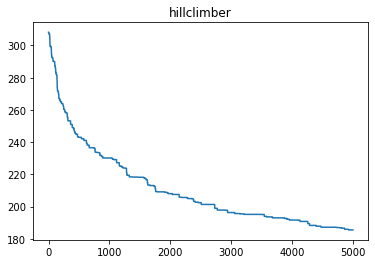

In [13]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

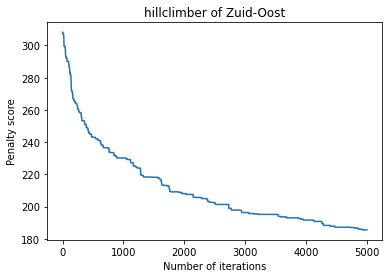

In [31]:
plt = hillclimber_df_T['best'].plot(title='hillclimber of Zuid-Oost')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_ZuidOost.pdf')

In [15]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'T']
joined = joined.append(best_solution_T, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.51285383859653
Penalties are: 286.9601111508132


### Optimization of Noord (N)

In [16]:
joined_N = joined[joined['stadsdeel'] == 'N']
all_households_N  = create_all_households(rel_poi_df, subsectie='N')
all_households_N = all_households_N.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 234.15188944296528
Penalties are: 397.382949366464
Average distance is : 246.01889807216554
Penalties are: 385.2746243359175
Average distance is : 242.44307173965024
Penalties are: 390.86624829302843
Average distance is : 240.23301502023918
Penalties are: 380.5522362617854
Average distance is : 241.23008647964917
Penalties are: 391.5664824254984
Average distance is : 245.53666152829064
Penalties are: 386.7238176764596
Average distance is : 244.57547207516322
Penalties are: 395.03356978992014
Average distance is : 247.62461317454105
Penalties are: 388.11474843999133
Average distance is : 239.60972980617325
Penalties are: 388.40844980520245
Averag

Average distance is : 234.23132480590436
Penalties are: 372.1460883937027
372.1460883937027 373.7531703361742
44.0
Amount of clusters to change: 14
Average distance is : 234.0456410124754
Penalties are: 372.5985981889204
372.5985981889204 372.1460883937027
15.0
Amount of clusters to change: 19
Average distance is : 234.57623495055716
Penalties are: 373.14011641808713
373.14011641808713 372.1460883937027
17.0
Amount of clusters to change: 21
Average distance is : 233.95088603342467
Penalties are: 369.21563584083015
369.21563584083015 372.1460883937027
49.0
Amount of clusters to change: 21
Average distance is : 236.53928459792027
Penalties are: 374.78396739859534
374.78396739859534 369.21563584083015
20.0
Amount of clusters to change: 21
Average distance is : 235.48362585092303
Penalties are: 372.745870797822
372.745870797822 369.21563584083015
23.0
Amount of clusters to change: 15
Average distance is : 233.10580192842374
Penalties are: 369.15416021543564
369.15416021543564 369.215635840

Average distance is : 234.06797215010147
Penalties are: 364.81271630366166
364.81271630366166 359.5625414693813
40.0
Amount of clusters to change: 18
Average distance is : 231.06644763738433
Penalties are: 361.49252179016725
361.49252179016725 359.5625414693813
15.0
Amount of clusters to change: 21
Average distance is : 229.87735536843593
Penalties are: 360.18279959753784
360.18279959753784 359.5625414693813
11.0
Amount of clusters to change: 14
Average distance is : 230.84634506699066
Penalties are: 359.44407510653406
359.44407510653406 359.5625414693813
20.0
Amount of clusters to change: 20
Average distance is : 232.52103433343018
Penalties are: 363.9694484986585
363.9694484986585 359.44407510653406
20.0
Amount of clusters to change: 25
Average distance is : 228.49534401631007
Penalties are: 355.4589289279514
355.4589289279514 359.44407510653406
13.0
Amount of clusters to change: 21
Average distance is : 229.9091695316946
Penalties are: 355.14378832267994
355.14378832267994 355.45892

Average distance is : 233.45065299691916
Penalties are: 355.33733855153093
355.33733855153093 351.6343146504103
13.0
Amount of clusters to change: 14
Average distance is : 233.22886314501386
Penalties are: 353.0527410333807
353.0527410333807 351.6343146504103
12.0
Amount of clusters to change: 19
Average distance is : 232.93468385254528
Penalties are: 352.6583314985795
352.6583314985795 351.6343146504103
22.0
Amount of clusters to change: 23
Average distance is : 233.7854240683528
Penalties are: 358.15041279000945
358.15041279000945 351.6343146504103
23.0
Amount of clusters to change: 20
Average distance is : 234.20925456735552
Penalties are: 353.4955936217645
353.4955936217645 351.6343146504103
15.0
Amount of clusters to change: 17
Average distance is : 234.0036326690507
Penalties are: 355.38228275923296
355.38228275923296 351.6343146504103
17.0
Amount of clusters to change: 19
Average distance is : 233.52502059663215
Penalties are: 355.79088695549245
355.79088695549245 351.6343146504

Average distance is : 233.5413681934918
Penalties are: 347.26921510022095
347.26921510022095 344.24775749684346
31.0
Amount of clusters to change: 28
Average distance is : 232.65723489769508
Penalties are: 347.809076724274
347.809076724274 344.24775749684346
33.0
Amount of clusters to change: 17
Average distance is : 231.2392790763793
Penalties are: 344.2447024739584
344.2447024739584 344.24775749684346
16.0
Amount of clusters to change: 22
Average distance is : 231.85312536653308
Penalties are: 345.21324927990844
345.21324927990844 344.2447024739584
20.0
Amount of clusters to change: 23
Average distance is : 232.03598587663882
Penalties are: 346.2058234098801
346.2058234098801 344.2447024739584
21.0
Amount of clusters to change: 27
Average distance is : 231.25957508243368
Penalties are: 349.4589283656881
349.4589283656881 344.2447024739584
11.0
Amount of clusters to change: 19
Average distance is : 232.05209189913307
Penalties are: 346.76790504655935
346.76790504655935 344.24470247395

Average distance is : 231.5059885417126
Penalties are: 344.4355590770991
344.4355590770991 342.2983506155303
21.0
Amount of clusters to change: 23
Average distance is : 231.61572016918504
Penalties are: 343.12719453322285
343.12719453322285 342.2983506155303
27.0
Amount of clusters to change: 22
Average distance is : 233.69184135279355
Penalties are: 342.9211142676768
342.9211142676768 342.2983506155303
17.0
Amount of clusters to change: 16
Average distance is : 229.613368046863
Penalties are: 345.3918939492582
345.3918939492582 342.2983506155303
20.0
Amount of clusters to change: 17
Average distance is : 231.87719835505385
Penalties are: 340.34330676886043
340.34330676886043 342.2983506155303
13.0
Amount of clusters to change: 15
Average distance is : 232.18893101352927
Penalties are: 341.4973198390151
341.4973198390151 340.34330676886043
17.0
Amount of clusters to change: 17
Average distance is : 232.11010869091726
Penalties are: 341.02388670888575
341.02388670888575 340.343306768860

Average distance is : 233.08941305610463
Penalties are: 346.656743864759
346.656743864759 339.3442239092358
9.0
Amount of clusters to change: 14
Average distance is : 232.1581878503409
Penalties are: 340.51854887528776
340.51854887528776 339.3442239092358
19.0
Amount of clusters to change: 24
Average distance is : 235.57251798884448
Penalties are: 344.0227752740441
344.0227752740441 339.3442239092358
14.0
Amount of clusters to change: 15
Average distance is : 233.155720100291
Penalties are: 343.40088163462104
343.40088163462104 339.3442239092358
23.0
Amount of clusters to change: 25
Average distance is : 233.23734130090605
Penalties are: 343.3072014484767
343.3072014484767 339.3442239092358
33.0
Amount of clusters to change: 30
Average distance is : 232.25070035735337
Penalties are: 346.4849587900734
346.4849587900734 339.3442239092358
27.0
Amount of clusters to change: 22
Average distance is : 235.77004879977832
Penalties are: 344.90225858540134
344.90225858540134 339.3442239092358
10

Average distance is : 231.64410652642547
Penalties are: 340.6332963218074
340.6332963218074 338.1767383740382
26.0
Amount of clusters to change: 24
Average distance is : 231.87259055372058
Penalties are: 342.8889353315097
342.8889353315097 338.1767383740382
23.0
Amount of clusters to change: 35
Average distance is : 233.40449359041574
Penalties are: 354.7571411941826
354.7571411941826 338.1767383740382
18.0
Amount of clusters to change: 19
Average distance is : 230.95126254164728
Penalties are: 337.9315574065692
337.9315574065692 338.1767383740382
30.0
Amount of clusters to change: 18
Average distance is : 231.44515443233217
Penalties are: 340.63256166728985
340.63256166728985 337.9315574065692
20.0
Amount of clusters to change: 22
Average distance is : 230.93707410615232
Penalties are: 338.0797989687679
338.0797989687679 337.9315574065692
21.0
Amount of clusters to change: 23
Average distance is : 231.77263119554186
Penalties are: 341.11410940329057
341.11410940329057 337.931557406569

Average distance is : 231.43652105877783
Penalties are: 338.4283698758192
338.4283698758192 335.55921856611496
8.0
Amount of clusters to change: 15
Average distance is : 230.30757267227392
Penalties are: 335.18164843642376
335.18164843642376 335.55921856611496
23.0
Amount of clusters to change: 25
Average distance is : 231.99458008798314
Penalties are: 339.05136705173874
339.05136705173874 335.18164843642376
11.0
Amount of clusters to change: 15
Average distance is : 231.33300128943353
Penalties are: 340.1599212111074
340.1599212111074 335.18164843642376
18.0
Amount of clusters to change: 19
Average distance is : 230.57473141928529
Penalties are: 336.29107818865253
336.29107818865253 335.18164843642376
42.0
Amount of clusters to change: 16
Average distance is : 230.4307637168235
Penalties are: 335.62646260799403
335.62646260799403 335.18164843642376
19.0
Amount of clusters to change: 22
Average distance is : 231.73844606845378
Penalties are: 336.6772139511543
336.6772139511543 335.1816

Average distance is : 231.84955895276397
Penalties are: 333.3463224076516
333.3463224076516 331.1757606124417
15.0
Amount of clusters to change: 19
Average distance is : 232.47994297694038
Penalties are: 335.64172041603524
335.64172041603524 331.1757606124417
17.0
Amount of clusters to change: 16
Average distance is : 232.9812897258048
Penalties are: 336.57676347588216
336.57676347588216 331.1757606124417
19.0
Amount of clusters to change: 18
Average distance is : 231.05456612623396
Penalties are: 334.79490428630464
334.79490428630464 331.1757606124417
21.0
Amount of clusters to change: 18
Average distance is : 230.133897520995
Penalties are: 330.80528922716627
330.80528922716627 331.1757606124417
26.0
Amount of clusters to change: 26
Average distance is : 233.4581963850501
Penalties are: 340.9342235549957
340.9342235549957 330.80528922716627
15.0
Amount of clusters to change: 18
Average distance is : 230.2643872041699
Penalties are: 333.8832272843564
333.8832272843564 330.805289227166

Average distance is : 232.12475253255974
Penalties are: 335.4047539114007
335.4047539114007 330.704080973373
26.0
Amount of clusters to change: 19
Average distance is : 230.7275148888267
Penalties are: 330.4723323066932
330.4723323066932 330.704080973373
20.0
Amount of clusters to change: 30
Average distance is : 231.92351088275782
Penalties are: 337.00399461751914
337.00399461751914 330.4723323066932
23.0
Amount of clusters to change: 18
Average distance is : 230.6889146418901
Penalties are: 333.8436743943479
333.8436743943479 330.4723323066932
55.0
Amount of clusters to change: 27
Average distance is : 233.24078193089338
Penalties are: 340.106456487513
340.106456487513 330.4723323066932
16.0
Amount of clusters to change: 16
Average distance is : 231.214493596762
Penalties are: 333.91112980930075
333.91112980930075 330.4723323066932
24.0
Amount of clusters to change: 26
Average distance is : 232.1061807674298
Penalties are: 334.5860588136894
334.5860588136894 330.4723323066932
13.0
Am

Average distance is : 234.77420254774182
Penalties are: 334.1800127170361
334.1800127170361 329.5282669987008
21.0
Amount of clusters to change: 23
Average distance is : 233.27667943534516
Penalties are: 332.85259753336743
332.85259753336743 329.5282669987008
15.0
Amount of clusters to change: 21
Average distance is : 238.27468454344861
Penalties are: 341.2040029922438
341.2040029922438 329.5282669987008
20.0
Amount of clusters to change: 16
Average distance is : 232.79960744015108
Penalties are: 330.58574594472225
330.58574594472225 329.5282669987008
17.0
Amount of clusters to change: 18
Average distance is : 233.16492800109995
Penalties are: 329.84593663136343
329.84593663136343 329.5282669987008
9.0
Amount of clusters to change: 18
Average distance is : 235.30180202000972
Penalties are: 337.41797959565343
337.41797959565343 329.5282669987008
18.0
Amount of clusters to change: 28
Average distance is : 232.28399947710915
Penalties are: 331.67337459151935
331.67337459151935 329.5282669

Average distance is : 233.45409749729876
Penalties are: 332.77472603252096
332.77472603252096 327.70763926729404
22.0
Amount of clusters to change: 19
Average distance is : 234.23392446811292
Penalties are: 334.00746443757623
334.00746443757623 327.70763926729404
7.0
Amount of clusters to change: 14
Average distance is : 233.78757696568718
Penalties are: 329.6616445529352
329.6616445529352 327.70763926729404
14.0
Amount of clusters to change: 14
Average distance is : 233.17141537071058
Penalties are: 331.06535901019726
331.06535901019726 327.70763926729404
14.0
Amount of clusters to change: 12
Average distance is : 232.91447336511916
Penalties are: 329.20643047954644
329.20643047954644 327.70763926729404
22.0
Amount of clusters to change: 19
Average distance is : 233.2218086428157
Penalties are: 332.2534848911374
332.2534848911374 327.70763926729404
8.0
Amount of clusters to change: 15
Average distance is : 232.98746966428718
Penalties are: 330.4796066380566
330.4796066380566 327.70763

Average distance is : 233.03113787883242
Penalties are: 331.3567971081539
331.3567971081539 327.1844289440529
24.0
Amount of clusters to change: 17
Average distance is : 235.5268118352936
Penalties are: 328.8064227922359
328.8064227922359 327.1844289440529
19.0
Amount of clusters to change: 26
Average distance is : 232.38202643960955
Penalties are: 328.5349854226544
328.5349854226544 327.1844289440529
15.0
Amount of clusters to change: 20
Average distance is : 233.033704515229
Penalties are: 333.08899376943975
333.08899376943975 327.1844289440529
22.0
Amount of clusters to change: 19
Average distance is : 232.08855366942177
Penalties are: 330.3498405252176
330.3498405252176 327.1844289440529
25.0
Amount of clusters to change: 20
Average distance is : 234.4786828856477
Penalties are: 330.67199435596865
330.67199435596865 327.1844289440529
17.0
Amount of clusters to change: 19
Average distance is : 231.075656278053
Penalties are: 331.47679184219857
331.47679184219857 327.1844289440529
12

Average distance is : 232.71540722103106
Penalties are: 328.9368383893067
328.9368383893067 326.2632453541478
17.0
Amount of clusters to change: 14
Average distance is : 232.0071172299149
Penalties are: 328.3706772117012
328.3706772117012 326.2632453541478
10.0
Amount of clusters to change: 20
Average distance is : 231.9690297016219
Penalties are: 328.93913089098
328.93913089098 326.2632453541478
24.0
Amount of clusters to change: 22
Average distance is : 231.66798605013418
Penalties are: 327.4188798673176
327.4188798673176 326.2632453541478
18.0
Amount of clusters to change: 21
Average distance is : 232.20483704008458
Penalties are: 330.8890278751132
330.8890278751132 326.2632453541478
24.0
Amount of clusters to change: 23
Average distance is : 231.80369826783527
Penalties are: 328.52663563526124
328.52663563526124 326.2632453541478
37.0
Amount of clusters to change: 28
Average distance is : 232.4204176344014
Penalties are: 331.37102634946257
331.37102634946257 326.2632453541478
15.0


Average distance is : 232.1975441112524
Penalties are: 329.9154660222843
329.9154660222843 325.6299358734596
18.0
Amount of clusters to change: 19
Average distance is : 234.0754922757115
Penalties are: 328.18985724831686
328.18985724831686 325.6299358734596
25.0
Amount of clusters to change: 21
Average distance is : 232.3704307300805
Penalties are: 330.7720578467656
330.7720578467656 325.6299358734596
20.0
Amount of clusters to change: 23
Average distance is : 232.5913670024846
Penalties are: 328.5476843674948
328.5476843674948 325.6299358734596
10.0
Amount of clusters to change: 19
Average distance is : 233.09804857250663
Penalties are: 328.2083590790976
328.2083590790976 325.6299358734596
5.0
Amount of clusters to change: 9
Average distance is : 232.05582021186726
Penalties are: 327.81969946651446
327.81969946651446 325.6299358734596
7.0
Amount of clusters to change: 12
Average distance is : 233.5264856497202
Penalties are: 327.8343815110831
327.8343815110831 325.6299358734596
22.0
A

Average distance is : 231.63882135698424
Penalties are: 321.96574416315605
321.96574416315605 325.28940458285757
24.0
Amount of clusters to change: 28
Average distance is : 231.1572219912677
Penalties are: 323.90041843182803
323.90041843182803 321.96574416315605
15.0
Amount of clusters to change: 15
Average distance is : 231.64880802955528
Penalties are: 327.9789608744439
327.9789608744439 321.96574416315605
10.0
Amount of clusters to change: 17
Average distance is : 230.6779882225374
Penalties are: 322.6406274459625
322.6406274459625 321.96574416315605
12.0
Amount of clusters to change: 11
Average distance is : 231.72085441528526
Penalties are: 322.09281399858264
322.09281399858264 321.96574416315605
12.0
Amount of clusters to change: 15
Average distance is : 232.48196813014783
Penalties are: 324.33553025709676
324.33553025709676 321.96574416315605
14.0
Amount of clusters to change: 20
Average distance is : 231.78466600823927
Penalties are: 326.26077785542736
326.26077785542736 321.96

Average distance is : 231.8501902821763
Penalties are: 330.24488853905524
330.24488853905524 320.2157426945495
31.0
Amount of clusters to change: 29
Average distance is : 229.08271926687408
Penalties are: 322.2366180046981
322.2366180046981 320.2157426945495
27.0
Amount of clusters to change: 16
Average distance is : 233.03057334898915
Penalties are: 326.21965397566163
326.21965397566163 320.2157426945495
20.0
Amount of clusters to change: 17
Average distance is : 230.25596721985875
Penalties are: 321.0799121573724
321.0799121573724 320.2157426945495
40.0
Amount of clusters to change: 20
Average distance is : 231.56116139018462
Penalties are: 323.50771816910833
323.50771816910833 320.2157426945495
12.0
Amount of clusters to change: 22
Average distance is : 230.5542323566364
Penalties are: 322.763809359247
322.763809359247 320.2157426945495
15.0
Amount of clusters to change: 17
Average distance is : 230.22764914277437
Penalties are: 320.8907960676591
320.8907960676591 320.2157426945495


Average distance is : 231.15672469524642
Penalties are: 316.546646942684
316.546646942684 316.94357507551973
14.0
Amount of clusters to change: 13
Average distance is : 232.1560111661489
Penalties are: 317.9399483585684
317.9399483585684 316.546646942684
18.0
Amount of clusters to change: 20
Average distance is : 233.11515788657334
Penalties are: 321.82299201366266
321.82299201366266 316.546646942684
18.0
Amount of clusters to change: 18
Average distance is : 231.33124871226306
Penalties are: 324.76033723271934
324.76033723271934 316.546646942684
31.0
Amount of clusters to change: 21
Average distance is : 234.1148753456937
Penalties are: 320.659821664791
320.659821664791 316.546646942684
22.0
Amount of clusters to change: 24
Average distance is : 231.78222720096224
Penalties are: 322.54473110031785
322.54473110031785 316.546646942684
16.0
Amount of clusters to change: 18
Average distance is : 231.3383163224362
Penalties are: 321.38109054472943
321.38109054472943 316.546646942684
13.0
A

Average distance is : 231.577263268864
Penalties are: 319.54227149598216
319.54227149598216 316.546646942684
30.0
Amount of clusters to change: 18
Average distance is : 232.4422915720326
Penalties are: 325.723450492606
325.723450492606 316.546646942684
11.0
Amount of clusters to change: 11
Average distance is : 231.12577079602227
Penalties are: 319.5859231870324
319.5859231870324 316.546646942684
20.0
Amount of clusters to change: 20
Average distance is : 231.99562535601763
Penalties are: 323.76876936355745
323.76876936355745 316.546646942684
19.0
Amount of clusters to change: 22
Average distance is : 231.5135508606628
Penalties are: 320.6777370530514
320.6777370530514 316.546646942684
10.0
Amount of clusters to change: 15
Average distance is : 231.60381248275897
Penalties are: 318.92757744476694
318.92757744476694 316.546646942684
21.0
Amount of clusters to change: 24
Average distance is : 231.1921851305527
Penalties are: 318.3714813717941
318.3714813717941 316.546646942684
13.0
Amoun

Average distance is : 230.96846083786087
Penalties are: 319.56683573219607
319.56683573219607 312.94263395131196
17.0
Amount of clusters to change: 21
Average distance is : 229.87097718081586
Penalties are: 323.30855542173435
323.30855542173435 312.94263395131196
13.0
Amount of clusters to change: 18
Average distance is : 228.59947659480315
Penalties are: 314.1452892159766
314.1452892159766 312.94263395131196
16.0
Amount of clusters to change: 22
Average distance is : 231.71126606859286
Penalties are: 323.0870119153389
323.0870119153389 312.94263395131196
18.0
Amount of clusters to change: 13
Average distance is : 228.69098077952506
Penalties are: 314.8232413867993
314.8232413867993 312.94263395131196
22.0
Amount of clusters to change: 10
Average distance is : 229.26898274387193
Penalties are: 316.3525787675966
316.3525787675966 312.94263395131196
21.0
Amount of clusters to change: 20
Average distance is : 228.67608813681775
Penalties are: 314.2548927027186
314.2548927027186 312.942633

Average distance is : 229.00041977346794
Penalties are: 313.7926413749531
313.7926413749531 311.3815989061975
28.0
Amount of clusters to change: 26
Average distance is : 228.57971216881273
Penalties are: 314.5269494165729
314.5269494165729 311.3815989061975
12.0
Amount of clusters to change: 18
Average distance is : 226.33854762164114
Penalties are: 312.06775935359036
312.06775935359036 311.3815989061975
12.0
Amount of clusters to change: 20
Average distance is : 229.48390593811598
Penalties are: 313.98078000552823
313.98078000552823 311.3815989061975
16.0
Amount of clusters to change: 22
Average distance is : 230.05139904171344
Penalties are: 318.108361416048
318.108361416048 311.3815989061975
17.0
Amount of clusters to change: 21
Average distance is : 226.65278283603396
Penalties are: 314.0056654164282
314.0056654164282 311.3815989061975
21.0
Amount of clusters to change: 21
Average distance is : 229.9237727713334
Penalties are: 317.04012205571684
317.04012205571684 311.3815989061975

Average distance is : 229.37210907250972
Penalties are: 323.3398882970328
323.3398882970328 310.89142631641295
35.0
Amount of clusters to change: 25
Average distance is : 228.33306561929047
Penalties are: 316.33076694037067
316.33076694037067 310.89142631641295
16.0
Amount of clusters to change: 23
Average distance is : 228.82898484158392
Penalties are: 314.4199211040692
314.4199211040692 310.89142631641295
21.0
Amount of clusters to change: 14
Average distance is : 227.84362486474194
Penalties are: 312.12313894647474
312.12313894647474 310.89142631641295
16.0
Amount of clusters to change: 18
Average distance is : 229.56407167369983
Penalties are: 312.9692894627732
312.9692894627732 310.89142631641295
33.0
Amount of clusters to change: 20
Average distance is : 229.67295574042774
Penalties are: 317.72990833975
317.72990833975 310.89142631641295
28.0
Amount of clusters to change: 31
Average distance is : 229.62597583990134
Penalties are: 317.4513185946415
317.4513185946415 310.8914263164

Average distance is : 229.83148990400272
Penalties are: 314.86866888783584
314.86866888783584 310.89142631641295
15.0
Amount of clusters to change: 20
Average distance is : 228.29756974803587
Penalties are: 312.5805444727438
312.5805444727438 310.89142631641295
18.0
Amount of clusters to change: 22
Average distance is : 228.31811092778415
Penalties are: 313.4491879207882
313.4491879207882 310.89142631641295
25.0
Amount of clusters to change: 28
Average distance is : 228.83448518748625
Penalties are: 314.39953697012777
314.39953697012777 310.89142631641295
18.0
Amount of clusters to change: 25
Average distance is : 229.73426188399043
Penalties are: 312.503552103694
312.503552103694 310.89142631641295
16.0
Amount of clusters to change: 25
Average distance is : 228.11372706682937
Penalties are: 314.916212431141
314.916212431141 310.89142631641295
26.0
Amount of clusters to change: 27
Average distance is : 228.5412773310464
Penalties are: 314.8881222136666
314.8881222136666 310.89142631641

Average distance is : 228.67807786404407
Penalties are: 314.91586748652753
314.91586748652753 310.5871189916896
13.0
Amount of clusters to change: 20
Average distance is : 229.27280486204378
Penalties are: 315.94941940227795
315.94941940227795 310.5871189916896
9.0
Amount of clusters to change: 17
Average distance is : 228.59945738678738
Penalties are: 314.999977022839
314.999977022839 310.5871189916896
21.0
Amount of clusters to change: 23
Average distance is : 229.45046576723743
Penalties are: 313.0410569494068
313.0410569494068 310.5871189916896
10.0
Amount of clusters to change: 10
Average distance is : 227.49045848334356
Penalties are: 312.40600063167454
312.40600063167454 310.5871189916896
19.0
Amount of clusters to change: 24
Average distance is : 227.7702068256542
Penalties are: 312.7155368443909
312.7155368443909 310.5871189916896
8.0
Amount of clusters to change: 9
Average distance is : 227.64265527362863
Penalties are: 310.7074796186265
310.7074796186265 310.5871189916896
16

Average distance is : 228.44765199327134
Penalties are: 312.3756863834659
312.3756863834659 310.5871189916896
18.0
Amount of clusters to change: 18
Average distance is : 227.14030271420816
Penalties are: 314.1876394125427
314.1876394125427 310.5871189916896
22.0
Amount of clusters to change: 24
Average distance is : 229.22021914886312
Penalties are: 323.06863232594407
323.06863232594407 310.5871189916896
18.0
Amount of clusters to change: 20
Average distance is : 228.38323773453348
Penalties are: 313.6335301032393
313.6335301032393 310.5871189916896
14.0
Amount of clusters to change: 19
Average distance is : 228.34686172650544
Penalties are: 312.94404692157366
312.94404692157366 310.5871189916896
21.0
Amount of clusters to change: 17
Average distance is : 228.42512528994183
Penalties are: 313.2748355573541
313.2748355573541 310.5871189916896
8.0
Amount of clusters to change: 16
Average distance is : 225.47964375171367
Penalties are: 313.5690189008863
313.5690189008863 310.5871189916896

Average distance is : 228.99442989557605
Penalties are: 309.44666313981725
309.44666313981725 307.6895967350323
12.0
Amount of clusters to change: 17
Average distance is : 225.43362827327914
Penalties are: 313.19386796028346
313.19386796028346 307.6895967350323
20.0
Amount of clusters to change: 20
Average distance is : 227.82113306418748
Penalties are: 311.07278419431884
311.07278419431884 307.6895967350323
17.0
Amount of clusters to change: 22
Average distance is : 225.51247140491975
Penalties are: 312.35217326634955
312.35217326634955 307.6895967350323
10.0
Amount of clusters to change: 19
Average distance is : 226.06065227059167
Penalties are: 309.82823121261765
309.82823121261765 307.6895967350323
9.0
Amount of clusters to change: 7
Average distance is : 226.29449554250058
Penalties are: 307.466258779289
307.466258779289 307.6895967350323
14.0
Amount of clusters to change: 18
Average distance is : 226.79996903150393
Penalties are: 310.087666742336
310.087666742336 307.466258779289

Average distance is : 228.87953956873534
Penalties are: 309.52978694802505
309.52978694802505 307.03756050257607
18.0
Amount of clusters to change: 18
Average distance is : 228.18668556259715
Penalties are: 310.06525461418505
310.06525461418505 307.03756050257607
15.0
Amount of clusters to change: 16
Average distance is : 229.33052659524537
Penalties are: 310.5529067293077
310.5529067293077 307.03756050257607
13.0
Amount of clusters to change: 22
Average distance is : 229.94123603278788
Penalties are: 311.41552395428255
311.41552395428255 307.03756050257607
21.0
Amount of clusters to change: 23
Average distance is : 228.8217808381031
Penalties are: 310.67708679602833
310.67708679602833 307.03756050257607
23.0
Amount of clusters to change: 24
Average distance is : 229.72558920125593
Penalties are: 309.8537340822123
309.8537340822123 307.03756050257607
18.0
Amount of clusters to change: 17
Average distance is : 227.72400470452405
Penalties are: 309.781894796581
309.781894796581 307.03756

Average distance is : 230.06312375521898
Penalties are: 320.7356173327275
320.7356173327275 307.03756050257607
16.0
Amount of clusters to change: 24
Average distance is : 228.73131359147774
Penalties are: 309.33075815748435
309.33075815748435 307.03756050257607
18.0
Amount of clusters to change: 20
Average distance is : 228.44681652894047
Penalties are: 312.3889542825559
312.3889542825559 307.03756050257607
10.0
Amount of clusters to change: 16
Average distance is : 228.06425054823058
Penalties are: 305.8236697230502
305.8236697230502 307.03756050257607
18.0
Amount of clusters to change: 18
Average distance is : 228.08646839163265
Penalties are: 311.83029491304603
311.83029491304603 305.8236697230502
21.0
Amount of clusters to change: 19
Average distance is : 230.765785865636
Penalties are: 306.6557740875264
306.6557740875264 305.8236697230502
8.0
Amount of clusters to change: 15
Average distance is : 227.84854487424815
Penalties are: 310.87256552636256
310.87256552636256 305.823669723

Average distance is : 230.32614112507406
Penalties are: 319.86356074932394
319.86356074932394 304.61908531554116
14.0
Amount of clusters to change: 18
Average distance is : 226.59467873114198
Penalties are: 305.8296568230719
305.8296568230719 304.61908531554116
13.0
Amount of clusters to change: 15
Average distance is : 226.88306043766323
Penalties are: 305.4653312540714
305.4653312540714 304.61908531554116
17.0
Amount of clusters to change: 19
Average distance is : 227.5037536016246
Penalties are: 307.6083861209262
307.6083861209262 304.61908531554116
13.0
Amount of clusters to change: 17
Average distance is : 227.29849725399566
Penalties are: 310.37985481355736
310.37985481355736 304.61908531554116
37.0
Amount of clusters to change: 20
Average distance is : 229.49549962245374
Penalties are: 310.2591107503109
310.2591107503109 304.61908531554116
33.0
Amount of clusters to change: 24
Average distance is : 229.76114140511726
Penalties are: 312.9063656704633
312.9063656704633 304.6190853

Average distance is : 227.7890866854223
Penalties are: 314.70716565664543
314.70716565664543 304.22944966343596
13.0
Amount of clusters to change: 15
Average distance is : 226.89955120381393
Penalties are: 307.06228054245054
307.06228054245054 304.22944966343596
21.0
Amount of clusters to change: 19
Average distance is : 228.79414336868402
Penalties are: 310.8312698928127
310.8312698928127 304.22944966343596
20.0
Amount of clusters to change: 22
Average distance is : 226.9862370898326
Penalties are: 306.7594410173908
306.7594410173908 304.22944966343596
15.0
Amount of clusters to change: 17
Average distance is : 228.88067927862278
Penalties are: 310.12483222132295
310.12483222132295 304.22944966343596
13.0
Amount of clusters to change: 25
Average distance is : 226.77373003434917
Penalties are: 308.91699047553243
308.91699047553243 304.22944966343596
28.0
Amount of clusters to change: 20
Average distance is : 227.3256062505602
Penalties are: 313.8519573323595
313.8519573323595 304.22944

Average distance is : 227.84563833507593
Penalties are: 310.6476602281924
310.6476602281924 304.22944966343596
17.0
Amount of clusters to change: 21
Average distance is : 228.41473826588376
Penalties are: 308.4669069760556
308.4669069760556 304.22944966343596
21.0
Amount of clusters to change: 16
Average distance is : 227.82306782289237
Penalties are: 309.82040926587575
309.82040926587575 304.22944966343596
17.0
Amount of clusters to change: 18
Average distance is : 227.7150326258558
Penalties are: 307.30967620758406
307.30967620758406 304.22944966343596
25.0
Amount of clusters to change: 25
Average distance is : 228.14766860635876
Penalties are: 315.6364813261217
315.6364813261217 304.22944966343596
21.0
Amount of clusters to change: 17
Average distance is : 228.43503248246859
Penalties are: 308.7016755857794
308.7016755857794 304.22944966343596
33.0
Amount of clusters to change: 25
Average distance is : 227.7746444513863
Penalties are: 312.25195072938664
312.25195072938664 304.229449

Average distance is : 227.31952265277877
Penalties are: 308.4120653487041
308.4120653487041 304.13142741664865
55.0
Amount of clusters to change: 25
Average distance is : 225.98672591598154
Penalties are: 307.886483142186
307.886483142186 304.13142741664865
4.0
Amount of clusters to change: 11
Average distance is : 226.65021005926243
Penalties are: 307.5360608677629
307.5360608677629 304.13142741664865
14.0
Amount of clusters to change: 13
Average distance is : 227.55960292055875
Penalties are: 311.9918413707337
311.9918413707337 304.13142741664865
25.0
Amount of clusters to change: 25
Average distance is : 228.08786256194207
Penalties are: 313.7523326259895
313.7523326259895 304.13142741664865
15.0
Amount of clusters to change: 19
Average distance is : 227.70762534627048
Penalties are: 307.6665379103417
307.6665379103417 304.13142741664865
22.0
Amount of clusters to change: 23
Average distance is : 230.24751820064836
Penalties are: 310.7335908426933
310.7335908426933 304.1314274166486

Average distance is : 227.4599832892946
Penalties are: 305.54741279930516
305.54741279930516 304.13142741664865
15.0
Amount of clusters to change: 23
Average distance is : 228.1881629977494
Penalties are: 304.0784735387592
304.0784735387592 304.13142741664865
13.0
Amount of clusters to change: 14
Average distance is : 229.64397925899397
Penalties are: 309.5370380978701
309.5370380978701 304.0784735387592
23.0
Amount of clusters to change: 27
Average distance is : 229.55028349048723
Penalties are: 306.1398091355929
306.1398091355929 304.0784735387592
21.0
Amount of clusters to change: 25
Average distance is : 228.58075907223486
Penalties are: 308.9248871572672
308.9248871572672 304.0784735387592
45.0
Amount of clusters to change: 21
Average distance is : 228.99552506981814
Penalties are: 311.5941453443613
311.5941453443613 304.0784735387592
35.0
Amount of clusters to change: 21
Average distance is : 229.75726506712573
Penalties are: 311.91590703527504
311.91590703527504 304.078473538759

Average distance is : 228.73841024989636
Penalties are: 309.8210884146944
309.8210884146944 304.0784735387592
21.0
Amount of clusters to change: 19
Average distance is : 227.63081287234112
Penalties are: 306.90669347993446
306.90669347993446 304.0784735387592
20.0
Amount of clusters to change: 26
Average distance is : 228.25488596301716
Penalties are: 308.0959639254624
308.0959639254624 304.0784735387592
15.0
Amount of clusters to change: 15
Average distance is : 229.01481949208747
Penalties are: 309.0671326319114
309.0671326319114 304.0784735387592
30.0
Amount of clusters to change: 22
Average distance is : 227.29397454617174
Penalties are: 311.45223428216116
311.45223428216116 304.0784735387592
6.0
Amount of clusters to change: 12
Average distance is : 228.37014012534925
Penalties are: 303.94150080933304
303.94150080933304 304.0784735387592
14.0
Amount of clusters to change: 15
Average distance is : 227.43283724997363
Penalties are: 305.47074279002743
305.47074279002743 303.941500809

Average distance is : 228.4750037707483
Penalties are: 303.320288912138
303.320288912138 302.8400955210327
23.0
Amount of clusters to change: 23
Average distance is : 230.21630548222458
Penalties are: 308.08817966205413
308.08817966205413 302.8400955210327
8.0
Amount of clusters to change: 15
Average distance is : 228.91016143189785
Penalties are: 307.9142639215144
307.9142639215144 302.8400955210327
22.0
Amount of clusters to change: 24
Average distance is : 228.19070512583804
Penalties are: 303.3050109457352
303.3050109457352 302.8400955210327
30.0
Amount of clusters to change: 24
Average distance is : 229.4370078205103
Penalties are: 306.97220593576657
306.97220593576657 302.8400955210327
15.0
Amount of clusters to change: 22
Average distance is : 230.99682961814145
Penalties are: 307.2863722536963
307.2863722536963 302.8400955210327
8.0
Amount of clusters to change: 19
Average distance is : 229.85384794499473
Penalties are: 310.40341006533885
310.40341006533885 302.8400955210327
23

Average distance is : 227.31616263180774
Penalties are: 303.8383944313942
303.8383944313942 301.0801258216703
15.0
Amount of clusters to change: 18
Average distance is : 226.59981938863376
Penalties are: 305.9288785803115
305.9288785803115 301.0801258216703
13.0
Amount of clusters to change: 16
Average distance is : 226.99981961548164
Penalties are: 301.6795797192996
301.6795797192996 301.0801258216703
17.0
Amount of clusters to change: 21
Average distance is : 227.71001374808722
Penalties are: 307.0507823881245
307.0507823881245 301.0801258216703
27.0
Amount of clusters to change: 25
Average distance is : 227.843294278005
Penalties are: 313.1195247340058
313.1195247340058 301.0801258216703
14.0
Amount of clusters to change: 20
Average distance is : 228.11317977838613
Penalties are: 307.1103978661245
307.1103978661245 301.0801258216703
27.0
Amount of clusters to change: 26
Average distance is : 227.10428135329332
Penalties are: 309.63004433001896
309.63004433001896 301.0801258216703
19

Average distance is : 228.80918347232483
Penalties are: 302.6241652322391
302.6241652322391 299.3200373773663
16.0
Amount of clusters to change: 16
Average distance is : 228.4548551096952
Penalties are: 300.6539483408674
300.6539483408674 299.3200373773663
48.0
Amount of clusters to change: 19
Average distance is : 229.16848293508795
Penalties are: 303.39066842022146
303.39066842022146 299.3200373773663
13.0
Amount of clusters to change: 16
Average distance is : 229.72823134520985
Penalties are: 303.0598403541326
303.0598403541326 299.3200373773663
21.0
Amount of clusters to change: 12
Average distance is : 228.82398208476548
Penalties are: 302.18355306066053
302.18355306066053 299.3200373773663
12.0
Amount of clusters to change: 14
Average distance is : 230.81533600870918
Penalties are: 304.77097367693796
304.77097367693796 299.3200373773663
51.0
Amount of clusters to change: 25
Average distance is : 228.53842814780774
Penalties are: 303.00338721648666
303.00338721648666 299.320037377

Average distance is : 231.31028032074389
Penalties are: 310.71139681004365
310.71139681004365 299.3200373773663
31.0
Amount of clusters to change: 27
Average distance is : 228.56529589076814
Penalties are: 302.1228937997197
302.1228937997197 299.3200373773663
14.0
Amount of clusters to change: 22
Average distance is : 227.55909924668035
Penalties are: 300.4894863795179
300.4894863795179 299.3200373773663
29.0
Amount of clusters to change: 28
Average distance is : 230.99196954684504
Penalties are: 320.7132710772025
320.7132710772025 299.3200373773663
15.0
Amount of clusters to change: 19
Average distance is : 228.23852842391523
Penalties are: 302.87650857695576
302.87650857695576 299.3200373773663
14.0
Amount of clusters to change: 14
Average distance is : 229.73638448473048
Penalties are: 308.95292778183534
308.95292778183534 299.3200373773663
40.0
Amount of clusters to change: 19
Average distance is : 228.63528390064232
Penalties are: 300.0931837481987
300.0931837481987 299.3200373773

Average distance is : 228.59041458816716
Penalties are: 302.22366960461125
302.22366960461125 298.32037570816635
25.0
Amount of clusters to change: 13
Average distance is : 229.58371116799606
Penalties are: 303.7595363410253
303.7595363410253 298.32037570816635
23.0
Amount of clusters to change: 23
Average distance is : 229.178787628356
Penalties are: 300.0545230462504
300.0545230462504 298.32037570816635
25.0
Amount of clusters to change: 23
Average distance is : 230.26335155163926
Penalties are: 303.7110203320239
303.7110203320239 298.32037570816635
16.0
Amount of clusters to change: 17
Average distance is : 231.18453169389468
Penalties are: 305.21066789711597
305.21066789711597 298.32037570816635
22.0
Amount of clusters to change: 26
Average distance is : 229.57746837396337
Penalties are: 309.45182340748926
309.45182340748926 298.32037570816635
21.0
Amount of clusters to change: 17
Average distance is : 230.61486035345513
Penalties are: 304.9831226094516
304.9831226094516 298.320375

Average distance is : 229.19212814645925
Penalties are: 306.69138966422554
306.69138966422554 297.73133378076943
55.0
Amount of clusters to change: 22
Average distance is : 228.10218113271463
Penalties are: 300.1141773919738
300.1141773919738 297.73133378076943
19.0
Amount of clusters to change: 23
Average distance is : 226.96305657683735
Penalties are: 302.98599089006893
302.98599089006893 297.73133378076943
14.0
Amount of clusters to change: 20
Average distance is : 227.2034828934049
Penalties are: 297.57584444027714
297.57584444027714 297.73133378076943
14.0
Amount of clusters to change: 21
Average distance is : 229.44722522292827
Penalties are: 299.74419242385363
299.74419242385363 297.57584444027714
28.0
Amount of clusters to change: 29
Average distance is : 228.57226513867548
Penalties are: 307.5884623166663
307.5884623166663 297.57584444027714
11.0
Amount of clusters to change: 15
Average distance is : 227.56335066815944
Penalties are: 302.57429214947
302.57429214947 297.5758444

Average distance is : 227.4176874101159
Penalties are: 301.0249811287234
301.0249811287234 297.57584444027714
12.0
Amount of clusters to change: 16
Average distance is : 227.15652170239306
Penalties are: 303.3589144969305
303.3589144969305 297.57584444027714
36.0
Amount of clusters to change: 28
Average distance is : 228.04555232725954
Penalties are: 299.00200997848356
299.00200997848356 297.57584444027714
25.0
Amount of clusters to change: 23
Average distance is : 229.05620384673904
Penalties are: 308.6210617887624
308.6210617887624 297.57584444027714
13.0
Amount of clusters to change: 17
Average distance is : 229.58291286230033
Penalties are: 303.99292248169127
303.99292248169127 297.57584444027714
17.0
Amount of clusters to change: 22
Average distance is : 226.78197142429715
Penalties are: 304.4674381551156
304.4674381551156 297.57584444027714
14.0
Amount of clusters to change: 17
Average distance is : 230.23237597912802
Penalties are: 306.0533405483833
306.0533405483833 297.5758444

Average distance is : 228.22689697663006
Penalties are: 300.72858499053024
300.72858499053024 297.57584444027714
41.0
Amount of clusters to change: 25
Average distance is : 228.74394437661272
Penalties are: 301.4800174203991
301.4800174203991 297.57584444027714
35.0
Amount of clusters to change: 25
Average distance is : 230.24623601088956
Penalties are: 305.16785138869693
305.16785138869693 297.57584444027714
12.0
Amount of clusters to change: 18
Average distance is : 228.63044222102454
Penalties are: 302.2726620687618
302.2726620687618 297.57584444027714
26.0
Amount of clusters to change: 21
Average distance is : 227.2626211864562
Penalties are: 299.57120965672436
299.57120965672436 297.57584444027714
43.0
Amount of clusters to change: 25
Average distance is : 229.84307148217522
Penalties are: 306.6596447719063
306.6596447719063 297.57584444027714
26.0
Amount of clusters to change: 19
Average distance is : 227.1813212096073
Penalties are: 297.71925862137033
297.71925862137033 297.5758

Average distance is : 229.54770005003707
Penalties are: 308.9325389072031
308.9325389072031 297.57584444027714
22.0
Amount of clusters to change: 22
Average distance is : 228.524128461986
Penalties are: 306.0213374030281
306.0213374030281 297.57584444027714
15.0
Amount of clusters to change: 23
Average distance is : 227.2582250912431
Penalties are: 300.8985816538029
300.8985816538029 297.57584444027714
33.0
Amount of clusters to change: 18
Average distance is : 227.71996041559893
Penalties are: 307.61733471841126
307.61733471841126 297.57584444027714
34.0
Amount of clusters to change: 30
Average distance is : 228.74950520590323
Penalties are: 307.864429336463
307.864429336463 297.57584444027714
13.0
Amount of clusters to change: 18
Average distance is : 227.46441126033983
Penalties are: 297.66076583627785
297.66076583627785 297.57584444027714
22.0
Amount of clusters to change: 22
Average distance is : 227.34454158101533
Penalties are: 302.2900948103989
302.2900948103989 297.57584444027

Average distance is : 227.10480386408713
Penalties are: 297.3652744132336
297.3652744132336 296.7714953611402
24.0
Amount of clusters to change: 20
Average distance is : 227.82985831299095
Penalties are: 301.1531426202649
301.1531426202649 296.7714953611402
25.0
Amount of clusters to change: 20
Average distance is : 227.21292335928345
Penalties are: 299.9085744487653
299.9085744487653 296.7714953611402
25.0
Amount of clusters to change: 21
Average distance is : 227.30205487630957
Penalties are: 297.828256686867
297.828256686867 296.7714953611402
32.0
Amount of clusters to change: 23
Average distance is : 229.35888882803363
Penalties are: 308.44608351921676
308.44608351921676 296.7714953611402
17.0
Amount of clusters to change: 19
Average distance is : 228.9710888291105
Penalties are: 307.46776622120456
307.46776622120456 296.7714953611402
12.0
Amount of clusters to change: 22
Average distance is : 228.55390083604811
Penalties are: 305.0007888923982
305.0007888923982 296.7714953611402
1

Average distance is : 228.53718442806698
Penalties are: 304.5906776387216
304.5906776387216 295.94272023727274
5.0
Amount of clusters to change: 10
Average distance is : 229.42382069937128
Penalties are: 302.7845378017727
302.7845378017727 295.94272023727274
15.0
Amount of clusters to change: 21
Average distance is : 226.5873072329512
Penalties are: 312.52851704534237
312.52851704534237 295.94272023727274
11.0
Amount of clusters to change: 14
Average distance is : 228.0275328341247
Penalties are: 298.4144089796483
298.4144089796483 295.94272023727274
35.0
Amount of clusters to change: 27
Average distance is : 226.33297048438016
Penalties are: 301.920042144535
301.920042144535 295.94272023727274
11.0
Amount of clusters to change: 13
Average distance is : 228.20422002095444
Penalties are: 298.10682199928976
298.10682199928976 295.94272023727274
35.0
Amount of clusters to change: 17
Average distance is : 228.68745448871255
Penalties are: 298.88277853885785
298.88277853885785 295.942720237

Average distance is : 229.7848558605674
Penalties are: 302.99313278983
302.99313278983 295.94272023727274
15.0
Amount of clusters to change: 23
Average distance is : 226.88457125197016
Penalties are: 299.24491754673403
299.24491754673403 295.94272023727274
20.0
Amount of clusters to change: 21
Average distance is : 227.93325766674087
Penalties are: 303.82058853313333
303.82058853313333 295.94272023727274
11.0
Amount of clusters to change: 18
Average distance is : 229.7427209466643
Penalties are: 302.76251195246647
302.76251195246647 295.94272023727274
12.0
Amount of clusters to change: 16
Average distance is : 227.62813582674383
Penalties are: 296.0486005645591
296.0486005645591 295.94272023727274
22.0
Amount of clusters to change: 22
Average distance is : 229.40019454835635
Penalties are: 301.266543072307
301.266543072307 295.94272023727274
27.0
Amount of clusters to change: 23
Average distance is : 228.2412049202458
Penalties are: 304.88736107108315
304.88736107108315 295.94272023727

Average distance is : 227.4996386398605
Penalties are: 304.8499763948075
304.8499763948075 295.94272023727274
27.0
Amount of clusters to change: 27
Average distance is : 226.43762419282012
Penalties are: 295.59787871849034
295.59787871849034 295.94272023727274
23.0
Amount of clusters to change: 24
Average distance is : 227.518593104265
Penalties are: 300.51572357330383
300.51572357330383 295.59787871849034
22.0
Amount of clusters to change: 18
Average distance is : 228.1912126186617
Penalties are: 300.9334655145186
300.9334655145186 295.59787871849034
15.0
Amount of clusters to change: 19
Average distance is : 227.07902967423652
Penalties are: 298.1913084940485
298.1913084940485 295.59787871849034
13.0
Amount of clusters to change: 14
Average distance is : 226.32357741744534
Penalties are: 295.9051849720682
295.9051849720682 295.59787871849034
24.0
Amount of clusters to change: 18
Average distance is : 229.70388906493773
Penalties are: 302.9049902682643
302.9049902682643 295.5978787184

Average distance is : 228.18536847978302
Penalties are: 300.35801388696973
300.35801388696973 295.59787871849034
27.0
Amount of clusters to change: 27
Average distance is : 227.4947618147852
Penalties are: 299.5803732801674
299.5803732801674 295.59787871849034
16.0
Amount of clusters to change: 13
Average distance is : 226.19771358182103
Penalties are: 295.951478296058
295.951478296058 295.59787871849034
21.0
Amount of clusters to change: 25
Average distance is : 227.63760439027155
Penalties are: 299.3638011409621
299.3638011409621 295.59787871849034
14.0
Amount of clusters to change: 13
Average distance is : 230.26101841393677
Penalties are: 302.45315162162694
302.45315162162694 295.59787871849034
19.0
Amount of clusters to change: 22
Average distance is : 226.9845117595483
Penalties are: 297.39163161531025
297.39163161531025 295.59787871849034
26.0
Amount of clusters to change: 28
Average distance is : 226.58285062562584
Penalties are: 299.21226580666814
299.21226580666814 295.597878

Average distance is : 230.1740056265512
Penalties are: 304.7423383900196
304.7423383900196 295.0455185356995
20.0
Amount of clusters to change: 20
Average distance is : 229.10514976013945
Penalties are: 299.2579483211275
299.2579483211275 295.0455185356995
16.0
Amount of clusters to change: 21
Average distance is : 228.59610981105342
Penalties are: 306.3578060166999
306.3578060166999 295.0455185356995
13.0
Amount of clusters to change: 16
Average distance is : 227.26786515530304
Penalties are: 298.0803655026748
298.0803655026748 295.0455185356995
13.0
Amount of clusters to change: 18
Average distance is : 229.31027659409142
Penalties are: 299.27656602972814
299.27656602972814 295.0455185356995
22.0
Amount of clusters to change: 20
Average distance is : 227.40258130904957
Penalties are: 298.13306793462175
298.13306793462175 295.0455185356995
20.0
Amount of clusters to change: 22
Average distance is : 228.67928359117394
Penalties are: 299.30387797824676
299.30387797824676 295.04551853569

Average distance is : 228.5652855611832
Penalties are: 301.18288353500856
301.18288353500856 295.0455185356995
22.0
Amount of clusters to change: 15
Average distance is : 226.83111382049574
Penalties are: 301.4394962000829
301.4394962000829 295.0455185356995
47.0
Amount of clusters to change: 21
Average distance is : 227.81265402600874
Penalties are: 300.5749852049981
300.5749852049981 295.0455185356995
25.0
Amount of clusters to change: 26
Average distance is : 224.55405819694718
Penalties are: 302.8551078090764
302.8551078090764 295.0455185356995
19.0
Amount of clusters to change: 23
Average distance is : 226.43900263561423
Penalties are: 302.314657967982
302.314657967982 295.0455185356995
21.0
Amount of clusters to change: 25
Average distance is : 228.69339225930827
Penalties are: 299.62885350085867
299.62885350085867 295.0455185356995
18.0
Amount of clusters to change: 23
Average distance is : 227.39347284501352
Penalties are: 306.124083716615
306.124083716615 295.0455185356995
15.

Average distance is : 226.44370466721426
Penalties are: 300.2095158017332
300.2095158017332 295.0455185356995
21.0
Amount of clusters to change: 22
Average distance is : 226.39993076672607
Penalties are: 298.2369346216862
298.2369346216862 295.0455185356995
24.0
Amount of clusters to change: 22
Average distance is : 227.00991443382256
Penalties are: 298.1001175309422
298.1001175309422 295.0455185356995
22.0
Amount of clusters to change: 25
Average distance is : 229.51437826518026
Penalties are: 308.2736050257605
308.2736050257605 295.0455185356995
17.0
Amount of clusters to change: 20
Average distance is : 228.63241206965736
Penalties are: 302.7723686906571
302.7723686906571 295.0455185356995
15.0
Amount of clusters to change: 19
Average distance is : 229.47147430478586
Penalties are: 300.71307368878183
300.71307368878183 295.0455185356995
4.0
Amount of clusters to change: 15
Average distance is : 226.75844864326507
Penalties are: 297.95404273672995
297.95404273672995 295.0455185356995

Average distance is : 228.02431628136193
Penalties are: 297.70554457253405
297.70554457253405 294.0724096014529
18.0
Amount of clusters to change: 24
Average distance is : 230.00947670707876
Penalties are: 301.41127508438774
301.41127508438774 294.0724096014529
13.0
Amount of clusters to change: 16
Average distance is : 227.10696935036768
Penalties are: 295.79052333247796
295.79052333247796 294.0724096014529
29.0
Amount of clusters to change: 23
Average distance is : 229.3388866128324
Penalties are: 297.5296441854038
297.5296441854038 294.0724096014529
8.0
Amount of clusters to change: 16
Average distance is : 227.21282684494926
Penalties are: 294.89521614125823
294.89521614125823 294.0724096014529
20.0
Amount of clusters to change: 20
Average distance is : 227.3458187738565
Penalties are: 296.0056162478533
296.0056162478533 294.0724096014529
8.0
Amount of clusters to change: 22
Average distance is : 227.08795233750902
Penalties are: 296.4608330207861
296.4608330207861 294.072409601452

Average distance is : 228.3630707738893
Penalties are: 298.45772082946763
298.45772082946763 294.0724096014529
23.0
Amount of clusters to change: 19
Average distance is : 228.53630368443066
Penalties are: 296.9180474150694
296.9180474150694 294.0724096014529
19.0
Amount of clusters to change: 17
Average distance is : 226.20422195997008
Penalties are: 297.3985568408378
297.3985568408378 294.0724096014529
22.0
Amount of clusters to change: 24
Average distance is : 228.9403105011208
Penalties are: 306.0339858465426
306.0339858465426 294.0724096014529
53.0
Amount of clusters to change: 24
Average distance is : 228.21470082857243
Penalties are: 296.4974541147674
296.4974541147674 294.0724096014529
22.0
Amount of clusters to change: 23
Average distance is : 231.44461338544494
Penalties are: 305.1709604709923
305.1709604709923 294.0724096014529
25.0
Amount of clusters to change: 22
Average distance is : 227.41181837331865
Penalties are: 296.35095227896323
296.35095227896323 294.0724096014529


Average distance is : 227.85888247094888
Penalties are: 299.3188992380426
299.3188992380426 294.0724096014529
21.0
Amount of clusters to change: 18
Average distance is : 227.57771764872987
Penalties are: 302.2996920389269
302.2996920389269 294.0724096014529
46.0
Amount of clusters to change: 26
Average distance is : 227.36061589899535
Penalties are: 299.34182529264297
299.34182529264297 294.0724096014529
12.0
Amount of clusters to change: 12
Average distance is : 227.45243544805257
Penalties are: 295.60123998697173
295.60123998697173 294.0724096014529
12.0
Amount of clusters to change: 15
Average distance is : 228.34874419339522
Penalties are: 295.5594309698178
295.5594309698178 294.0724096014529
16.0
Amount of clusters to change: 24
Average distance is : 225.795393849064
Penalties are: 291.94451708549656
291.94451708549656 294.0724096014529
17.0
Amount of clusters to change: 15
Average distance is : 229.04075177982685
Penalties are: 303.696918688434
303.696918688434 291.94451708549656

Average distance is : 227.90426677465484
Penalties are: 309.41368064630745
309.41368064630745 291.6618795230669
22.0
Amount of clusters to change: 24
Average distance is : 225.40057690205657
Penalties are: 297.0698406439386
297.0698406439386 291.6618795230669
20.0
Amount of clusters to change: 21
Average distance is : 226.15910939453227
Penalties are: 299.1896265866514
299.1896265866514 291.6618795230669
9.0
Amount of clusters to change: 15
Average distance is : 228.52991750188417
Penalties are: 299.5469912320499
299.5469912320499 291.6618795230669
15.0
Amount of clusters to change: 17
Average distance is : 225.3524977721344
Penalties are: 295.5687047989419
295.5687047989419 291.6618795230669
20.0
Amount of clusters to change: 22
Average distance is : 224.75372663968025
Penalties are: 296.9546083167183
296.9546083167183 291.6618795230669
14.0
Amount of clusters to change: 17
Average distance is : 225.2239997541558
Penalties are: 292.3987779773773
292.3987779773773 291.6618795230669
13.

Average distance is : 227.40691490550662
Penalties are: 303.2179394654243
303.2179394654243 291.6618795230669
46.0
Amount of clusters to change: 23
Average distance is : 226.38620741299385
Penalties are: 297.8998229563535
297.8998229563535 291.6618795230669
7.0
Amount of clusters to change: 12
Average distance is : 224.74630542394524
Penalties are: 293.2635793769864
293.2635793769864 291.6618795230669
13.0
Amount of clusters to change: 19
Average distance is : 225.81922703240815
Penalties are: 291.87927008034114
291.87927008034114 291.6618795230669
22.0
Amount of clusters to change: 23
Average distance is : 226.9275495575113
Penalties are: 302.47996237758645
302.47996237758645 291.6618795230669
35.0
Amount of clusters to change: 24
Average distance is : 227.27967323815176
Penalties are: 303.7711760763567
303.7711760763567 291.6618795230669
15.0
Amount of clusters to change: 15
Average distance is : 225.0766583683504
Penalties are: 295.59089954004384
295.59089954004384 291.6618795230669

Average distance is : 229.19447437118765
Penalties are: 307.8561430898
307.8561430898 291.6618795230669
21.0
Amount of clusters to change: 25
Average distance is : 227.87244984300233
Penalties are: 303.57006767080566
303.57006767080566 291.6618795230669
37.0
Amount of clusters to change: 14
Average distance is : 226.44043583070638
Penalties are: 295.9567905801536
295.9567905801536 291.6618795230669
18.0
Amount of clusters to change: 19
Average distance is : 228.52435613793224
Penalties are: 301.03445344177504
301.03445344177504 291.6618795230669
17.0
Amount of clusters to change: 18
Average distance is : 224.8728761704252
Penalties are: 292.7585282279556
292.7585282279556 291.6618795230669
16.0
Amount of clusters to change: 20
Average distance is : 225.06900497212726
Penalties are: 294.1264887577235
294.1264887577235 291.6618795230669
6.0
Amount of clusters to change: 11
Average distance is : 225.01763366718814
Penalties are: 293.39693272400655
293.39693272400655 291.6618795230669
26.0

Average distance is : 225.33944781774392
Penalties are: 296.0409947489981
296.0409947489981 291.6618795230669
11.0
Amount of clusters to change: 18
Average distance is : 225.78986563234005
Penalties are: 296.38102915687864
296.38102915687864 291.6618795230669
18.0
Amount of clusters to change: 21
Average distance is : 223.63221986436383
Penalties are: 295.48215443077953
295.48215443077953 291.6618795230669
20.0
Amount of clusters to change: 31
Average distance is : 228.3536610090797
Penalties are: 301.5169232712845
301.5169232712845 291.6618795230669
11.0
Amount of clusters to change: 15
Average distance is : 227.2192096975527
Penalties are: 296.24530374874155
296.24530374874155 291.6618795230669
12.0
Amount of clusters to change: 19
Average distance is : 224.6964841168404
Penalties are: 294.2950621138244
294.2950621138244 291.6618795230669
10.0
Amount of clusters to change: 14
Average distance is : 225.74364176407414
Penalties are: 295.35573096511837
295.35573096511837 291.66187952306

Average distance is : 226.67018650666256
Penalties are: 296.8631802804143
296.8631802804143 291.6618795230669
14.0
Amount of clusters to change: 20
Average distance is : 225.2939742612853
Penalties are: 293.96362269775153
293.96362269775153 291.6618795230669
17.0
Amount of clusters to change: 15
Average distance is : 226.31485932954638
Penalties are: 301.4851779482017
301.4851779482017 291.6618795230669
29.0
Amount of clusters to change: 27
Average distance is : 226.65185573662288
Penalties are: 296.84710285844005
296.84710285844005 291.6618795230669
14.0
Amount of clusters to change: 23
Average distance is : 227.3377537806781
Penalties are: 299.7026125510788
299.7026125510788 291.6618795230669
50.0
Amount of clusters to change: 22
Average distance is : 223.28056601432735
Penalties are: 297.295345752432
297.295345752432 291.6618795230669
18.0
Amount of clusters to change: 19
Average distance is : 225.4805542870738
Penalties are: 294.3162127642774
294.3162127642774 291.6618795230669
10.

Average distance is : 225.37630435179116
Penalties are: 295.83215322771576
295.83215322771576 291.6618795230669
14.0
Amount of clusters to change: 18
Average distance is : 226.20725034353836
Penalties are: 299.1501718222555
299.1501718222555 291.6618795230669
47.0
Amount of clusters to change: 24
Average distance is : 226.70520356317402
Penalties are: 305.65070751327556
305.65070751327556 291.6618795230669
11.0
Amount of clusters to change: 19
Average distance is : 226.4030581222797
Penalties are: 295.54418316323506
295.54418316323506 291.6618795230669
20.0
Amount of clusters to change: 19
Average distance is : 225.47581144527425
Penalties are: 292.42327798724756
292.42327798724756 291.6618795230669
23.0
Amount of clusters to change: 16
Average distance is : 225.7288258129692
Penalties are: 293.2503943087826
293.2503943087826 291.6618795230669
11.0
Amount of clusters to change: 15
Average distance is : 225.11058885510715
Penalties are: 295.65938772528966
295.65938772528966 291.66187952

Average distance is : 227.03390681161892
Penalties are: 294.9896801824032
294.9896801824032 291.6618795230669
10.0
Amount of clusters to change: 11
Average distance is : 225.25110415560073
Penalties are: 293.85132190023097
293.85132190023097 291.6618795230669
25.0
Amount of clusters to change: 17
Average distance is : 227.06911638926672
Penalties are: 296.2276424187405
296.2276424187405 291.6618795230669
15.0
Amount of clusters to change: 14
Average distance is : 224.97912543901958
Penalties are: 292.54153092366306
292.54153092366306 291.6618795230669
24.0
Amount of clusters to change: 24
Average distance is : 226.1099163086493
Penalties are: 297.78163705904416
297.78163705904416 291.6618795230669
19.0
Amount of clusters to change: 22
Average distance is : 225.49123734818784
Penalties are: 296.1740976469195
296.1740976469195 291.6618795230669
8.0
Amount of clusters to change: 13
Average distance is : 226.53382565253355
Penalties are: 294.40655824466506
294.40655824466506 291.6618795230

Average distance is : 227.0251357606238
Penalties are: 304.3105515229879
304.3105515229879 291.27783113883567
22.0
Amount of clusters to change: 20
Average distance is : 229.13138906644986
Penalties are: 300.62285633772234
300.62285633772234 291.27783113883567
7.0
Amount of clusters to change: 14
Average distance is : 227.62774091286533
Penalties are: 291.969220472985
291.969220472985 291.27783113883567
16.0
Amount of clusters to change: 10
Average distance is : 226.70483032680502
Penalties are: 292.4952542441471
292.4952542441471 291.27783113883567
20.0
Amount of clusters to change: 26
Average distance is : 225.6920503702842
Penalties are: 298.50222848767197
298.50222848767197 291.27783113883567
18.0
Amount of clusters to change: 18
Average distance is : 227.52712093875337
Penalties are: 298.02879048305266
298.02879048305266 291.27783113883567
19.0
Amount of clusters to change: 15
Average distance is : 226.49154599355737
Penalties are: 294.69070398957695
294.69070398957695 291.2778311

Average distance is : 226.4928174868929
Penalties are: 293.6398359654144
293.6398359654144 291.27783113883567
23.0
Amount of clusters to change: 27
Average distance is : 227.11445668405156
Penalties are: 293.60226600469827
293.60226600469827 291.27783113883567
29.0
Amount of clusters to change: 30
Average distance is : 228.48984338111268
Penalties are: 299.17130593994904
299.17130593994904 291.27783113883567
41.0
Amount of clusters to change: 21
Average distance is : 229.6277419993137
Penalties are: 299.62393242923133
299.62393242923133 291.27783113883567
6.0
Amount of clusters to change: 13
Average distance is : 226.9061816994959
Penalties are: 294.6812091517461
294.6812091517461 291.27783113883567
26.0
Amount of clusters to change: 18
Average distance is : 226.25966864683247
Penalties are: 294.2530488974871
294.2530488974871 291.27783113883567
13.0
Amount of clusters to change: 18
Average distance is : 226.79570233075785
Penalties are: 293.74956027794775
293.74956027794775 291.277831

Average distance is : 226.401957856017
Penalties are: 295.8550408038376
295.8550408038376 291.27783113883567
15.0
Amount of clusters to change: 25
Average distance is : 228.76124913243464
Penalties are: 298.4498372979055
298.4498372979055 291.27783113883567
21.0
Amount of clusters to change: 23
Average distance is : 227.03334598340683
Penalties are: 295.1336622875417
295.1336622875417 291.27783113883567
30.0
Amount of clusters to change: 26
Average distance is : 226.73488302191257
Penalties are: 305.49649142287495
305.49649142287495 291.27783113883567
7.0
Amount of clusters to change: 19
Average distance is : 226.9616084097776
Penalties are: 297.4331174664903
297.4331174664903 291.27783113883567
20.0
Amount of clusters to change: 23
Average distance is : 228.53489655225644
Penalties are: 302.1580586098664
302.1580586098664 291.27783113883567
18.0
Amount of clusters to change: 16
Average distance is : 227.23892572769134
Penalties are: 293.1156467812938
293.1156467812938 291.277831138835

Average distance is : 226.34507832994868
Penalties are: 293.3955969658685
293.3955969658685 290.92630095544547
17.0
Amount of clusters to change: 24
Average distance is : 230.4696995636211
Penalties are: 303.14401242671295
303.14401242671295 290.92630095544547
20.0
Amount of clusters to change: 19
Average distance is : 227.5200219496542
Penalties are: 298.74220085411076
298.74220085411076 290.92630095544547
42.0
Amount of clusters to change: 17
Average distance is : 226.4348843728451
Penalties are: 293.06697857156956
293.06697857156956 290.92630095544547
35.0
Amount of clusters to change: 23
Average distance is : 227.59167461374
Penalties are: 300.4475499526235
300.4475499526235 290.92630095544547
28.0
Amount of clusters to change: 32
Average distance is : 226.3524904395107
Penalties are: 296.16326759381724
296.16326759381724 290.92630095544547
20.0
Amount of clusters to change: 19
Average distance is : 227.7625990627073
Penalties are: 297.3977317744833
297.3977317744833 290.9263009554

Average distance is : 226.69578606940564
Penalties are: 293.65363660231355
293.65363660231355 290.92630095544547
20.0
Amount of clusters to change: 24
Average distance is : 228.29793474380028
Penalties are: 298.6981328542946
298.6981328542946 290.92630095544547
17.0
Amount of clusters to change: 21
Average distance is : 227.7780075207506
Penalties are: 294.7700192668338
294.7700192668338 290.92630095544547
11.0
Amount of clusters to change: 16
Average distance is : 225.10335615971044
Penalties are: 296.16200499437394
296.16200499437394 290.92630095544547
17.0
Amount of clusters to change: 11
Average distance is : 226.75823830149963
Penalties are: 292.0487438605496
292.0487438605496 290.92630095544547
22.0
Amount of clusters to change: 22
Average distance is : 228.3380836403796
Penalties are: 299.0167496298636
299.0167496298636 290.92630095544547
51.0
Amount of clusters to change: 26
Average distance is : 228.28454704180118
Penalties are: 297.84172440136604
297.84172440136604 290.926300

Average distance is : 227.49527186480586
Penalties are: 297.38621737800065
297.38621737800065 290.92630095544547
14.0
Amount of clusters to change: 18
Average distance is : 226.29220602832146
Penalties are: 291.38646301740124
291.38646301740124 290.92630095544547
29.0
Amount of clusters to change: 20
Average distance is : 230.29470373930423
Penalties are: 293.8206959847602
293.8206959847602 290.92630095544547
10.0
Amount of clusters to change: 14
Average distance is : 226.5514751484777
Penalties are: 293.43475654894684
293.43475654894684 290.92630095544547
17.0
Amount of clusters to change: 20
Average distance is : 227.17355879454306
Penalties are: 296.54947354758474
296.54947354758474 290.92630095544547
8.0
Amount of clusters to change: 13
Average distance is : 226.64500427595385
Penalties are: 294.4137969184911
294.4137969184911 290.92630095544547
22.0
Amount of clusters to change: 25
Average distance is : 227.53994827949055
Penalties are: 296.8741377402044
296.8741377402044 290.9263

Average distance is : 225.78208556632796
Penalties are: 293.1393593352401
293.1393593352401 290.583702826653
24.0
Amount of clusters to change: 23
Average distance is : 226.3338580735575
Penalties are: 294.1650768206565
294.1650768206565 290.583702826653
19.0
Amount of clusters to change: 18
Average distance is : 225.68137737501567
Penalties are: 293.835702757614
293.835702757614 290.583702826653
12.0
Amount of clusters to change: 20
Average distance is : 225.2784807298938
Penalties are: 292.4459991024933
292.4459991024933 290.583702826653
27.0
Amount of clusters to change: 26
Average distance is : 227.87418479747078
Penalties are: 300.0420200213035
300.0420200213035 290.583702826653
16.0
Amount of clusters to change: 17
Average distance is : 226.57565375435257
Penalties are: 297.0194132574562
297.0194132574562 290.583702826653
13.0
Amount of clusters to change: 15
Average distance is : 226.55891727444185
Penalties are: 292.78793452146124
292.78793452146124 290.583702826653
21.0
Amount

Average distance is : 226.49432489895983
Penalties are: 296.95093481734256
296.95093481734256 290.583702826653
23.0
Amount of clusters to change: 23
Average distance is : 225.82641525764373
Penalties are: 297.0000328625533
297.0000328625533 290.583702826653
16.0
Amount of clusters to change: 19
Average distance is : 225.4493937558055
Penalties are: 294.63101775287987
294.63101775287987 290.583702826653
16.0
Amount of clusters to change: 18
Average distance is : 227.11434593846724
Penalties are: 293.63828126479405
293.63828126479405 290.583702826653
18.0
Amount of clusters to change: 20
Average distance is : 227.2933503994056
Penalties are: 297.93460564936083
297.93460564936083 290.583702826653
11.0
Amount of clusters to change: 20
Average distance is : 230.55548230458126
Penalties are: 301.2757631371311
301.2757631371311 290.583702826653
53.0
Amount of clusters to change: 20
Average distance is : 230.30567746245225
Penalties are: 310.32896944471844
310.32896944471844 290.583702826653
1

Average distance is : 226.78198865560213
Penalties are: 298.0909130306139
298.0909130306139 290.583702826653
12.0
Amount of clusters to change: 14
Average distance is : 226.34163448253295
Penalties are: 292.4375094386145
292.4375094386145 290.583702826653
17.0
Amount of clusters to change: 18
Average distance is : 225.90060192819345
Penalties are: 293.46019957195836
293.46019957195836 290.583702826653
21.0
Amount of clusters to change: 18
Average distance is : 225.40162487713505
Penalties are: 300.13206340736946
300.13206340736946 290.583702826653
12.0
Amount of clusters to change: 9
Average distance is : 225.64570495530475
Penalties are: 290.5609171729525
290.5609171729525 290.583702826653
24.0
Amount of clusters to change: 29
Average distance is : 230.83214204585016
Penalties are: 303.8960573516648
303.8960573516648 290.5609171729525
24.0
Amount of clusters to change: 22
Average distance is : 225.89324455263832
Penalties are: 298.16153347404133
298.16153347404133 290.5609171729525
22

Average distance is : 226.64626356994287
Penalties are: 292.3594310793751
292.3594310793751 290.5609171729525
26.0
Amount of clusters to change: 24
Average distance is : 229.69819811298197
Penalties are: 301.2081242109831
301.2081242109831 290.5609171729525
29.0
Amount of clusters to change: 25
Average distance is : 227.9915802406062
Penalties are: 304.4523977631371
304.4523977631371 290.5609171729525
25.0
Amount of clusters to change: 28
Average distance is : 226.34119425298894
Penalties are: 295.21347554047657
295.21347554047657 290.5609171729525
15.0
Amount of clusters to change: 20
Average distance is : 226.63433830207865
Penalties are: 294.22699184369884
294.22699184369884 290.5609171729525
32.0
Amount of clusters to change: 14
Average distance is : 226.865044915895
Penalties are: 294.6385570064699
294.6385570064699 290.5609171729525
20.0
Amount of clusters to change: 18
Average distance is : 225.74627147937062
Penalties are: 292.07785373599495
292.07785373599495 290.5609171729525

Average distance is : 226.51912003268043
Penalties are: 294.43034693072434
294.43034693072434 290.5609171729525
21.0
Amount of clusters to change: 17
Average distance is : 227.12840604855003
Penalties are: 295.5909009586555
295.5909009586555 290.5609171729525
23.0
Amount of clusters to change: 24
Average distance is : 225.30423554091075
Penalties are: 296.1821660781916
296.1821660781916 290.5609171729525
20.0
Amount of clusters to change: 23
Average distance is : 225.81472259874621
Penalties are: 297.13215892772604
297.13215892772604 290.5609171729525
23.0
Amount of clusters to change: 26
Average distance is : 227.55416237043846
Penalties are: 296.5981531876282
296.5981531876282 290.5609171729525
18.0
Amount of clusters to change: 21
Average distance is : 226.85640094259134
Penalties are: 296.1125873047183
296.1125873047183 290.5609171729525
18.0
Amount of clusters to change: 17
Average distance is : 225.55412469590888
Penalties are: 293.4379720293514
293.4379720293514 290.560917172952

Average distance is : 225.22308840509308
Penalties are: 295.2193702461733
295.2193702461733 289.8184498777024
16.0
Amount of clusters to change: 14
Average distance is : 226.2320694700105
Penalties are: 293.6877603459839
293.6877603459839 289.8184498777024
18.0
Amount of clusters to change: 11
Average distance is : 227.8949319870636
Penalties are: 297.7396334227552
297.7396334227552 289.8184498777024
18.0
Amount of clusters to change: 19
Average distance is : 227.08060118659722
Penalties are: 290.16746508600284
290.16746508600284 289.8184498777024
17.0
Amount of clusters to change: 17
Average distance is : 226.16750853158567
Penalties are: 289.5703099455578
289.5703099455578 289.8184498777024
19.0
Amount of clusters to change: 20
Average distance is : 225.63914916910997
Penalties are: 291.30727138235756
291.30727138235756 289.5703099455578
22.0
Amount of clusters to change: 22
Average distance is : 227.32381067529008
Penalties are: 297.6807919954237
297.6807919954237 289.5703099455578


Average distance is : 227.3026164770335
Penalties are: 302.8445316790279
302.8445316790279 289.5703099455578
22.0
Amount of clusters to change: 19
Average distance is : 227.6077872401387
Penalties are: 296.32927927252643
296.32927927252643 289.5703099455578
30.0
Amount of clusters to change: 27
Average distance is : 226.65007676952655
Penalties are: 296.936087620325
296.936087620325 289.5703099455578
14.0
Amount of clusters to change: 16
Average distance is : 225.63291305363026
Penalties are: 292.41773132988794
292.41773132988794 289.5703099455578
17.0
Amount of clusters to change: 21
Average distance is : 228.27610986382808
Penalties are: 295.0173944591289
295.0173944591289 289.5703099455578
41.0
Amount of clusters to change: 18
Average distance is : 226.45874635790176
Penalties are: 294.07346126913365
294.07346126913365 289.5703099455578
17.0
Amount of clusters to change: 15
Average distance is : 226.40760854156719
Penalties are: 295.0172376222976
295.0172376222976 289.5703099455578


Average distance is : 226.49484934203883
Penalties are: 294.618265770475
294.618265770475 289.5703099455578
10.0
Amount of clusters to change: 17
Average distance is : 227.58582496726575
Penalties are: 301.54117244611984
301.54117244611984 289.5703099455578
13.0
Amount of clusters to change: 14
Average distance is : 226.64753069588136
Penalties are: 292.01549069946344
292.01549069946344 289.5703099455578
23.0
Amount of clusters to change: 23
Average distance is : 226.23550083479148
Penalties are: 294.65460878570303
294.65460878570303 289.5703099455578
22.0
Amount of clusters to change: 27
Average distance is : 228.62470184626537
Penalties are: 294.6968780081269
294.6968780081269 289.5703099455578
18.0
Amount of clusters to change: 28
Average distance is : 226.8633258346364
Penalties are: 292.8773519270977
292.8773519270977 289.5703099455578
21.0
Amount of clusters to change: 21
Average distance is : 229.2716716017843
Penalties are: 291.5040231675083
291.5040231675083 289.5703099455578


Average distance is : 226.1272217770172
Penalties are: 297.333959345905
297.333959345905 289.5703099455578
27.0
Amount of clusters to change: 18
Average distance is : 226.47167184576534
Penalties are: 291.51735094484775
291.51735094484775 289.5703099455578
30.0
Amount of clusters to change: 17
Average distance is : 227.9180178684232
Penalties are: 295.6423582333912
295.6423582333912 289.5703099455578
13.0
Amount of clusters to change: 16
Average distance is : 226.40313890935698
Penalties are: 293.2448589139183
293.2448589139183 289.5703099455578
11.0
Amount of clusters to change: 20
Average distance is : 228.06411226537122
Penalties are: 297.1654586259271
297.1654586259271 289.5703099455578
15.0
Amount of clusters to change: 21
Average distance is : 228.26021420562003
Penalties are: 295.3551984022093
295.3551984022093 289.5703099455578
14.0
Amount of clusters to change: 15
Average distance is : 226.21993219705598
Penalties are: 292.53056034006624
292.53056034006624 289.5703099455578
21

Average distance is : 227.19491820382032
Penalties are: 293.18663600678553
293.18663600678553 289.5703099455578
14.0
Amount of clusters to change: 19
Average distance is : 225.51070175819314
Penalties are: 291.78784319275684
291.78784319275684 289.5703099455578
15.0
Amount of clusters to change: 20
Average distance is : 227.1919046570247
Penalties are: 300.35035815902876
300.35035815902876 289.5703099455578
13.0
Amount of clusters to change: 18
Average distance is : 227.7926534050625
Penalties are: 295.6960655179896
295.6960655179896 289.5703099455578
14.0
Amount of clusters to change: 23
Average distance is : 225.70475544295664
Penalties are: 294.2592841601736
294.2592841601736 289.5703099455578
27.0
Amount of clusters to change: 22
Average distance is : 228.76462240481453
Penalties are: 296.78533997751305
296.78533997751305 289.5703099455578
10.0
Amount of clusters to change: 19
Average distance is : 226.80576048396034
Penalties are: 290.5422479781442
290.5422479781442 289.5703099455

Average distance is : 226.535098031254
Penalties are: 296.7595817618747
296.7595817618747 289.5703099455578
15.0
Amount of clusters to change: 23
Average distance is : 226.7257680103017
Penalties are: 302.54423219780654
302.54423219780654 289.5703099455578
15.0
Amount of clusters to change: 18
Average distance is : 227.2230449134613
Penalties are: 293.2240827481458
293.2240827481458 289.5703099455578
15.0
Amount of clusters to change: 19
Average distance is : 227.3907653112982
Penalties are: 301.86445259181824
301.86445259181824 289.5703099455578
12.0
Amount of clusters to change: 14
Average distance is : 231.0282870878631
Penalties are: 299.7349879773552
299.7349879773552 289.5703099455578
17.0
Amount of clusters to change: 21
Average distance is : 223.13604090286867
Penalties are: 297.48939760533375
297.48939760533375 289.5703099455578
13.0
Amount of clusters to change: 15
Average distance is : 226.24384404516593
Penalties are: 291.65041943151334
291.65041943151334 289.5703099455578


Average distance is : 227.09943305521222
Penalties are: 295.94361459031916
295.94361459031916 289.5703099455578
17.0
Amount of clusters to change: 20
Average distance is : 226.31169126243208
Penalties are: 292.82716517742665
292.82716517742665 289.5703099455578
26.0
Amount of clusters to change: 23
Average distance is : 229.48498641793202
Penalties are: 307.70270914865074
307.70270914865074 289.5703099455578
18.0
Amount of clusters to change: 24
Average distance is : 226.44705233723585
Penalties are: 289.8887319216506
289.8887319216506 289.5703099455578
19.0
Amount of clusters to change: 19
Average distance is : 226.59952848825515
Penalties are: 291.90920538109515
291.90920538109515 289.5703099455578
13.0
Amount of clusters to change: 18
Average distance is : 226.3445697671885
Penalties are: 293.11130059570775
293.11130059570775 289.5703099455578
13.0
Amount of clusters to change: 23
Average distance is : 230.42874734300983
Penalties are: 299.09527444966074
299.09527444966074 289.57030

Average distance is : 226.93051891587947
Penalties are: 293.23158130498246
293.23158130498246 289.5703099455578
30.0
Amount of clusters to change: 10
Average distance is : 227.00367926586944
Penalties are: 292.6128058919836
292.6128058919836 289.5703099455578
18.0
Amount of clusters to change: 22
Average distance is : 226.36667076722995
Penalties are: 292.047992898848
292.047992898848 289.5703099455578
14.0
Amount of clusters to change: 15
Average distance is : 226.5064780711324
Penalties are: 292.12925275169636
292.12925275169636 289.5703099455578
21.0
Amount of clusters to change: 22
Average distance is : 227.2185470372749
Penalties are: 293.8210684570775
293.8210684570775 289.5703099455578
29.0
Amount of clusters to change: 23
Average distance is : 227.57557603670915
Penalties are: 300.536855747988
300.536855747988 289.5703099455578
15.0
Amount of clusters to change: 19
Average distance is : 225.9713776232067
Penalties are: 297.3412679001144
297.3412679001144 289.5703099455578
26.0


Average distance is : 226.64042341353087
Penalties are: 294.04393204592077
294.04393204592077 289.5703099455578
17.0
Amount of clusters to change: 19
Average distance is : 227.30235425570083
Penalties are: 295.4309865768502
295.4309865768502 289.5703099455578
17.0
Amount of clusters to change: 20
Average distance is : 228.605660454623
Penalties are: 301.7420034223607
301.7420034223607 289.5703099455578
21.0
Amount of clusters to change: 23
Average distance is : 227.48026039397388
Penalties are: 296.0171978657093
296.0171978657093 289.5703099455578
15.0
Amount of clusters to change: 16
Average distance is : 225.65590330405809
Penalties are: 293.4475371824207
293.4475371824207 289.5703099455578
20.0
Amount of clusters to change: 20
Average distance is : 226.4369090381369
Penalties are: 299.86159244319083
299.86159244319083 289.5703099455578
17.0
Amount of clusters to change: 22
Average distance is : 227.966011034369
Penalties are: 292.9985960825311
292.9985960825311 289.5703099455578
20.

Average distance is : 227.47569640784457
Penalties are: 295.2752676148019
295.2752676148019 289.5703099455578
20.0
Amount of clusters to change: 17
Average distance is : 228.63565417632884
Penalties are: 303.5207254023986
303.5207254023986 289.5703099455578
18.0
Amount of clusters to change: 17
Average distance is : 228.25240268381106
Penalties are: 295.6010021106202
295.6010021106202 289.5703099455578
20.0
Amount of clusters to change: 17
Average distance is : 226.23506997986908
Penalties are: 293.50485635947604
293.50485635947604 289.5703099455578
17.0
Amount of clusters to change: 13
Average distance is : 228.07199768452793
Penalties are: 293.83708765977593
293.83708765977593 289.5703099455578
19.0
Amount of clusters to change: 25
Average distance is : 227.9552720167818
Penalties are: 294.33866171887325
294.33866171887325 289.5703099455578
17.0
Amount of clusters to change: 20
Average distance is : 225.61132909802473
Penalties are: 290.2976880424491
290.2976880424491 289.57030994555

Average distance is : 227.0701974821719
Penalties are: 293.12030327836516
293.12030327836516 289.5618607681079
19.0
Amount of clusters to change: 19
Average distance is : 226.40284591149052
Penalties are: 302.0987124230708
302.0987124230708 289.5618607681079
31.0
Amount of clusters to change: 37
Average distance is : 228.69292394041392
Penalties are: 306.05708569709645
306.05708569709645 289.5618607681079
21.0
Amount of clusters to change: 19
Average distance is : 226.0090637152867
Penalties are: 292.33189695439484
292.33189695439484 289.5618607681079
19.0
Amount of clusters to change: 20
Average distance is : 228.33608931474035
Penalties are: 294.6571346161433
294.6571346161433 289.5618607681079
20.0
Amount of clusters to change: 29
Average distance is : 228.96976974189124
Penalties are: 304.980721940587
304.980721940587 289.5618607681079
20.0
Amount of clusters to change: 23
Average distance is : 225.97611316068003
Penalties are: 298.11341483549
298.11341483549 289.5618607681079
24.0

Average distance is : 225.91870788601776
Penalties are: 291.6257334898217
291.6257334898217 289.5618607681079
17.0
Amount of clusters to change: 17
Average distance is : 225.81283478700018
Penalties are: 292.26889758560833
292.26889758560833 289.5618607681079
12.0
Amount of clusters to change: 13
Average distance is : 225.8918916560558
Penalties are: 290.0494599672558
290.0494599672558 289.5618607681079
21.0
Amount of clusters to change: 20
Average distance is : 226.25635555185048
Penalties are: 292.24866379990533
292.24866379990533 289.5618607681079
11.0
Amount of clusters to change: 17
Average distance is : 226.08512528378628
Penalties are: 295.0740038168692
295.0740038168692 289.5618607681079
28.0
Amount of clusters to change: 23
Average distance is : 229.13229513767155
Penalties are: 293.4920058485877
293.4920058485877 289.5618607681079
11.0
Amount of clusters to change: 16
Average distance is : 229.91071662808167
Penalties are: 296.42501385710904
296.42501385710904 289.56186076810

Average distance is : 230.52577277225384
Penalties are: 294.39327388748615
294.39327388748615 289.5618607681079
22.0
Amount of clusters to change: 22
Average distance is : 230.0407687343957
Penalties are: 302.2401543810163
302.2401543810163 289.5618607681079
32.0
Amount of clusters to change: 28
Average distance is : 225.2135650076704
Penalties are: 292.75821196938614
292.75821196938614 289.5618607681079
15.0
Amount of clusters to change: 21
Average distance is : 225.94826254087567
Penalties are: 294.1753439817737
294.1753439817737 289.5618607681079
37.0
Amount of clusters to change: 20
Average distance is : 226.423729388053
Penalties are: 295.368137969465
295.368137969465 289.5618607681079
30.0
Amount of clusters to change: 23
Average distance is : 227.48430617115866
Penalties are: 309.53340185616224
309.53340185616224 289.5618607681079
50.0
Amount of clusters to change: 20
Average distance is : 228.06423798825654
Penalties are: 300.2085440172795
300.2085440172795 289.5618607681079
23

Average distance is : 225.98701610465295
Penalties are: 292.9303043040871
292.9303043040871 289.5618607681079
25.0
Amount of clusters to change: 22
Average distance is : 227.8173666877162
Penalties are: 294.76741233036137
294.76741233036137 289.5618607681079
19.0
Amount of clusters to change: 19
Average distance is : 227.52070702274753
Penalties are: 295.9072450193309
295.9072450193309 289.5618607681079
24.0
Amount of clusters to change: 22
Average distance is : 229.45882726617387
Penalties are: 308.05454616735045
308.05454616735045 289.5618607681079
18.0
Amount of clusters to change: 16
Average distance is : 226.90613745308457
Penalties are: 293.54489070143603
293.54489070143603 289.5618607681079
21.0
Amount of clusters to change: 24
Average distance is : 226.94498870833812
Penalties are: 295.1404105649361
295.1404105649361 289.5618607681079
17.0
Amount of clusters to change: 21
Average distance is : 226.28743286591816
Penalties are: 289.44890904607854
289.44890904607854 289.561860768

Average distance is : 227.21594023276558
Penalties are: 292.2706635138867
292.2706635138867 289.44890904607854
15.0
Amount of clusters to change: 17
Average distance is : 227.66625267289496
Penalties are: 293.85508574640994
293.85508574640994 289.44890904607854
17.0
Amount of clusters to change: 19
Average distance is : 228.59480496785687
Penalties are: 294.3214042232128
294.3214042232128 289.44890904607854
31.0
Amount of clusters to change: 23
Average distance is : 225.9543356631637
Penalties are: 293.26819048840144
293.26819048840144 289.44890904607854
18.0
Amount of clusters to change: 20
Average distance is : 227.23291571629827
Penalties are: 295.3574864091841
295.3574864091841 289.44890904607854
14.0
Amount of clusters to change: 16
Average distance is : 228.8405168995847
Penalties are: 291.2580072096418
291.2580072096418 289.44890904607854
25.0
Amount of clusters to change: 23
Average distance is : 228.00479140511914
Penalties are: 297.19041806059647
297.19041806059647 289.448909

Average distance is : 229.08343873136397
Penalties are: 295.63299108410916
295.63299108410916 289.0613112277103
20.0
Amount of clusters to change: 18
Average distance is : 224.90730174217566
Penalties are: 292.0295971378412
292.0295971378412 289.0613112277103
17.0
Amount of clusters to change: 18
Average distance is : 227.93303999970212
Penalties are: 295.27297027496155
295.27297027496155 289.0613112277103
23.0
Amount of clusters to change: 16
Average distance is : 227.13235597638868
Penalties are: 292.00596543119775
292.00596543119775 289.0613112277103
40.0
Amount of clusters to change: 16
Average distance is : 228.35743144576563
Penalties are: 289.24690123481145
289.24690123481145 289.0613112277103
18.0
Amount of clusters to change: 16
Average distance is : 227.17494547636463
Penalties are: 296.0179361290831
296.0179361290831 289.0613112277103
15.0
Amount of clusters to change: 15
Average distance is : 227.5601111853514
Penalties are: 294.1619422341013
294.1619422341013 289.061311227

Average distance is : 226.90074438729732
Penalties are: 294.8442491024933
294.8442491024933 289.0613112277103
18.0
Amount of clusters to change: 19
Average distance is : 226.87513964987252
Penalties are: 300.1582551976487
300.1582551976487 289.0613112277103
22.0
Amount of clusters to change: 10
Average distance is : 227.1076238967679
Penalties are: 290.86777066237966
290.86777066237966 289.0613112277103
15.0
Amount of clusters to change: 20
Average distance is : 225.38595188357718
Penalties are: 291.8426506233233
291.8426506233233 289.0613112277103
12.0
Amount of clusters to change: 17
Average distance is : 229.16922942473357
Penalties are: 298.6349489999211
298.6349489999211 289.0613112277103
12.0
Amount of clusters to change: 19
Average distance is : 226.64547060260693
Penalties are: 294.28139940034714
294.28139940034714 289.0613112277103
11.0
Amount of clusters to change: 19
Average distance is : 227.34738395518104
Penalties are: 291.06975894547895
291.06975894547895 289.06131122771

Average distance is : 229.02424303833953
Penalties are: 295.0185162931987
295.0185162931987 288.86246236389456
21.0
Amount of clusters to change: 21
Average distance is : 225.58572108382563
Penalties are: 293.40420750157807
293.40420750157807 288.86246236389456
52.0
Amount of clusters to change: 24
Average distance is : 226.4710160752743
Penalties are: 294.51520895139663
294.51520895139663 288.86246236389456
16.0
Amount of clusters to change: 24
Average distance is : 227.57397890574921
Penalties are: 292.3660383264952
292.3660383264952 288.86246236389456
41.0
Amount of clusters to change: 22
Average distance is : 227.50215309993678
Penalties are: 294.19830390957867
294.19830390957867 288.86246236389456
15.0
Amount of clusters to change: 17
Average distance is : 226.89549009054917
Penalties are: 295.0514062814616
295.0514062814616 288.86246236389456
16.0
Amount of clusters to change: 20
Average distance is : 227.20185260625084
Penalties are: 292.39333516451
292.39333516451 288.862462363

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


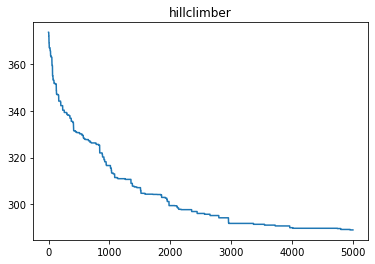

In [17]:
hillclimber_df_N, best_solution_N = random_start_hillclimber(joined_N, all_households_N, rel_poi_df, df_afstandn2)

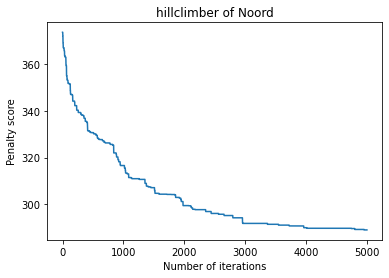

In [29]:
plt = hillclimber_df_N['best'].plot(title='hillclimber of Noord')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_Noord.pdf')

In [19]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'N']
joined = joined.append(best_solution_N, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 173.63670598739608
Penalties are: 271.81408529362454


### Optimization of Nieuw-West (F)

In [20]:
joined_F = joined[joined['stadsdeel'] == 'F']
all_households_F  = create_all_households(rel_poi_df, subsectie='F')
all_households_F = all_households_F.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 165.8768689420129
Penalties are: 231.42587110495217
Average distance is : 172.3850297785802
Penalties are: 225.24966411648094
Average distance is : 168.89683106419295
Penalties are: 233.21380558923724
Average distance is : 169.38895119349098
Penalties are: 224.58098714321457
Average distance is : 169.55498350296227
Penalties are: 218.76267030429005
Average distance is : 168.89722453145367
Penalties are: 232.77507635159844
Average distance is : 168.3624191238377
Penalties are: 229.63460610697302
Average distance is : 169.28387127328662
Penalties are: 234.1832947918471
Average distance is : 171.35109884427118
Penalties are: 233.3747381868925
Avera

Average distance is : 164.8090905330161
Penalties are: 214.49515110191513
214.49515110191513 214.72380601482052
72.0
Amount of clusters to change: 37
Average distance is : 164.08509728537936
Penalties are: 214.73738611298242
214.73738611298242 214.49515110191513
64.0
Amount of clusters to change: 41
Average distance is : 164.9227160428503
Penalties are: 212.63991188528533
212.63991188528533 214.49515110191513
58.0
Amount of clusters to change: 30
Average distance is : 164.1134292644398
Penalties are: 213.7637680396497
213.7637680396497 212.63991188528533
74.0
Amount of clusters to change: 37
Average distance is : 165.05925034460546
Penalties are: 211.44723043980366
211.44723043980366 212.63991188528533
48.0
Amount of clusters to change: 31
Average distance is : 164.90701545814272
Penalties are: 211.78677529592915
211.78677529592915 211.44723043980366
71.0
Amount of clusters to change: 37
Average distance is : 165.29211569674254
Penalties are: 212.08649244538543
212.08649244538543 211.4

Average distance is : 168.43920683401913
Penalties are: 199.60593251852563
199.60593251852563 196.49233232605138
58.0
Amount of clusters to change: 40
Average distance is : 165.72483323700692
Penalties are: 197.2669073428929
197.2669073428929 196.49233232605138
43.0
Amount of clusters to change: 30
Average distance is : 167.64971084401967
Penalties are: 201.22524815705896
201.22524815705896 196.49233232605138
66.0
Amount of clusters to change: 38
Average distance is : 165.46580777496453
Penalties are: 198.2340472620537
198.2340472620537 196.49233232605138
70.0
Amount of clusters to change: 49
Average distance is : 168.48235861022326
Penalties are: 198.85531548455393
198.85531548455393 196.49233232605138
58.0
Amount of clusters to change: 33
Average distance is : 166.77704270971566
Penalties are: 196.7491673082475
196.7491673082475 196.49233232605138
44.0
Amount of clusters to change: 25
Average distance is : 167.47214043340585
Penalties are: 196.88643075738617
196.88643075738617 196.49

Average distance is : 164.5308833811045
Penalties are: 190.99460140506207
190.99460140506207 189.06424869598692
55.0
Amount of clusters to change: 33
Average distance is : 165.95079071004102
Penalties are: 194.9700596670195
194.9700596670195 189.06424869598692
31.0
Amount of clusters to change: 19
Average distance is : 164.65165534778413
Penalties are: 188.26560942161487
188.26560942161487 189.06424869598692
56.0
Amount of clusters to change: 33
Average distance is : 165.29286629360544
Penalties are: 190.3138420748725
190.3138420748725 188.26560942161487
54.0
Amount of clusters to change: 34
Average distance is : 165.3289922279369
Penalties are: 190.8349672890001
190.8349672890001 188.26560942161487
41.0
Amount of clusters to change: 28
Average distance is : 164.11730920264353
Penalties are: 190.8885952843807
190.8885952843807 188.26560942161487
52.0
Amount of clusters to change: 36
Average distance is : 164.85221011434263
Penalties are: 187.36646896352616
187.36646896352616 188.265609

Average distance is : 165.06653254540774
Penalties are: 185.25922486767396
185.25922486767396 182.01730002887112
53.0
Amount of clusters to change: 34
Average distance is : 164.05893886977316
Penalties are: 183.94059965354631
183.94059965354631 182.01730002887112
42.0
Amount of clusters to change: 25
Average distance is : 164.621905147097
Penalties are: 185.0734918968338
185.0734918968338 182.01730002887112
53.0
Amount of clusters to change: 26
Average distance is : 163.13557475481008
Penalties are: 183.01455325762677
183.01455325762677 182.01730002887112
60.0
Amount of clusters to change: 31
Average distance is : 165.11890032527901
Penalties are: 186.52781087479548
186.52781087479548 182.01730002887112
62.0
Amount of clusters to change: 47
Average distance is : 165.0221798024077
Penalties are: 186.50672989125204
186.50672989125204 182.01730002887112
79.0
Amount of clusters to change: 42
Average distance is : 164.59749933159384
Penalties are: 183.78996958906743
183.78996958906743 182.0

Average distance is : 165.0898527116119
Penalties are: 181.2313788374555
181.2313788374555 179.292523693581
56.0
Amount of clusters to change: 31
Average distance is : 165.82838274187654
Penalties are: 181.23841038398615
181.23841038398615 179.292523693581
67.0
Amount of clusters to change: 35
Average distance is : 164.43155678103932
Penalties are: 178.66326476758735
178.66326476758735 179.292523693581
60.0
Amount of clusters to change: 34
Average distance is : 164.49225927183886
Penalties are: 178.88040706380525
178.88040706380525 178.66326476758735
49.0
Amount of clusters to change: 27
Average distance is : 164.50169806243073
Penalties are: 181.1591399191608
181.1591399191608 178.66326476758735
72.0
Amount of clusters to change: 43
Average distance is : 163.1168153693512
Penalties are: 182.249677480512
182.249677480512 178.66326476758735
45.0
Amount of clusters to change: 29
Average distance is : 165.58037245567905
Penalties are: 180.33802719661247
180.33802719661247 178.663264767587

Average distance is : 161.1004510830595
Penalties are: 180.01533351939176
180.01533351939176 176.19624038109905
49.0
Amount of clusters to change: 33
Average distance is : 162.81654753630323
Penalties are: 184.19645714560676
184.19645714560676 176.19624038109905
58.0
Amount of clusters to change: 33
Average distance is : 161.17823165800138
Penalties are: 178.25137917428543
178.25137917428543 176.19624038109905
62.0
Amount of clusters to change: 37
Average distance is : 162.249227216689
Penalties are: 176.27452073910115
176.27452073910115 176.19624038109905
58.0
Amount of clusters to change: 34
Average distance is : 162.43726840593712
Penalties are: 179.87566521027813
179.87566521027813 176.19624038109905
53.0
Amount of clusters to change: 33
Average distance is : 162.72564919832564
Penalties are: 176.76134039072272
176.76134039072272 176.19624038109905
47.0
Amount of clusters to change: 29
Average distance is : 162.8719605732725
Penalties are: 177.9257165624098
177.9257165624098 176.19

Average distance is : 161.89356399804802
Penalties are: 176.83524593398133
176.83524593398133 174.25193993840824
49.0
Amount of clusters to change: 27
Average distance is : 161.0292461928202
Penalties are: 171.53899871042245
171.53899871042245 174.25193993840824
54.0
Amount of clusters to change: 39
Average distance is : 160.81556922706793
Penalties are: 172.29436839572708
172.29436839572708 171.53899871042245
37.0
Amount of clusters to change: 20
Average distance is : 160.82510679453432
Penalties are: 174.8171871619671
174.8171871619671 171.53899871042245
49.0
Amount of clusters to change: 31
Average distance is : 161.91195402962185
Penalties are: 174.12105956115872
174.12105956115872 171.53899871042245
58.0
Amount of clusters to change: 38
Average distance is : 161.0861051781595
Penalties are: 172.29785285343087
172.29785285343087 171.53899871042245
64.0
Amount of clusters to change: 32
Average distance is : 160.9127608541663
Penalties are: 175.2917147820229
175.2917147820229 171.538

Average distance is : 161.30368728514588
Penalties are: 174.00307806755845
174.00307806755845 171.04725414300836
49.0
Amount of clusters to change: 29
Average distance is : 162.23898512245364
Penalties are: 176.77032516600903
176.77032516600903 171.04725414300836
45.0
Amount of clusters to change: 25
Average distance is : 161.42376884258906
Penalties are: 175.78973305745356
175.78973305745356 171.04725414300836
51.0
Amount of clusters to change: 37
Average distance is : 160.8488992228772
Penalties are: 178.66463576171685
178.66463576171685 171.04725414300836
67.0
Amount of clusters to change: 36
Average distance is : 160.97225852373208
Penalties are: 178.03596866519104
178.03596866519104 171.04725414300836
52.0
Amount of clusters to change: 28
Average distance is : 160.1481954919397
Penalties are: 174.67408264844576
174.67408264844576 171.04725414300836
32.0
Amount of clusters to change: 25
Average distance is : 161.34353036559202
Penalties are: 172.49949913386584
172.49949913386584 17

Average distance is : 161.08269148399785
Penalties are: 170.5217118467905
170.5217118467905 170.40575363295156
58.0
Amount of clusters to change: 33
Average distance is : 161.57285494486098
Penalties are: 172.06663154653066
172.06663154653066 170.40575363295156
60.0
Amount of clusters to change: 33
Average distance is : 160.8145075344817
Penalties are: 174.1421853045905
174.1421853045905 170.40575363295156
56.0
Amount of clusters to change: 33
Average distance is : 159.76379701859793
Penalties are: 171.60628350495622
171.60628350495622 170.40575363295156
49.0
Amount of clusters to change: 34
Average distance is : 162.5227310530557
Penalties are: 174.10692619574633
174.10692619574633 170.40575363295156
50.0
Amount of clusters to change: 37
Average distance is : 162.32055253459063
Penalties are: 179.68196305456644
179.68196305456644 170.40575363295156
59.0
Amount of clusters to change: 36
Average distance is : 162.45226659624248
Penalties are: 175.28396199595804
175.28396199595804 170.40

Average distance is : 161.09615588882428
Penalties are: 169.20807885670294
169.20807885670294 169.1702918775864
49.0
Amount of clusters to change: 33
Average distance is : 160.50728618058628
Penalties are: 170.22978513136368
170.22978513136368 169.1702918775864
41.0
Amount of clusters to change: 27
Average distance is : 161.2349470907492
Penalties are: 171.32035779039555
171.32035779039555 169.1702918775864
64.0
Amount of clusters to change: 40
Average distance is : 161.24272743993052
Penalties are: 173.34611085554806
173.34611085554806 169.1702918775864
48.0
Amount of clusters to change: 30
Average distance is : 160.18760878171452
Penalties are: 170.7268272543547
170.7268272543547 169.1702918775864
47.0
Amount of clusters to change: 33
Average distance is : 160.08273402306915
Penalties are: 169.93152691752476
169.93152691752476 169.1702918775864
63.0
Amount of clusters to change: 37
Average distance is : 161.47799629713828
Penalties are: 173.1142373592532
173.1142373592532 169.1702918

Average distance is : 159.8070937171083
Penalties are: 171.34844385525938
171.34844385525938 165.7555256664421
50.0
Amount of clusters to change: 28
Average distance is : 161.1640795897155
Penalties are: 169.05803934173804
169.05803934173804 165.7555256664421
45.0
Amount of clusters to change: 30
Average distance is : 161.52268758473667
Penalties are: 169.59269399480317
169.59269399480317 165.7555256664421
48.0
Amount of clusters to change: 24
Average distance is : 161.2734986512213
Penalties are: 166.8615385622173
166.8615385622173 165.7555256664421
44.0
Amount of clusters to change: 25
Average distance is : 161.9453846823278
Penalties are: 169.2928810220383
169.2928810220383 165.7555256664421
57.0
Amount of clusters to change: 37
Average distance is : 160.04036564865152
Penalties are: 170.74261781858075
170.74261781858075 165.7555256664421
59.0
Amount of clusters to change: 30
Average distance is : 160.787836490691
Penalties are: 167.30047256279474
167.30047256279474 165.755525666442

Average distance is : 161.98326553865576
Penalties are: 170.81533972668657
170.81533972668657 165.58197145606775
47.0
Amount of clusters to change: 24
Average distance is : 160.85065798899024
Penalties are: 166.33758465980173
166.33758465980173 165.58197145606775
61.0
Amount of clusters to change: 31
Average distance is : 160.53142404701515
Penalties are: 167.44875997497834
167.44875997497834 165.58197145606775
41.0
Amount of clusters to change: 32
Average distance is : 160.6528177409918
Penalties are: 167.03998722933306
167.03998722933306 165.58197145606775
50.0
Amount of clusters to change: 25
Average distance is : 160.4162517606584
Penalties are: 168.12259561158695
168.12259561158695 165.58197145606775
48.0
Amount of clusters to change: 31
Average distance is : 161.34554908681136
Penalties are: 170.4547126840535
170.4547126840535 165.58197145606775
34.0
Amount of clusters to change: 27
Average distance is : 160.42667468697567
Penalties are: 167.1395108266769
167.1395108266769 165.58

Average distance is : 160.9695813365316
Penalties are: 167.12143117120584
167.12143117120584 164.9051190741988
51.0
Amount of clusters to change: 32
Average distance is : 160.29749839946976
Penalties are: 166.46637580598593
166.46637580598593 164.9051190741988
37.0
Amount of clusters to change: 23
Average distance is : 160.051985368347
Penalties are: 165.48723934173805
165.48723934173805 164.9051190741988
47.0
Amount of clusters to change: 31
Average distance is : 159.54153771123387
Penalties are: 169.9924611394476
169.9924611394476 164.9051190741988
67.0
Amount of clusters to change: 38
Average distance is : 159.6817416783075
Penalties are: 165.65240745837744
165.65240745837744 164.9051190741988
54.0
Amount of clusters to change: 33
Average distance is : 160.0752311073682
Penalties are: 169.33316536425752
169.33316536425752 164.9051190741988
52.0
Amount of clusters to change: 30
Average distance is : 160.32377125865472
Penalties are: 169.03201930516795
169.03201930516795 164.905119074

Average distance is : 160.93548789998363
Penalties are: 166.98220297372728
166.98220297372728 162.6153399672794
55.0
Amount of clusters to change: 32
Average distance is : 160.12446362849929
Penalties are: 166.70004713694544
166.70004713694544 162.6153399672794
45.0
Amount of clusters to change: 28
Average distance is : 159.35233617478826
Penalties are: 163.26051535944566
163.26051535944566 162.6153399672794
45.0
Amount of clusters to change: 27
Average distance is : 159.93433517059256
Penalties are: 163.23574428832643
163.23574428832643 162.6153399672794
44.0
Amount of clusters to change: 26
Average distance is : 159.28648373827448
Penalties are: 164.3784158983736
164.3784158983736 162.6153399672794
40.0
Amount of clusters to change: 27
Average distance is : 158.7686663299847
Penalties are: 164.22923560773745
164.22923560773745 162.6153399672794
76.0
Amount of clusters to change: 32
Average distance is : 160.74570519102275
Penalties are: 166.56455298816283
166.56455298816283 162.61533

Average distance is : 159.84479965576486
Penalties are: 162.114715850255
162.114715850255 162.08590996054278
80.0
Amount of clusters to change: 39
Average distance is : 161.42929263152126
Penalties are: 165.14379020306035
165.14379020306035 162.08590996054278
54.0
Amount of clusters to change: 38
Average distance is : 161.12659858366231
Penalties are: 168.22102492541623
168.22102492541623 162.08590996054278
47.0
Amount of clusters to change: 34
Average distance is : 160.7172468165316
Penalties are: 167.50674473101725
167.50674473101725 162.08590996054278
53.0
Amount of clusters to change: 31
Average distance is : 161.82910659529801
Penalties are: 167.25941760177076
167.25941760177076 162.08590996054278
33.0
Amount of clusters to change: 26
Average distance is : 161.51795623067358
Penalties are: 168.25600393609855
168.25600393609855 162.08590996054278
47.0
Amount of clusters to change: 27
Average distance is : 160.56396599529614
Penalties are: 162.8148441920893
162.8148441920893 162.085

Average distance is : 160.37827155360907
Penalties are: 166.09040477336154
166.09040477336154 161.88358659416804
56.0
Amount of clusters to change: 28
Average distance is : 161.63919139109726
Penalties are: 164.6849427485324
164.6849427485324 161.88358659416804
64.0
Amount of clusters to change: 31
Average distance is : 159.16480731550385
Penalties are: 165.87018862477143
165.87018862477143 161.88358659416804
73.0
Amount of clusters to change: 40
Average distance is : 160.74314920935748
Penalties are: 169.35160932537772
169.35160932537772 161.88358659416804
57.0
Amount of clusters to change: 38
Average distance is : 160.74402699809406
Penalties are: 165.70162947743242
165.70162947743242 161.88358659416804
61.0
Amount of clusters to change: 39
Average distance is : 160.7873464883965
Penalties are: 167.27598831681263
167.27598831681263 161.88358659416804
63.0
Amount of clusters to change: 32
Average distance is : 159.88245818928513
Penalties are: 164.8436108940429
164.8436108940429 161.8

Average distance is : 159.31411995068703
Penalties are: 163.94734910018286
163.94734910018286 161.40750317582524
50.0
Amount of clusters to change: 27
Average distance is : 159.4630375566806
Penalties are: 161.63135882013282
161.63135882013282 161.40750317582524
47.0
Amount of clusters to change: 28
Average distance is : 159.09252282275202
Penalties are: 163.86625916658647
163.86625916658647 161.40750317582524
45.0
Amount of clusters to change: 24
Average distance is : 159.873783160924
Penalties are: 164.43191278029065
164.43191278029065 161.40750317582524
49.0
Amount of clusters to change: 34
Average distance is : 159.5935273573846
Penalties are: 166.22338773938986
166.22338773938986 161.40750317582524
39.0
Amount of clusters to change: 26
Average distance is : 158.7471340657748
Penalties are: 167.61396484457705
167.61396484457705 161.40750317582524
59.0
Amount of clusters to change: 34
Average distance is : 158.90812508646775
Penalties are: 164.8348326340102
164.8348326340102 161.407

Average distance is : 159.11766289713543
Penalties are: 158.78013047829853
158.78013047829853 159.23617442017127
40.0
Amount of clusters to change: 26
Average distance is : 158.17826582879962
Penalties are: 161.02765593301893
161.02765593301893 158.78013047829853
40.0
Amount of clusters to change: 28
Average distance is : 159.40673078802897
Penalties are: 164.8368544413435
164.8368544413435 158.78013047829853
44.0
Amount of clusters to change: 28
Average distance is : 159.0314209524626
Penalties are: 160.1706570878645
160.1706570878645 158.78013047829853
62.0
Amount of clusters to change: 40
Average distance is : 158.81206446819877
Penalties are: 167.26679532287557
167.26679532287557 158.78013047829853
44.0
Amount of clusters to change: 28
Average distance is : 159.94560900941576
Penalties are: 163.002510489847
163.002510489847 158.78013047829853
70.0
Amount of clusters to change: 34
Average distance is : 159.50513929508566
Penalties are: 161.93455021653352
161.93455021653352 158.78013

Average distance is : 159.7944199023635
Penalties are: 162.7952436627851
162.7952436627851 157.9531015879126
67.0
Amount of clusters to change: 38
Average distance is : 160.04159732162358
Penalties are: 157.63190436916562
157.63190436916562 157.9531015879126
37.0
Amount of clusters to change: 30
Average distance is : 160.55789086439023
Penalties are: 159.44647796169764
159.44647796169764 157.63190436916562
59.0
Amount of clusters to change: 35
Average distance is : 159.44006024306816
Penalties are: 158.64381392551246
158.64381392551246 157.63190436916562
53.0
Amount of clusters to change: 28
Average distance is : 159.9902472730408
Penalties are: 160.0748636801078
160.0748636801078 157.63190436916562
48.0
Amount of clusters to change: 32
Average distance is : 160.27912676721786
Penalties are: 159.1464211817919
159.1464211817919 157.63190436916562
61.0
Amount of clusters to change: 35
Average distance is : 160.3181469263771
Penalties are: 160.96214161293426
160.96214161293426 157.6319043

Average distance is : 160.3484095496095
Penalties are: 162.72090316620154
162.72090316620154 157.2333212972765
60.0
Amount of clusters to change: 31
Average distance is : 160.06790396970138
Penalties are: 161.31919854681936
161.31919854681936 157.2333212972765
48.0
Amount of clusters to change: 27
Average distance is : 159.86138630271884
Penalties are: 162.6242048503513
162.6242048503513 157.2333212972765
58.0
Amount of clusters to change: 38
Average distance is : 161.61738364567663
Penalties are: 161.62108144548168
161.62108144548168 157.2333212972765
35.0
Amount of clusters to change: 26
Average distance is : 160.6231074406588
Penalties are: 159.32120175151573
159.32120175151573 157.2333212972765
69.0
Amount of clusters to change: 43
Average distance is : 160.66536972787245
Penalties are: 168.10475035126552
168.10475035126552 157.2333212972765
66.0
Amount of clusters to change: 40
Average distance is : 160.46108568209257
Penalties are: 159.11272248099314
159.11272248099314 157.233321

Average distance is : 160.54045458875686
Penalties are: 161.9556279857569
161.9556279857569 156.9348762775479
57.0
Amount of clusters to change: 37
Average distance is : 161.12538691023275
Penalties are: 158.13280918102205
158.13280918102205 156.9348762775479
53.0
Amount of clusters to change: 29
Average distance is : 160.71585359735022
Penalties are: 161.80479376383408
161.80479376383408 156.9348762775479
61.0
Amount of clusters to change: 30
Average distance is : 159.6149940163901
Penalties are: 163.418863939948
163.418863939948 156.9348762775479
52.0
Amount of clusters to change: 32
Average distance is : 159.66457223796505
Penalties are: 159.89809014531804
159.89809014531804 156.9348762775479
44.0
Amount of clusters to change: 27
Average distance is : 160.2860852864157
Penalties are: 158.06061119237805
158.06061119237805 156.9348762775479
50.0
Amount of clusters to change: 35
Average distance is : 160.69418551930727
Penalties are: 161.01996115869505
161.01996115869505 156.9348762775

Average distance is : 159.86689511648314
Penalties are: 160.26265911846792
160.26265911846792 156.9348762775479
48.0
Amount of clusters to change: 27
Average distance is : 161.08701967893654
Penalties are: 159.80678557405446
159.80678557405446 156.9348762775479
40.0
Amount of clusters to change: 27
Average distance is : 161.8093680163681
Penalties are: 160.2681899432201
160.2681899432201 156.9348762775479
52.0
Amount of clusters to change: 30
Average distance is : 160.12571988689712
Penalties are: 160.74399942257722
160.74399942257722 156.9348762775479
62.0
Amount of clusters to change: 33
Average distance is : 160.84627751316992
Penalties are: 159.15621661052833
159.15621661052833 156.9348762775479
37.0
Amount of clusters to change: 27
Average distance is : 160.00723511591767
Penalties are: 158.31624676162062
158.31624676162062 156.9348762775479
54.0
Amount of clusters to change: 37
Average distance is : 160.0559626951604
Penalties are: 162.7896017130209
162.7896017130209 156.93487627

Average distance is : 160.3920008702273
Penalties are: 159.80221426234243
159.80221426234243 155.14758674814746
71.0
Amount of clusters to change: 41
Average distance is : 160.74087005094663
Penalties are: 159.98756838610336
159.98756838610336 155.14758674814746
83.0
Amount of clusters to change: 47
Average distance is : 159.11886374433587
Penalties are: 156.23174438456354
156.23174438456354 155.14758674814746
50.0
Amount of clusters to change: 34
Average distance is : 159.74626232723304
Penalties are: 160.0487219901838
160.0487219901838 155.14758674814746
62.0
Amount of clusters to change: 36
Average distance is : 160.8815809812929
Penalties are: 162.13025586565297
162.13025586565297 155.14758674814746
60.0
Amount of clusters to change: 34
Average distance is : 160.12330983402393
Penalties are: 158.68625737657587
158.68625737657587 155.14758674814746
32.0
Amount of clusters to change: 25
Average distance is : 160.44886234693146
Penalties are: 157.08393992878453
157.08393992878453 155.

Average distance is : 160.03962123122471
Penalties are: 157.86720092387642
157.86720092387642 154.05680244442308
56.0
Amount of clusters to change: 30
Average distance is : 159.99839304480074
Penalties are: 154.2481339332114
154.2481339332114 154.05680244442308
52.0
Amount of clusters to change: 32
Average distance is : 160.1357376023633
Penalties are: 154.08448534308536
154.08448534308536 154.05680244442308
65.0
Amount of clusters to change: 36
Average distance is : 160.9977398612766
Penalties are: 158.22930144355692
158.22930144355692 154.05680244442308
56.0
Amount of clusters to change: 30
Average distance is : 160.5795696780295
Penalties are: 159.14307770185738
159.14307770185738 154.05680244442308
55.0
Amount of clusters to change: 33
Average distance is : 160.0013577592505
Penalties are: 155.14325392166296
155.14325392166296 154.05680244442308
43.0
Amount of clusters to change: 30
Average distance is : 159.1492342824416
Penalties are: 153.54506012895777
153.54506012895777 154.056

Average distance is : 157.76189140043175
Penalties are: 156.72684976421905
156.72684976421905 152.76223447213934
94.0
Amount of clusters to change: 47
Average distance is : 159.20713151531766
Penalties are: 157.12419612164376
157.12419612164376 152.76223447213934
49.0
Amount of clusters to change: 30
Average distance is : 158.0899775408233
Penalties are: 155.59201956500817
155.59201956500817 152.76223447213934
63.0
Amount of clusters to change: 35
Average distance is : 157.73690098168026
Penalties are: 155.52498022327012
155.52498022327012 152.76223447213934
48.0
Amount of clusters to change: 33
Average distance is : 157.6159792429396
Penalties are: 155.37681245068038
155.37681245068038 152.76223447213934
81.0
Amount of clusters to change: 48
Average distance is : 157.31460038991105
Penalties are: 157.6565378211914
157.6565378211914 152.76223447213934
68.0
Amount of clusters to change: 44
Average distance is : 161.2938278256895
Penalties are: 161.56331211625448
161.56331211625448 152.7

Average distance is : 158.004510170042
Penalties are: 161.96438883114885
161.96438883114885 152.76223447213934
30.0
Amount of clusters to change: 27
Average distance is : 157.62050243738966
Penalties are: 155.72551308824947
155.72551308824947 152.76223447213934
34.0
Amount of clusters to change: 26
Average distance is : 158.74099518667234
Penalties are: 155.57255542296215
155.57255542296215 152.76223447213934
71.0
Amount of clusters to change: 37
Average distance is : 157.62411581946168
Penalties are: 154.87716349725724
154.87716349725724 152.76223447213934
66.0
Amount of clusters to change: 41
Average distance is : 158.22182517530885
Penalties are: 160.43531873736885
160.43531873736885 152.76223447213934
46.0
Amount of clusters to change: 31
Average distance is : 158.5351331287082
Penalties are: 159.99573179674718
159.99573179674718 152.76223447213934
83.0
Amount of clusters to change: 44
Average distance is : 159.82205975893453
Penalties are: 159.12359436050428
159.12359436050428 152

Average distance is : 158.21655380521653
Penalties are: 156.7590112501203
156.7590112501203 152.29074757963622
45.0
Amount of clusters to change: 27
Average distance is : 158.0460342530425
Penalties are: 155.30942973727264
155.30942973727264 152.29074757963622
43.0
Amount of clusters to change: 32
Average distance is : 157.66743193532497
Penalties are: 156.34855171584195
156.34855171584195 152.29074757963622
74.0
Amount of clusters to change: 38
Average distance is : 158.02183105342993
Penalties are: 155.78641060533153
155.78641060533153 152.29074757963622
33.0
Amount of clusters to change: 20
Average distance is : 157.8165463666214
Penalties are: 156.04990407083054
156.04990407083054 152.29074757963622
58.0
Amount of clusters to change: 46
Average distance is : 158.240649484542
Penalties are: 161.63210347416035
161.63210347416035 152.29074757963622
69.0
Amount of clusters to change: 44
Average distance is : 156.14166686256013
Penalties are: 153.86451125974403
153.86451125974403 152.29

Average distance is : 156.8202426250836
Penalties are: 155.4612040515831
155.4612040515831 149.6598271484939
48.0
Amount of clusters to change: 26
Average distance is : 156.69680197216806
Penalties are: 151.46278774901356
151.46278774901356 149.6598271484939
54.0
Amount of clusters to change: 32
Average distance is : 157.93417664979026
Penalties are: 154.47549758444808
154.47549758444808 149.6598271484939
65.0
Amount of clusters to change: 33
Average distance is : 158.31007698307573
Penalties are: 154.93135636608602
154.93135636608602 149.6598271484939
39.0
Amount of clusters to change: 30
Average distance is : 156.80455626852404
Penalties are: 155.96172347223558
155.96172347223558 149.6598271484939
47.0
Amount of clusters to change: 29
Average distance is : 156.61837334129493
Penalties are: 154.1867172553171
154.1867172553171 149.6598271484939
70.0
Amount of clusters to change: 37
Average distance is : 156.53526434862044
Penalties are: 155.0202522856318
155.0202522856318 149.659827148

Average distance is : 156.6262452297775
Penalties are: 151.23472037340005
151.23472037340005 149.6598271484939
60.0
Amount of clusters to change: 36
Average distance is : 156.9478611455638
Penalties are: 151.38347992493505
151.38347992493505 149.6598271484939
53.0
Amount of clusters to change: 27
Average distance is : 157.76104089753184
Penalties are: 152.27399483206622
152.27399483206622 149.6598271484939
32.0
Amount of clusters to change: 22
Average distance is : 156.47024727211786
Penalties are: 152.6678789433163
152.6678789433163 149.6598271484939
50.0
Amount of clusters to change: 39
Average distance is : 156.54830471389906
Penalties are: 154.04839239726687
154.04839239726687 149.6598271484939
49.0
Amount of clusters to change: 27
Average distance is : 156.01416020375868
Penalties are: 153.52263987104226
153.52263987104226 149.6598271484939
52.0
Amount of clusters to change: 28
Average distance is : 156.72109123723482
Penalties are: 152.5345713598306
152.5345713598306 149.65982714

Average distance is : 157.34385715660935
Penalties are: 152.9069076447832
152.9069076447832 149.42607876705733
66.0
Amount of clusters to change: 32
Average distance is : 158.1601027139193
Penalties are: 155.1020799314818
155.1020799314818 149.42607876705733
60.0
Amount of clusters to change: 33
Average distance is : 157.05768424013908
Penalties are: 152.99085998999175
152.99085998999175 149.42607876705733
48.0
Amount of clusters to change: 28
Average distance is : 157.3153706554706
Penalties are: 152.24497072579248
152.24497072579248 149.42607876705733
49.0
Amount of clusters to change: 30
Average distance is : 156.55956673429878
Penalties are: 151.78056824874415
151.78056824874415 149.42607876705733
89.0
Amount of clusters to change: 60
Average distance is : 157.26103506307584
Penalties are: 155.44629060569318
155.44629060569318 149.42607876705733
42.0
Amount of clusters to change: 24
Average distance is : 156.2582409261755
Penalties are: 150.47363967319131
150.47363967319131 149.426

Average distance is : 156.60865037686438
Penalties are: 150.55045643512904
150.55045643512904 149.42607876705733
37.0
Amount of clusters to change: 26
Average distance is : 157.4402013440972
Penalties are: 151.06427395731086
151.06427395731086 149.42607876705733
42.0
Amount of clusters to change: 27
Average distance is : 157.31388113402983
Penalties are: 156.50361788594415
156.50361788594415 149.42607876705733
34.0
Amount of clusters to change: 21
Average distance is : 157.65524862703697
Penalties are: 153.4307693092365
153.4307693092365 149.42607876705733
43.0
Amount of clusters to change: 32
Average distance is : 157.0851497682265
Penalties are: 152.47188218141923
152.47188218141923 149.42607876705733
69.0
Amount of clusters to change: 40
Average distance is : 157.38751042822992
Penalties are: 153.21999839290183
153.21999839290183 149.42607876705733
54.0
Amount of clusters to change: 34
Average distance is : 157.259574964452
Penalties are: 152.5588412533441
152.5588412533441 149.4260

Average distance is : 157.41019165133116
Penalties are: 151.9077522181804
151.9077522181804 149.42607876705733
53.0
Amount of clusters to change: 33
Average distance is : 157.34208369747515
Penalties are: 154.8279982100583
154.8279982100583 149.42607876705733
48.0
Amount of clusters to change: 33
Average distance is : 157.3305114092325
Penalties are: 154.03128703543314
154.03128703543314 149.42607876705733
69.0
Amount of clusters to change: 36
Average distance is : 157.25569360479497
Penalties are: 153.91551885212772
153.91551885212772 149.42607876705733
51.0
Amount of clusters to change: 27
Average distance is : 156.7180325389409
Penalties are: 151.58341433300612
151.58341433300612 149.42607876705733
62.0
Amount of clusters to change: 35
Average distance is : 158.18054035654856
Penalties are: 157.43873165309776
157.43873165309776 149.42607876705733
55.0
Amount of clusters to change: 34
Average distance is : 157.31079550035514
Penalties are: 151.2495774582828
151.2495774582828 149.4260

Average distance is : 157.1403754606973
Penalties are: 153.52560842619857
153.52560842619857 149.42607876705733
51.0
Amount of clusters to change: 30
Average distance is : 156.94549523523622
Penalties are: 152.8455619935716
152.8455619935716 149.42607876705733
82.0
Amount of clusters to change: 39
Average distance is : 157.4895001539875
Penalties are: 153.8469868545143
153.8469868545143 149.42607876705733
48.0
Amount of clusters to change: 27
Average distance is : 156.80805829162335
Penalties are: 150.89321394614777
150.89321394614777 149.42607876705733
50.0
Amount of clusters to change: 29
Average distance is : 157.03179024657342
Penalties are: 151.87358391554554
151.87358391554554 149.42607876705733
74.0
Amount of clusters to change: 38
Average distance is : 157.31942966341583
Penalties are: 157.94896472082684
157.94896472082684 149.42607876705733
49.0
Amount of clusters to change: 26
Average distance is : 156.782554057124
Penalties are: 155.79316678214678
155.79316678214678 149.4260

Average distance is : 157.13447428593173
Penalties are: 151.95465129818888
151.95465129818888 148.86832766518464
88.0
Amount of clusters to change: 49
Average distance is : 158.37763377599936
Penalties are: 154.45928544758166
154.45928544758166 148.86832766518464
61.0
Amount of clusters to change: 40
Average distance is : 157.9354024879719
Penalties are: 152.37663216698422
152.37663216698422 148.86832766518464
47.0
Amount of clusters to change: 26
Average distance is : 157.1742249206692
Penalties are: 153.4405415728391
153.4405415728391 148.86832766518464
56.0
Amount of clusters to change: 34
Average distance is : 157.62638741452363
Penalties are: 154.24244505071502
154.24244505071502 148.86832766518464
43.0
Amount of clusters to change: 30
Average distance is : 157.37658884286083
Penalties are: 149.53148393864154
149.53148393864154 148.86832766518464
41.0
Amount of clusters to change: 26
Average distance is : 156.63058827912138
Penalties are: 155.3275673345266
155.3275673345266 148.86

Average distance is : 158.17494498630106
Penalties are: 153.00742734376502
153.00742734376502 148.86832766518464
47.0
Amount of clusters to change: 33
Average distance is : 156.95258970479162
Penalties are: 150.6697709740747
150.6697709740747 148.86832766518464
53.0
Amount of clusters to change: 34
Average distance is : 157.94395590194154
Penalties are: 156.2593384337048
156.2593384337048 148.86832766518464
55.0
Amount of clusters to change: 38
Average distance is : 157.7414561709056
Penalties are: 155.74739240140886
155.74739240140886 148.86832766518464
59.0
Amount of clusters to change: 39
Average distance is : 158.2749434360245
Penalties are: 152.28830030602228
152.28830030602228 148.86832766518464
55.0
Amount of clusters to change: 41
Average distance is : 157.35709345573304
Penalties are: 151.92823758107664
151.92823758107664 148.86832766518464
43.0
Amount of clusters to change: 25
Average distance is : 157.28781547801822
Penalties are: 151.63807926747117
151.63807926747117 148.86

Average distance is : 158.03090202443954
Penalties are: 155.65065208730297
155.65065208730297 148.86832766518464
54.0
Amount of clusters to change: 36
Average distance is : 156.68298885943062
Penalties are: 153.49478948938545
153.49478948938545 148.86832766518464
54.0
Amount of clusters to change: 37
Average distance is : 157.3336918833317
Penalties are: 151.86490745231634
151.86490745231634 148.86832766518464
63.0
Amount of clusters to change: 34
Average distance is : 159.15095886226047
Penalties are: 151.66315296302713
151.66315296302713 148.86832766518464
56.0
Amount of clusters to change: 38
Average distance is : 156.68401783591676
Penalties are: 155.10570596839693
155.10570596839693 148.86832766518464
48.0
Amount of clusters to change: 31
Average distance is : 159.0533131956996
Penalties are: 153.22925287256768
153.22925287256768 148.86832766518464
60.0
Amount of clusters to change: 35
Average distance is : 157.20735329856097
Penalties are: 154.55222876609506
154.55222876609506 14

Average distance is : 156.78780161247323
Penalties are: 150.19316094077794
150.19316094077794 148.86832766518464
48.0
Amount of clusters to change: 28
Average distance is : 157.85627476024476
Penalties are: 149.37856121408086
149.37856121408086 148.86832766518464
59.0
Amount of clusters to change: 40
Average distance is : 157.1208028729545
Penalties are: 153.23086600458072
153.23086600458072 148.86832766518464
53.0
Amount of clusters to change: 27
Average distance is : 156.88785755696225
Penalties are: 154.67740044652308
154.67740044652308 148.86832766518464
40.0
Amount of clusters to change: 28
Average distance is : 156.74840202718354
Penalties are: 152.6566835460092
152.6566835460092 148.86832766518464
74.0
Amount of clusters to change: 34
Average distance is : 157.053140531432
Penalties are: 149.46931585734353
149.46931585734353 148.86832766518464
30.0
Amount of clusters to change: 25
Average distance is : 157.7891481308128
Penalties are: 153.50155748022405
153.50155748022405 148.86

Average distance is : 156.26468558072938
Penalties are: 153.39251562830802
153.39251562830802 148.34687371287797
69.0
Amount of clusters to change: 43
Average distance is : 156.32705805088113
Penalties are: 157.36296950362802
157.36296950362802 148.34687371287797
48.0
Amount of clusters to change: 27
Average distance is : 157.32801491443115
Penalties are: 153.6365869276517
153.6365869276517 148.34687371287797
54.0
Amount of clusters to change: 33
Average distance is : 158.39734760332092
Penalties are: 154.47342610235387
154.47342610235387 148.34687371287797
69.0
Amount of clusters to change: 32
Average distance is : 157.10394599567928
Penalties are: 150.8454114171334
150.8454114171334 148.34687371287797
30.0
Amount of clusters to change: 20
Average distance is : 156.80378361749555
Penalties are: 150.04240303520217
150.04240303520217 148.34687371287797
57.0
Amount of clusters to change: 39
Average distance is : 157.10323610888588
Penalties are: 157.04311524914834
157.04311524914834 148.

Average distance is : 157.24038499205497
Penalties are: 150.97823427064688
150.97823427064688 148.34687371287797
68.0
Amount of clusters to change: 35
Average distance is : 156.93892277624386
Penalties are: 154.30597470023287
154.30597470023287 148.34687371287797
51.0
Amount of clusters to change: 25
Average distance is : 157.27332869458948
Penalties are: 151.68471701599398
151.68471701599398 148.34687371287797
45.0
Amount of clusters to change: 34
Average distance is : 157.65052275200003
Penalties are: 150.32011424832072
150.32011424832072 148.34687371287797
42.0
Amount of clusters to change: 27
Average distance is : 158.54291291555046
Penalties are: 152.88008760128568
152.88008760128568 148.34687371287797
56.0
Amount of clusters to change: 32
Average distance is : 157.41840535906073
Penalties are: 152.15100889196836
152.15100889196836 148.34687371287797
49.0
Amount of clusters to change: 29
Average distance is : 156.09468254132028
Penalties are: 149.18273874550107
149.18273874550107 

Average distance is : 157.3383286537637
Penalties are: 151.21870590103356
151.21870590103356 148.0858189656832
41.0
Amount of clusters to change: 27
Average distance is : 156.9034566150158
Penalties are: 152.36838333622035
152.36838333622035 148.0858189656832
55.0
Amount of clusters to change: 34
Average distance is : 157.33464382500466
Penalties are: 150.9521693323325
150.9521693323325 148.0858189656832
63.0
Amount of clusters to change: 37
Average distance is : 157.25856612948172
Penalties are: 151.60031174817638
151.60031174817638 148.0858189656832
71.0
Amount of clusters to change: 42
Average distance is : 157.25197039343044
Penalties are: 153.27790053313316
153.27790053313316 148.0858189656832
35.0
Amount of clusters to change: 28
Average distance is : 156.756901718296
Penalties are: 152.4003635217584
152.4003635217584 148.0858189656832
44.0
Amount of clusters to change: 27
Average distance is : 157.8382671368734
Penalties are: 153.1292596185307
153.1292596185307 148.0858189656832

Average distance is : 156.6338915421885
Penalties are: 149.4561456877803
149.4561456877803 148.0858189656832
53.0
Amount of clusters to change: 33
Average distance is : 157.48530348091307
Penalties are: 153.8174775198722
153.8174775198722 148.0858189656832
50.0
Amount of clusters to change: 31
Average distance is : 157.91198986447174
Penalties are: 150.02755281290297
150.02755281290297 148.0858189656832
53.0
Amount of clusters to change: 31
Average distance is : 156.6553057824707
Penalties are: 147.64712124449065
147.64712124449065 148.0858189656832
64.0
Amount of clusters to change: 35
Average distance is : 157.31514677019527
Penalties are: 151.11427402467424
151.11427402467424 147.64712124449065
57.0
Amount of clusters to change: 32
Average distance is : 155.94501669417537
Penalties are: 152.61325771310894
152.61325771310894 147.64712124449065
67.0
Amount of clusters to change: 41
Average distance is : 157.01585034936895
Penalties are: 152.21499898954906
152.21499898954906 147.647121

Average distance is : 155.59045389542098
Penalties are: 147.24363636276152
147.24363636276152 147.54498102276884
38.0
Amount of clusters to change: 28
Average distance is : 156.19441336568676
Penalties are: 150.56371232942627
150.56371232942627 147.24363636276152
37.0
Amount of clusters to change: 26
Average distance is : 155.92769261927418
Penalties are: 152.0161944011394
152.0161944011394 147.24363636276152
39.0
Amount of clusters to change: 26
Average distance is : 156.20607141054091
Penalties are: 152.51860609734973
152.51860609734973 147.24363636276152
88.0
Amount of clusters to change: 45
Average distance is : 156.14606284250362
Penalties are: 150.88373405893336
150.88373405893336 147.24363636276152
48.0
Amount of clusters to change: 28
Average distance is : 156.22167366340454
Penalties are: 149.94728435052065
149.94728435052065 147.24363636276152
55.0
Amount of clusters to change: 33
Average distance is : 156.07152653966625
Penalties are: 150.2904136016321
150.2904136016321 147.

Average distance is : 155.9590381283898
Penalties are: 149.44919552707046
149.44919552707046 147.24363636276152
75.0
Amount of clusters to change: 37
Average distance is : 155.95468858127015
Penalties are: 151.02629182785768
151.02629182785768 147.24363636276152
40.0
Amount of clusters to change: 30
Average distance is : 156.94958372026372
Penalties are: 150.64129014377275
150.64129014377275 147.24363636276152
57.0
Amount of clusters to change: 44
Average distance is : 156.29629381554938
Penalties are: 153.19074962950134
153.19074962950134 147.24363636276152
62.0
Amount of clusters to change: 33
Average distance is : 155.3936753435579
Penalties are: 153.24428705467986
153.24428705467986 147.24363636276152
53.0
Amount of clusters to change: 33
Average distance is : 156.3946325587686
Penalties are: 151.98852491483342
151.98852491483342 147.24363636276152
57.0
Amount of clusters to change: 38
Average distance is : 155.98283179177315
Penalties are: 148.13733901110533
148.13733901110533 147

Average distance is : 156.62084619086156
Penalties are: 151.02274002540562
151.02274002540562 147.24363636276152
53.0
Amount of clusters to change: 30
Average distance is : 155.2556212597514
Penalties are: 148.5416628846931
148.5416628846931 147.24363636276152
73.0
Amount of clusters to change: 46
Average distance is : 156.30297807866043
Penalties are: 151.83976503647247
151.83976503647247 147.24363636276152
60.0
Amount of clusters to change: 36
Average distance is : 155.78053777416278
Penalties are: 151.29089221856538
151.29089221856538 147.24363636276152
57.0
Amount of clusters to change: 35
Average distance is : 155.75565349721566
Penalties are: 150.53499438959142
150.53499438959142 147.24363636276152
61.0
Amount of clusters to change: 36
Average distance is : 155.7184074309817
Penalties are: 147.19652317300844
147.19652317300844 147.24363636276152
73.0
Amount of clusters to change: 34
Average distance is : 156.45518120638738
Penalties are: 152.2539810420155
152.2539810420155 147.19

Average distance is : 156.46711514699
Penalties are: 152.79985638123836
152.79985638123836 147.19652317300844
59.0
Amount of clusters to change: 35
Average distance is : 156.55825033599496
Penalties are: 152.02635559212425
152.02635559212425 147.19652317300844
41.0
Amount of clusters to change: 27
Average distance is : 155.98290527031355
Penalties are: 150.87242207017343
150.87242207017343 147.19652317300844
48.0
Amount of clusters to change: 27
Average distance is : 155.13355614349504
Penalties are: 154.66437342417768
154.66437342417768 147.19652317300844
41.0
Amount of clusters to change: 20
Average distance is : 156.06908104310236
Penalties are: 150.00613728660238
150.00613728660238 147.19652317300844
65.0
Amount of clusters to change: 39
Average distance is : 156.15357337925323
Penalties are: 150.8035215274169
150.8035215274169 147.19652317300844
56.0
Amount of clusters to change: 29
Average distance is : 156.84778506111888
Penalties are: 152.75090751005638
152.75090751005638 147.1

Average distance is : 156.15612667690846
Penalties are: 153.3994317705025
153.3994317705025 146.67358828454297
71.0
Amount of clusters to change: 47
Average distance is : 155.8242874461719
Penalties are: 149.7351001405008
149.7351001405008 146.67358828454297
57.0
Amount of clusters to change: 32
Average distance is : 156.04706876603782
Penalties are: 148.4826723059453
148.4826723059453 146.67358828454297
42.0
Amount of clusters to change: 26
Average distance is : 155.2019422511685
Penalties are: 149.7396555228362
149.7396555228362 146.67358828454297
49.0
Amount of clusters to change: 31
Average distance is : 155.94367386470367
Penalties are: 148.8742981985103
148.8742981985103 146.67358828454297
54.0
Amount of clusters to change: 35
Average distance is : 155.88314516347018
Penalties are: 146.6928682468195
146.6928682468195 146.67358828454297
66.0
Amount of clusters to change: 40
Average distance is : 156.31187895662666
Penalties are: 151.81677436149124
151.81677436149124 146.6735882845

Average distance is : 155.12360408365026
Penalties are: 147.73565434878842
147.73565434878842 146.50024940816442
47.0
Amount of clusters to change: 31
Average distance is : 155.43116430853257
Penalties are: 154.08493411859808
154.08493411859808 146.50024940816442
64.0
Amount of clusters to change: 35
Average distance is : 155.3820082080706
Penalties are: 154.3203769559443
154.3203769559443 146.50024940816442
65.0
Amount of clusters to change: 34
Average distance is : 156.12569542575682
Penalties are: 149.61683185133862
149.61683185133862 146.50024940816442
49.0
Amount of clusters to change: 29
Average distance is : 155.29259184643746
Penalties are: 149.98357669803875
149.98357669803875 146.50024940816442
48.0
Amount of clusters to change: 27
Average distance is : 155.51869283385196
Penalties are: 150.75180512731683
150.75180512731683 146.50024940816442
51.0
Amount of clusters to change: 30
Average distance is : 155.48695833527293
Penalties are: 148.52614480243278
148.52614480243278 146

Average distance is : 157.1575217103917
Penalties are: 149.35296140077372
149.35296140077372 146.50024940816442
39.0
Amount of clusters to change: 31
Average distance is : 157.4651453480586
Penalties are: 153.05929110610697
153.05929110610697 146.50024940816442
54.0
Amount of clusters to change: 28
Average distance is : 155.59524432949166
Penalties are: 150.2068601247185
150.2068601247185 146.50024940816442
65.0
Amount of clusters to change: 41
Average distance is : 156.08359714288437
Penalties are: 152.10322071135747
152.10322071135747 146.50024940816442
87.0
Amount of clusters to change: 38
Average distance is : 155.7387957019479
Penalties are: 149.61210989857
149.61210989857 146.50024940816442
70.0
Amount of clusters to change: 38
Average distance is : 157.62707374046838
Penalties are: 152.53432482629867
152.53432482629867 146.50024940816442
69.0
Amount of clusters to change: 35
Average distance is : 154.90233914035352
Penalties are: 152.28821165579228
152.28821165579228 146.5002494

Average distance is : 157.1167319594579
Penalties are: 148.57338752237428
148.57338752237428 146.31821170390901
39.0
Amount of clusters to change: 27
Average distance is : 155.58578202632776
Penalties are: 149.85267326827955
149.85267326827955 146.31821170390901
38.0
Amount of clusters to change: 25
Average distance is : 155.9116466681311
Penalties are: 148.22975678926804
148.22975678926804 146.31821170390901
88.0
Amount of clusters to change: 43
Average distance is : 156.92403485984306
Penalties are: 148.55341447735628
148.55341447735628 146.31821170390901
64.0
Amount of clusters to change: 38
Average distance is : 155.49286849427384
Penalties are: 150.31462982851204
150.31462982851204 146.31821170390901
63.0
Amount of clusters to change: 36
Average distance is : 154.95098251967002
Penalties are: 149.91736310795466
149.91736310795466 146.31821170390901
34.0
Amount of clusters to change: 25
Average distance is : 156.22936465365947
Penalties are: 149.24256008814982
149.24256008814982 14

Average distance is : 156.13278575552238
Penalties are: 152.93104752968802
152.93104752968802 145.30355594048925
60.0
Amount of clusters to change: 38
Average distance is : 154.6186256722324
Penalties are: 148.21253311392115
148.21253311392115 145.30355594048925
43.0
Amount of clusters to change: 29
Average distance is : 155.39510385452522
Penalties are: 148.00655235098253
148.00655235098253 145.30355594048925
46.0
Amount of clusters to change: 23
Average distance is : 155.10532900677447
Penalties are: 147.98885864272378
147.98885864272378 145.30355594048925
73.0
Amount of clusters to change: 41
Average distance is : 155.82456132328952
Penalties are: 150.0938838077641
150.0938838077641 145.30355594048925
45.0
Amount of clusters to change: 31
Average distance is : 155.25181435643574
Penalties are: 150.1636986257867
150.1636986257867 145.30355594048925
64.0
Amount of clusters to change: 31
Average distance is : 155.62113856956162
Penalties are: 146.34250549492847
146.34250549492847 145.3

Average distance is : 155.4025368165489
Penalties are: 145.73764043343536
145.73764043343536 145.13824882114056
57.0
Amount of clusters to change: 33
Average distance is : 155.0537900034222
Penalties are: 144.19906602575207
144.19906602575207 145.13824882114056
45.0
Amount of clusters to change: 31
Average distance is : 155.99035107512955
Penalties are: 150.9083170891314
150.9083170891314 144.19906602575207
54.0
Amount of clusters to change: 28
Average distance is : 156.43301589548983
Penalties are: 149.02476851049906
149.02476851049906 144.19906602575207
55.0
Amount of clusters to change: 35
Average distance is : 155.50619853617505
Penalties are: 152.536940412264
152.536940412264 144.19906602575207
43.0
Amount of clusters to change: 31
Average distance is : 156.6336822925966
Penalties are: 147.47408714898862
147.47408714898862 144.19906602575207
68.0
Amount of clusters to change: 36
Average distance is : 155.1809152960427
Penalties are: 148.38281572261678
148.38281572261678 144.199066

Average distance is : 155.31869800908467
Penalties are: 147.45278402332696
147.45278402332696 144.19906602575207
68.0
Amount of clusters to change: 33
Average distance is : 154.58044552152847
Penalties are: 149.91720778720867
149.91720778720867 144.19906602575207
52.0
Amount of clusters to change: 32
Average distance is : 155.2569340865168
Penalties are: 147.42434750851666
147.42434750851666 144.19906602575207
48.0
Amount of clusters to change: 38
Average distance is : 155.08813466777943
Penalties are: 147.60977390919416
147.60977390919416 144.19906602575207
55.0
Amount of clusters to change: 33
Average distance is : 154.98632262262208
Penalties are: 149.01601068191005
149.01601068191005 144.19906602575207
63.0
Amount of clusters to change: 33
Average distance is : 156.7214842743012
Penalties are: 150.1295993417634
150.1295993417634 144.19906602575207
61.0
Amount of clusters to change: 36
Average distance is : 155.14664593491267
Penalties are: 148.23356629520566
148.23356629520566 144.

Average distance is : 154.52774396826365
Penalties are: 149.67594568585562
149.67594568585562 144.19906602575207
41.0
Amount of clusters to change: 25
Average distance is : 155.3866675468187
Penalties are: 146.17089762688374
146.17089762688374 144.19906602575207
55.0
Amount of clusters to change: 33
Average distance is : 154.729943254351
Penalties are: 150.61863409165272
150.61863409165272 144.19906602575207
82.0
Amount of clusters to change: 41
Average distance is : 156.31475535499817
Penalties are: 148.6168254036992
148.6168254036992 144.19906602575207
66.0
Amount of clusters to change: 40
Average distance is : 154.43441962643965
Penalties are: 148.0944272186616
148.0944272186616 144.19906602575207
49.0
Amount of clusters to change: 30
Average distance is : 154.68072573131434
Penalties are: 145.18683830860132
145.18683830860132 144.19906602575207
46.0
Amount of clusters to change: 30
Average distance is : 155.8746264702742
Penalties are: 149.5512338472198
149.5512338472198 144.199066

Average distance is : 155.19649426502843
Penalties are: 151.51367727158996
151.51367727158996 144.19906602575207
53.0
Amount of clusters to change: 29
Average distance is : 154.79583900953037
Penalties are: 144.80012165829433
144.80012165829433 144.19906602575207
47.0
Amount of clusters to change: 26
Average distance is : 156.85057477990722
Penalties are: 148.62417792597725
148.62417792597725 144.19906602575207
59.0
Amount of clusters to change: 33
Average distance is : 156.17980492435214
Penalties are: 146.27293674577055
146.27293674577055 144.19906602575207
77.0
Amount of clusters to change: 38
Average distance is : 156.55616496714828
Penalties are: 150.87849092518815
150.87849092518815 144.19906602575207
45.0
Amount of clusters to change: 30
Average distance is : 155.76009141680578
Penalties are: 150.4059192312874
150.4059192312874 144.19906602575207
61.0
Amount of clusters to change: 37
Average distance is : 155.31520762617035
Penalties are: 149.08597867467327
149.08597867467327 14

Average distance is : 155.68973982799253
Penalties are: 149.8110449795023
149.8110449795023 143.63882173720577
47.0
Amount of clusters to change: 32
Average distance is : 155.53769371827556
Penalties are: 149.26729491695053
149.26729491695053 143.63882173720577
52.0
Amount of clusters to change: 28
Average distance is : 155.45268009732322
Penalties are: 146.56208482976308
146.56208482976308 143.63882173720577
82.0
Amount of clusters to change: 42
Average distance is : 154.96613270676
Penalties are: 146.6565660834921
146.6565660834921 143.63882173720577
44.0
Amount of clusters to change: 34
Average distance is : 156.49893578811654
Penalties are: 149.33184994322227
149.33184994322227 143.63882173720577
58.0
Amount of clusters to change: 39
Average distance is : 155.17951573502995
Penalties are: 148.11148173489616
148.11148173489616 143.63882173720577
64.0
Amount of clusters to change: 42
Average distance is : 155.636762267103
Penalties are: 149.74367656908598
149.74367656908598 143.63882

Average distance is : 155.90625634537204
Penalties are: 146.73316977500625
146.73316977500625 143.54613979829472
51.0
Amount of clusters to change: 31
Average distance is : 155.47181869987068
Penalties are: 148.49834078180032
148.49834078180032 143.54613979829472
41.0
Amount of clusters to change: 26
Average distance is : 156.51574528173597
Penalties are: 145.3509497469061
145.3509497469061 143.54613979829472
62.0
Amount of clusters to change: 33
Average distance is : 155.30811739703458
Penalties are: 147.33248142694922
147.33248142694922 143.54613979829472
55.0
Amount of clusters to change: 35
Average distance is : 154.7592643536991
Penalties are: 147.99304611505664
147.99304611505664 143.54613979829472
48.0
Amount of clusters to change: 31
Average distance is : 155.7265050497548
Penalties are: 151.038058856362
151.038058856362 143.54613979829472
63.0
Amount of clusters to change: 35
Average distance is : 155.3099659514607
Penalties are: 144.7355791808611
144.7355791808611 143.5461397

Average distance is : 154.63383297443832
Penalties are: 144.2982023788902
144.2982023788902 142.71042540947323
50.0
Amount of clusters to change: 34
Average distance is : 155.41833146680852
Penalties are: 146.28047401697557
146.28047401697557 142.71042540947323
42.0
Amount of clusters to change: 30
Average distance is : 155.70219699651955
Penalties are: 146.6068112766326
146.6068112766326 142.71042540947323
61.0
Amount of clusters to change: 34
Average distance is : 154.52074934527485
Penalties are: 145.83108734145543
145.83108734145543 142.71042540947323
38.0
Amount of clusters to change: 24
Average distance is : 154.724505599491
Penalties are: 145.01158301095134
145.01158301095134 142.71042540947323
51.0
Amount of clusters to change: 39
Average distance is : 155.57333185486237
Penalties are: 147.65151488731064
147.65151488731064 142.71042540947323
57.0
Amount of clusters to change: 30
Average distance is : 155.34589497408203
Penalties are: 148.28504687530074
148.28504687530074 142.71

Average distance is : 154.85045821074905
Penalties are: 147.92225106337932
147.92225106337932 142.71042540947323
57.0
Amount of clusters to change: 34
Average distance is : 155.39424491996047
Penalties are: 145.69891538195046
145.69891538195046 142.71042540947323
52.0
Amount of clusters to change: 30
Average distance is : 155.86474127129313
Penalties are: 147.1076072713975
147.1076072713975 142.71042540947323
59.0
Amount of clusters to change: 40
Average distance is : 155.31781532760718
Penalties are: 145.1053560732914
145.1053560732914 142.71042540947323
38.0
Amount of clusters to change: 21
Average distance is : 155.29707732808973
Penalties are: 147.1347726774063
147.1347726774063 142.71042540947323
77.0
Amount of clusters to change: 45
Average distance is : 156.3375638044237
Penalties are: 151.64054777027155
151.64054777027155 142.71042540947323
39.0
Amount of clusters to change: 27
Average distance is : 154.92619798481513
Penalties are: 145.26140105279364
145.26140105279364 142.710

Average distance is : 157.7379178305454
Penalties are: 148.2074566949593
148.2074566949593 142.38991565140407
44.0
Amount of clusters to change: 26
Average distance is : 154.71629432355198
Penalties are: 145.3476683603749
145.3476683603749 142.38991565140407
50.0
Amount of clusters to change: 35
Average distance is : 155.238811050159
Penalties are: 147.09048202359642
147.09048202359642 142.38991565140407
48.0
Amount of clusters to change: 30
Average distance is : 154.97378546912964
Penalties are: 146.88922971880595
146.88922971880595 142.38991565140407
55.0
Amount of clusters to change: 33
Average distance is : 154.64383665630467
Penalties are: 143.8885653713648
143.8885653713648 142.38991565140407
43.0
Amount of clusters to change: 31
Average distance is : 154.71185693284397
Penalties are: 147.12985238755124
147.12985238755124 142.38991565140407
37.0
Amount of clusters to change: 29
Average distance is : 155.79551180311316
Penalties are: 142.79498302442406
142.79498302442406 142.38991

Average distance is : 154.56790545811816
Penalties are: 143.61772884308178
143.61772884308178 142.38991565140407
53.0
Amount of clusters to change: 35
Average distance is : 154.69544455067344
Penalties are: 150.42884809554056
150.42884809554056 142.38991565140407
50.0
Amount of clusters to change: 31
Average distance is : 155.211658262848
Penalties are: 148.6231626537329
148.6231626537329 142.38991565140407
78.0
Amount of clusters to change: 40
Average distance is : 154.58578217061378
Penalties are: 146.9671454471967
146.9671454471967 142.38991565140407
37.0
Amount of clusters to change: 22
Average distance is : 156.6968594730648
Penalties are: 148.90928557268512
148.90928557268512 142.38991565140407
61.0
Amount of clusters to change: 40
Average distance is : 155.06504488019382
Penalties are: 150.1236393363743
150.1236393363743 142.38991565140407
74.0
Amount of clusters to change: 38
Average distance is : 155.05071982515835
Penalties are: 149.65281975479724
149.65281975479724 142.38991

Average distance is : 153.9774623096551
Penalties are: 144.9581242084801
144.9581242084801 142.09462902977464
48.0
Amount of clusters to change: 27
Average distance is : 154.63243455554974
Penalties are: 142.8087508227958
142.8087508227958 142.09462902977464
54.0
Amount of clusters to change: 40
Average distance is : 156.40369943246483
Penalties are: 148.82387972746693
148.82387972746693 142.09462902977464
48.0
Amount of clusters to change: 28
Average distance is : 154.62298718711628
Penalties are: 143.24576330427084
143.24576330427084 142.09462902977464
36.0
Amount of clusters to change: 22
Average distance is : 154.88695984896864
Penalties are: 144.82855349616028
144.82855349616028 142.09462902977464
57.0
Amount of clusters to change: 31
Average distance is : 154.79563829329274
Penalties are: 145.85299076159134
145.85299076159134 142.09462902977464
61.0
Amount of clusters to change: 38
Average distance is : 154.54852141278988
Penalties are: 149.5067967357623
149.5067967357623 142.094

Average distance is : 153.8862588109052
Penalties are: 145.2785936639914
145.2785936639914 140.35993505206227
52.0
Amount of clusters to change: 37
Average distance is : 154.08970645388615
Penalties are: 141.385695709914
141.385695709914 140.35993505206227
46.0
Amount of clusters to change: 31
Average distance is : 154.5067356984126
Penalties are: 142.3912445483765
142.3912445483765 140.35993505206227
70.0
Amount of clusters to change: 34
Average distance is : 154.90214077217175
Penalties are: 145.2415251361703
145.2415251361703 140.35993505206227
60.0
Amount of clusters to change: 43
Average distance is : 155.2036407333043
Penalties are: 143.6374002444329
143.6374002444329 140.35993505206227
44.0
Amount of clusters to change: 31
Average distance is : 154.94147530218925
Penalties are: 146.09285567873434
146.09285567873434 140.35993505206227
41.0
Amount of clusters to change: 26
Average distance is : 155.76402378215636
Penalties are: 145.43807022152936
145.43807022152936 140.35993505206

Average distance is : 154.40855384840629
Penalties are: 145.41449616028638
145.41449616028638 140.35993505206227
68.0
Amount of clusters to change: 37
Average distance is : 154.36228969923758
Penalties are: 143.1952629963239
143.1952629963239 140.35993505206227
57.0
Amount of clusters to change: 30
Average distance is : 154.49331697637663
Penalties are: 143.6609496121793
143.6609496121793 140.35993505206227
38.0
Amount of clusters to change: 28
Average distance is : 154.43636076832559
Penalties are: 145.81565798641185
145.81565798641185 140.35993505206227
61.0
Amount of clusters to change: 36
Average distance is : 153.6103513734663
Penalties are: 142.111868429663
142.111868429663 140.35993505206227
53.0
Amount of clusters to change: 34
Average distance is : 154.43696327744564
Penalties are: 145.93449528456225
145.93449528456225 140.35993505206227
55.0
Amount of clusters to change: 31
Average distance is : 154.68970269367063
Penalties are: 142.37342473583925
142.37342473583925 140.35993

Average distance is : 154.62877964880852
Penalties are: 142.60135057836288
142.60135057836288 139.18901149989415
60.0
Amount of clusters to change: 37
Average distance is : 154.23231154732747
Penalties are: 140.44953985988417
140.44953985988417 139.18901149989415
51.0
Amount of clusters to change: 30
Average distance is : 156.21295463947462
Penalties are: 146.68705485305156
146.68705485305156 139.18901149989415
44.0
Amount of clusters to change: 29
Average distance is : 154.6572055558227
Penalties are: 140.86225125584622
140.86225125584622 139.18901149989415
46.0
Amount of clusters to change: 33
Average distance is : 154.52667451630862
Penalties are: 143.39758457955617
143.39758457955617 139.18901149989415
48.0
Amount of clusters to change: 28
Average distance is : 154.18663200860905
Penalties are: 143.39351223126818
143.39351223126818 139.18901149989415
48.0
Amount of clusters to change: 33
Average distance is : 154.20266816617044
Penalties are: 140.8549396423966
140.8549396423966 139

Average distance is : 154.0635736338755
Penalties are: 149.1755826163943
149.1755826163943 139.1406285101141
57.0
Amount of clusters to change: 31
Average distance is : 153.74329176043244
Penalties are: 140.28932178532247
140.28932178532247 139.1406285101141
49.0
Amount of clusters to change: 28
Average distance is : 153.8767228411716
Penalties are: 146.4521588428893
146.4521588428893 139.1406285101141
57.0
Amount of clusters to change: 34
Average distance is : 154.81703750611894
Penalties are: 143.9664672517659
143.9664672517659 139.1406285101141
66.0
Amount of clusters to change: 38
Average distance is : 153.9214471850317
Penalties are: 142.58337461747212
142.58337461747212 139.1406285101141
48.0
Amount of clusters to change: 33
Average distance is : 153.7819560368271
Penalties are: 143.3943250187655
143.3943250187655 139.1406285101141
53.0
Amount of clusters to change: 34
Average distance is : 154.90202450760583
Penalties are: 140.71345548241814
140.71345548241814 139.1406285101141


Average distance is : 154.96055715534803
Penalties are: 144.27891342841198
144.27891342841198 139.0199639894528
35.0
Amount of clusters to change: 22
Average distance is : 154.97754656418687
Penalties are: 140.93094324152665
140.93094324152665 139.0199639894528
37.0
Amount of clusters to change: 26
Average distance is : 155.83028146600563
Penalties are: 141.52931628077062
141.52931628077062 139.0199639894528
44.0
Amount of clusters to change: 31
Average distance is : 155.374078677356
Penalties are: 143.3159656446677
143.3159656446677 139.0199639894528
76.0
Amount of clusters to change: 32
Average distance is : 155.1229055990378
Penalties are: 139.2560069288065
139.2560069288065 139.0199639894528
67.0
Amount of clusters to change: 32
Average distance is : 155.80388461285796
Penalties are: 140.6741665896799
140.6741665896799 139.0199639894528
39.0
Amount of clusters to change: 25
Average distance is : 155.3166568362154
Penalties are: 140.85994984313953
140.85994984313953 139.019963989452

Average distance is : 155.67163039323657
Penalties are: 143.40385170429394
143.40385170429394 138.41081207537002
65.0
Amount of clusters to change: 41
Average distance is : 156.31570453506487
Penalties are: 142.81173893796793
142.81173893796793 138.41081207537002
48.0
Amount of clusters to change: 30
Average distance is : 156.19544621607596
Penalties are: 144.85914507188636
144.85914507188636 138.41081207537002
35.0
Amount of clusters to change: 26
Average distance is : 156.4854308697456
Penalties are: 141.1842451257771
141.1842451257771 138.41081207537002
34.0
Amount of clusters to change: 23
Average distance is : 155.85086884544805
Penalties are: 142.12229523452086
142.12229523452086 138.41081207537002
56.0
Amount of clusters to change: 37
Average distance is : 155.4294547420918
Penalties are: 145.96010052543448
145.96010052543448 138.41081207537002
71.0
Amount of clusters to change: 46
Average distance is : 155.63198400999778
Penalties are: 143.13920240776025
143.13920240776025 138.

Average distance is : 156.0846134242592
Penalties are: 146.18032051504127
146.18032051504127 138.41081207537002
52.0
Amount of clusters to change: 27
Average distance is : 155.3670027602818
Penalties are: 141.15605879862196
141.15605879862196 138.41081207537002
64.0
Amount of clusters to change: 30
Average distance is : 155.43299344743434
Penalties are: 139.869842908559
139.869842908559 138.41081207537002
58.0
Amount of clusters to change: 33
Average distance is : 155.33213354950763
Penalties are: 143.56339221856535
143.56339221856535 138.41081207537002
64.0
Amount of clusters to change: 42
Average distance is : 156.01056741461966
Penalties are: 147.9910472602344
147.9910472602344 138.41081207537002
74.0
Amount of clusters to change: 37
Average distance is : 155.53204109136468
Penalties are: 141.20967926362184
141.20967926362184 138.41081207537002
56.0
Amount of clusters to change: 31
Average distance is : 155.70475466306357
Penalties are: 142.49432411417132
142.49432411417132 138.4108

Average distance is : 156.28459024745527
Penalties are: 143.51040929037472
143.51040929037472 138.41081207537002
48.0
Amount of clusters to change: 33
Average distance is : 155.21885312207598
Penalties are: 144.023683343919
144.023683343919 138.41081207537002
49.0
Amount of clusters to change: 30
Average distance is : 156.4222528233512
Penalties are: 142.40799644898667
142.40799644898667 138.41081207537002
54.0
Amount of clusters to change: 35
Average distance is : 155.40998334151715
Penalties are: 142.4926743749639
142.4926743749639 138.41081207537002
59.0
Amount of clusters to change: 33
Average distance is : 155.31435971999878
Penalties are: 140.82377559327904
140.82377559327904 138.41081207537002
42.0
Amount of clusters to change: 28
Average distance is : 155.80200378560062
Penalties are: 141.95390399753643
141.95390399753643 138.41081207537002
70.0
Amount of clusters to change: 38
Average distance is : 155.7585364836688
Penalties are: 140.69411967588584
140.69411967588584 138.4108

Average distance is : 155.3175537775277
Penalties are: 141.23126253440344
141.23126253440344 138.41081207537002
57.0
Amount of clusters to change: 35
Average distance is : 156.34494874741375
Penalties are: 144.34074840733683
144.34074840733683 138.41081207537002
52.0
Amount of clusters to change: 33
Average distance is : 155.53770948080788
Penalties are: 142.20509197990646
142.20509197990646 138.41081207537002
55.0
Amount of clusters to change: 35
Average distance is : 155.43354778092458
Penalties are: 139.66767283522913
139.66767283522913 138.41081207537002
59.0
Amount of clusters to change: 42
Average distance is : 155.55272699712037
Penalties are: 141.76849655484344
141.76849655484344 138.41081207537002
39.0
Amount of clusters to change: 31
Average distance is : 154.8148336803816
Penalties are: 140.7609726600843
140.7609726600843 138.41081207537002
41.0
Amount of clusters to change: 29
Average distance is : 155.75913147752854
Penalties are: 142.9632171026041
142.9632171026041 138.41

Average distance is : 155.35858121021607
Penalties are: 141.80950053890717
141.80950053890717 138.41081207537002
42.0
Amount of clusters to change: 28
Average distance is : 156.4416167655078
Penalties are: 143.90059227823005
143.90059227823005 138.41081207537002
60.0
Amount of clusters to change: 32
Average distance is : 155.24661898623611
Penalties are: 141.35807327212888
141.35807327212888 138.41081207537002
72.0
Amount of clusters to change: 43
Average distance is : 155.721466696898
Penalties are: 145.64892316723444
145.64892316723444 138.41081207537002
68.0
Amount of clusters to change: 39
Average distance is : 155.8889039620627
Penalties are: 144.0528365763997
144.0528365763997 138.41081207537002
62.0
Amount of clusters to change: 31
Average distance is : 156.30491637108418
Penalties are: 142.34632808861173
142.34632808861173 138.41081207537002
55.0
Amount of clusters to change: 34
Average distance is : 155.50091720852123
Penalties are: 141.90754235232978
141.90754235232978 138.41

Average distance is : 155.19405584438837
Penalties are: 142.01254775102487
142.01254775102487 138.195685817118
53.0
Amount of clusters to change: 35
Average distance is : 155.39982193057796
Penalties are: 142.19993536963258
142.19993536963258 138.195685817118
57.0
Amount of clusters to change: 29
Average distance is : 155.39142272722785
Penalties are: 140.24480386665897
140.24480386665897 138.195685817118
63.0
Amount of clusters to change: 33
Average distance is : 155.12948467205024
Penalties are: 140.3534908674481
140.3534908674481 138.195685817118
55.0
Amount of clusters to change: 37
Average distance is : 156.2770774458744
Penalties are: 145.1711247858806
145.1711247858806 138.195685817118
55.0
Amount of clusters to change: 36
Average distance is : 155.95850059234482
Penalties are: 142.42042080951558
142.42042080951558 138.195685817118
46.0
Amount of clusters to change: 27
Average distance is : 155.16649538613655
Penalties are: 140.45200558153857
140.45200558153857 138.195685817118


Average distance is : 155.9303374968959
Penalties are: 141.34490624939855
141.34490624939855 138.195685817118
68.0
Amount of clusters to change: 40
Average distance is : 155.66779352855454
Penalties are: 142.55005172546527
142.55005172546527 138.195685817118
46.0
Amount of clusters to change: 32
Average distance is : 155.2324524716156
Penalties are: 145.11828251246223
145.11828251246223 138.195685817118
60.0
Amount of clusters to change: 39
Average distance is : 156.1876479677559
Penalties are: 143.26445887945803
143.26445887945803 138.195685817118
64.0
Amount of clusters to change: 37
Average distance is : 155.66399872319207
Penalties are: 142.07915587889988
142.07915587889988 138.195685817118
58.0
Amount of clusters to change: 41
Average distance is : 155.5757905162828
Penalties are: 146.66770883615297
146.66770883615297 138.195685817118
41.0
Amount of clusters to change: 29
Average distance is : 155.5060391162712
Penalties are: 142.24936462844275
142.24936462844275 138.195685817118


Average distance is : 155.14285899454444
Penalties are: 143.1498504243894
143.1498504243894 138.195685817118
90.0
Amount of clusters to change: 44
Average distance is : 155.51477608168207
Penalties are: 141.64866852397174
141.64866852397174 138.195685817118
66.0
Amount of clusters to change: 43
Average distance is : 156.22757403679083
Penalties are: 145.5020030409762
145.5020030409762 138.195685817118
53.0
Amount of clusters to change: 27
Average distance is : 156.36169697681635
Penalties are: 141.86061777046405
141.86061777046405 138.195685817118
61.0
Amount of clusters to change: 32
Average distance is : 154.81246254842634
Penalties are: 139.24693241526649
139.24693241526649 138.195685817118
61.0
Amount of clusters to change: 33
Average distance is : 156.2102996061654
Penalties are: 140.76941504513348
140.76941504513348 138.195685817118
77.0
Amount of clusters to change: 40
Average distance is : 155.4110274331153
Penalties are: 142.45191612294784
142.45191612294784 138.195685817118
6

Average distance is : 154.94490628293167
Penalties are: 144.03206933618185
144.03206933618185 138.195685817118
45.0
Amount of clusters to change: 28
Average distance is : 155.58844129939092
Penalties are: 141.10990107204034
141.10990107204034 138.195685817118
62.0
Amount of clusters to change: 40
Average distance is : 156.55798592738694
Penalties are: 143.89470679600439
143.89470679600439 138.195685817118
59.0
Amount of clusters to change: 36
Average distance is : 155.34742919378908
Penalties are: 142.06869233212078
142.06869233212078 138.195685817118
36.0
Amount of clusters to change: 19
Average distance is : 155.3158390427492
Penalties are: 139.64156350443636
139.64156350443636 138.195685817118
58.0
Amount of clusters to change: 41
Average distance is : 154.9430113877964
Penalties are: 144.07550802586755
144.07550802586755 138.195685817118
63.0
Amount of clusters to change: 36
Average distance is : 156.2003113287985
Penalties are: 142.63223350077948
142.63223350077948 138.19568581711

Average distance is : 156.51101356004122
Penalties are: 146.24950593760224
146.24950593760224 136.85714311834786
52.0
Amount of clusters to change: 33
Average distance is : 156.72020692527923
Penalties are: 141.12979140443056
141.12979140443056 136.85714311834786
51.0
Amount of clusters to change: 35
Average distance is : 155.45175203932524
Penalties are: 140.51059428950865
140.51059428950865 136.85714311834786
35.0
Amount of clusters to change: 23
Average distance is : 156.38431773248809
Penalties are: 140.78371196373925
140.78371196373925 136.85714311834786
60.0
Amount of clusters to change: 32
Average distance is : 156.97614138544503
Penalties are: 142.8755160613584
142.8755160613584 136.85714311834786
56.0
Amount of clusters to change: 33
Average distance is : 156.14813684518845
Penalties are: 139.52694391516062
139.52694391516062 136.85714311834786
60.0
Amount of clusters to change: 30
Average distance is : 156.3576085869505
Penalties are: 139.2252942433166
139.2252942433166 136.8

Average distance is : 156.91407308469894
Penalties are: 141.89218273764843
141.89218273764843 136.85714311834786
29.0
Amount of clusters to change: 20
Average distance is : 156.41314909703627
Penalties are: 138.82531067998536
138.82531067998536 136.85714311834786
47.0
Amount of clusters to change: 32
Average distance is : 155.8159082508456
Penalties are: 138.08913291760493
138.08913291760493 136.85714311834786
60.0
Amount of clusters to change: 34
Average distance is : 155.7808772354657
Penalties are: 143.7339023134515
143.7339023134515 136.85714311834786
56.0
Amount of clusters to change: 33
Average distance is : 156.76120838715102
Penalties are: 144.63631061262197
144.63631061262197 136.85714311834786
62.0
Amount of clusters to change: 41
Average distance is : 156.72092231601115
Penalties are: 143.69239227630538
143.69239227630538 136.85714311834786
68.0
Amount of clusters to change: 42
Average distance is : 156.4369123566118
Penalties are: 139.48277111842486
139.48277111842486 136.8

Average distance is : 155.57989742617218
Penalties are: 138.5457927420752
138.5457927420752 136.85714311834786
54.0
Amount of clusters to change: 36
Average distance is : 155.77810619963975
Penalties are: 147.25899404315106
147.25899404315106 136.85714311834786
67.0
Amount of clusters to change: 36
Average distance is : 155.92240431230658
Penalties are: 140.08503155493966
140.08503155493966 136.85714311834786
56.0
Amount of clusters to change: 30
Average distance is : 156.2700970939274
Penalties are: 140.55429110610697
140.55429110610697 136.85714311834786
52.0
Amount of clusters to change: 27
Average distance is : 156.190938541193
Penalties are: 138.42957229054795
138.42957229054795 136.85714311834786
59.0
Amount of clusters to change: 37
Average distance is : 156.44853152041586
Penalties are: 140.62235976865483
140.62235976865483 136.85714311834786
41.0
Amount of clusters to change: 24
Average distance is : 156.1005064071178
Penalties are: 139.57977356275381
139.57977356275381 136.85

Average distance is : 156.32605385856937
Penalties are: 138.0697615913159
138.0697615913159 136.85714311834786
48.0
Amount of clusters to change: 34
Average distance is : 156.9170269905585
Penalties are: 141.22398440056202
141.22398440056202 136.85714311834786
61.0
Amount of clusters to change: 42
Average distance is : 156.1848089492324
Penalties are: 138.1203175221818
138.1203175221818 136.85714311834786
53.0
Amount of clusters to change: 34
Average distance is : 156.397006179764
Penalties are: 145.4251863367785
145.4251863367785 136.85714311834786
56.0
Amount of clusters to change: 34
Average distance is : 157.1353879435648
Penalties are: 144.01510860904207
144.01510860904207 136.85714311834786
44.0
Amount of clusters to change: 25
Average distance is : 155.94610014765794
Penalties are: 140.9908625690475
140.9908625690475 136.85714311834786
58.0
Amount of clusters to change: 39
Average distance is : 156.77014560246607
Penalties are: 140.24055301499317
140.24055301499317 136.857143118

Average distance is : 156.43204590321147
Penalties are: 145.5130544777412
145.5130544777412 136.85714311834786
47.0
Amount of clusters to change: 27
Average distance is : 156.14958904205213
Penalties are: 140.87295825394077
140.87295825394077 136.85714311834786
50.0
Amount of clusters to change: 28
Average distance is : 156.74243705146216
Penalties are: 140.22891136901669
140.22891136901669 136.85714311834786
52.0
Amount of clusters to change: 36
Average distance is : 156.18260995396776
Penalties are: 143.35538338433702
143.35538338433702 136.85714311834786
59.0
Amount of clusters to change: 36
Average distance is : 155.9589401488017
Penalties are: 139.12223181669458
139.12223181669458 136.85714311834786
50.0
Amount of clusters to change: 28
Average distance is : 156.58984242100175
Penalties are: 143.53187995842714
143.53187995842714 136.85714311834786
39.0
Amount of clusters to change: 22
Average distance is : 156.0314512463844
Penalties are: 139.75464367650173
139.75464367650173 136.

Average distance is : 156.0731643830777
Penalties are: 145.5525115191408
145.5525115191408 136.85714311834786
51.0
Amount of clusters to change: 36
Average distance is : 156.09417519239474
Penalties are: 142.2939734588217
142.2939734588217 136.85714311834786
68.0
Amount of clusters to change: 37
Average distance is : 156.19289980991564
Penalties are: 143.3118625882942
143.3118625882942 136.85714311834786
51.0
Amount of clusters to change: 28
Average distance is : 157.24810971894598
Penalties are: 140.11176977115693
140.11176977115693 136.85714311834786
59.0
Amount of clusters to change: 37
Average distance is : 156.06408985053054
Penalties are: 142.94040114902708
142.94040114902708 136.85714311834786
51.0
Amount of clusters to change: 36
Average distance is : 155.7019161936301
Penalties are: 140.52882297861694
140.52882297861694 136.85714311834786
42.0
Amount of clusters to change: 25
Average distance is : 156.7774042601323
Penalties are: 140.22682257443654
140.22682257443654 136.85714

Average distance is : 156.24000146910635
Penalties are: 142.747620917297
142.747620917297 136.6400275612526
41.0
Amount of clusters to change: 27
Average distance is : 156.36347510489483
Penalties are: 139.36040935773812
139.36040935773812 136.6400275612526
41.0
Amount of clusters to change: 24
Average distance is : 156.02911398609828
Penalties are: 141.83043259810998
141.83043259810998 136.6400275612526
59.0
Amount of clusters to change: 36
Average distance is : 156.0217615364243
Penalties are: 139.82044527205187
139.82044527205187 136.6400275612526
40.0
Amount of clusters to change: 23
Average distance is : 156.1083458429136
Penalties are: 138.91076589294994
138.91076589294994 136.6400275612526
65.0
Amount of clusters to change: 34
Average distance is : 155.6213730518305
Penalties are: 141.74224124757012
141.74224124757012 136.6400275612526
56.0
Amount of clusters to change: 31
Average distance is : 156.62212863775633
Penalties are: 137.74389350809324
137.74389350809324 136.640027561

Average distance is : 156.6095606568727
Penalties are: 140.89733700945013
140.89733700945013 136.6400275612526
49.0
Amount of clusters to change: 32
Average distance is : 157.52816480543947
Penalties are: 142.78127226360257
142.78127226360257 136.6400275612526
48.0
Amount of clusters to change: 26
Average distance is : 157.3698386796917
Penalties are: 140.24465878514926
140.24465878514926 136.6400275612526
39.0
Amount of clusters to change: 27
Average distance is : 156.4875192325226
Penalties are: 141.0126399041515
141.0126399041515 136.6400275612526
54.0
Amount of clusters to change: 35
Average distance is : 156.0290471306873
Penalties are: 138.5804910310449
138.5804910310449 136.6400275612526
72.0
Amount of clusters to change: 38
Average distance is : 156.47949103884542
Penalties are: 141.05601068191004
141.05601068191004 136.6400275612526
66.0
Amount of clusters to change: 38
Average distance is : 155.69200438474064
Penalties are: 139.72692107896916
139.72692107896916 136.6400275612

Average distance is : 156.22692679255766
Penalties are: 141.21787952537676
141.21787952537676 136.6400275612526
57.0
Amount of clusters to change: 32
Average distance is : 156.86895933720876
Penalties are: 149.60608854437325
149.60608854437325 136.6400275612526
47.0
Amount of clusters to change: 28
Average distance is : 156.17978946541828
Penalties are: 136.36454522008583
136.36454522008583 136.6400275612526
44.0
Amount of clusters to change: 27
Average distance is : 155.82497345278432
Penalties are: 139.19344234655583
139.19344234655583 136.36454522008583
64.0
Amount of clusters to change: 41
Average distance is : 155.87139338037824
Penalties are: 140.5224366880305
140.5224366880305 136.36454522008583
61.0
Amount of clusters to change: 38
Average distance is : 157.4931009954092
Penalties are: 142.48035318628865
142.48035318628865 136.36454522008583
54.0
Amount of clusters to change: 34
Average distance is : 157.99222128138786
Penalties are: 139.85715613873012
139.85715613873012 136.36

Average distance is : 155.3383218505975
Penalties are: 137.1293618665435
137.1293618665435 136.36454522008583
53.0
Amount of clusters to change: 30
Average distance is : 156.45936178135747
Penalties are: 141.13727732548068
141.13727732548068 136.36454522008583
56.0
Amount of clusters to change: 33
Average distance is : 156.26232110647496
Penalties are: 141.19597941567065
141.19597941567065 136.36454522008583
58.0
Amount of clusters to change: 34
Average distance is : 156.6256539451457
Penalties are: 143.38090323729236
143.38090323729236 136.36454522008583
57.0
Amount of clusters to change: 36
Average distance is : 157.0998798414912
Penalties are: 142.61804844390554
142.61804844390554 136.36454522008583
71.0
Amount of clusters to change: 35
Average distance is : 156.87362706609903
Penalties are: 143.99824271994152
143.99824271994152 136.36454522008583
49.0
Amount of clusters to change: 32
Average distance is : 156.4693174154576
Penalties are: 143.4877388224878
143.4877388224878 136.3645

Average distance is : 156.53438133909074
Penalties are: 139.98335176203398
139.98335176203398 136.36454522008583
52.0
Amount of clusters to change: 30
Average distance is : 155.86540617304857
Penalties are: 137.7917035144446
137.7917035144446 136.36454522008583
76.0
Amount of clusters to change: 38
Average distance is : 157.2398455861438
Penalties are: 141.64607188636757
141.64607188636757 136.36454522008583
58.0
Amount of clusters to change: 37
Average distance is : 156.90818746688407
Penalties are: 141.54753670342782
141.54753670342782 136.36454522008583
53.0
Amount of clusters to change: 28
Average distance is : 156.66261769598412
Penalties are: 139.98197818388283
139.98197818388283 136.36454522008583
45.0
Amount of clusters to change: 27
Average distance is : 156.53859017430042
Penalties are: 139.94430623400117
139.94430623400117 136.36454522008583
63.0
Amount of clusters to change: 40
Average distance is : 156.58036444938202
Penalties are: 139.53101138441403
139.53101138441403 136

Average distance is : 155.8210510909911
Penalties are: 141.71179632195853
141.71179632195853 136.36454522008583
41.0
Amount of clusters to change: 33
Average distance is : 156.4767578551775
Penalties are: 143.8996778971072
143.8996778971072 136.36454522008583
57.0
Amount of clusters to change: 29
Average distance is : 157.40503439453155
Penalties are: 139.12767451931404
139.12767451931404 136.36454522008583
53.0
Amount of clusters to change: 35
Average distance is : 157.00280436593806
Penalties are: 140.3233339396039
140.3233339396039 136.36454522008583
45.0
Amount of clusters to change: 30
Average distance is : 156.71016157856064
Penalties are: 140.7066476220721
140.7066476220721 136.36454522008583
40.0
Amount of clusters to change: 25
Average distance is : 156.432878733881
Penalties are: 139.87670047346845
139.87670047346845 136.36454522008583
56.0
Amount of clusters to change: 29
Average distance is : 155.4636606517565
Penalties are: 140.34540228458147
140.34540228458147 136.3645452

Average distance is : 157.1261772983474
Penalties are: 139.43891646938815
139.43891646938815 136.36454522008583
55.0
Amount of clusters to change: 31
Average distance is : 156.91865663994787
Penalties are: 142.20075523028657
142.20075523028657 136.36454522008583
50.0
Amount of clusters to change: 27
Average distance is : 157.0541301770412
Penalties are: 138.29445079585042
138.29445079585042 136.36454522008583
39.0
Amount of clusters to change: 29
Average distance is : 156.23447274922222
Penalties are: 137.72242749773852
137.72242749773852 136.36454522008583
46.0
Amount of clusters to change: 24
Average distance is : 156.6823542519206
Penalties are: 137.74029425293995
137.74029425293995 136.36454522008583
63.0
Amount of clusters to change: 39
Average distance is : 157.05234289248506
Penalties are: 140.57896251708144
140.57896251708144 136.36454522008583
66.0
Amount of clusters to change: 43
Average distance is : 157.52579445152614
Penalties are: 138.67346924379777
138.67346924379777 136

Average distance is : 155.54574326989936
Penalties are: 137.714948592105
137.714948592105 136.36454522008583
59.0
Amount of clusters to change: 31
Average distance is : 157.55084984585474
Penalties are: 140.69107199222435
140.69107199222435 136.36454522008583
50.0
Amount of clusters to change: 31
Average distance is : 156.5368065001016
Penalties are: 139.39966919760573
139.39966919760573 136.36454522008583
68.0
Amount of clusters to change: 32
Average distance is : 156.2841403670452
Penalties are: 138.97322557114535
138.97322557114535 136.36454522008583
64.0
Amount of clusters to change: 34
Average distance is : 156.5622324230487
Penalties are: 142.7498991569952
142.7498991569952 136.36454522008583
41.0
Amount of clusters to change: 29
Average distance is : 156.51581242170195
Penalties are: 138.25604215986297
138.25604215986297 136.36454522008583
65.0
Amount of clusters to change: 33
Average distance is : 157.06480309876576
Penalties are: 143.37169830821642
143.37169830821642 136.36454

Average distance is : 157.58933616485538
Penalties are: 137.75033261158265
137.75033261158265 136.36454522008583
93.0
Amount of clusters to change: 42
Average distance is : 156.16477349114967
Penalties are: 140.35776333314087
140.35776333314087 136.36454522008583
75.0
Amount of clusters to change: 43
Average distance is : 155.9999603168369
Penalties are: 140.21805891410204
140.21805891410204 136.36454522008583
46.0
Amount of clusters to change: 28
Average distance is : 156.3584905299161
Penalties are: 136.49296013049252
136.49296013049252 136.36454522008583
61.0
Amount of clusters to change: 38
Average distance is : 156.4158502951513
Penalties are: 139.8162245318244
139.8162245318244 136.36454522008583
56.0
Amount of clusters to change: 34
Average distance is : 156.4640884392232
Penalties are: 137.60662824066054
137.60662824066054 136.36454522008583
65.0
Amount of clusters to change: 36
Average distance is : 156.89284564800235
Penalties are: 142.4701680620513
142.4701680620513 136.3645

Average distance is : 157.07199823494943
Penalties are: 144.16380913062727
144.16380913062727 136.36454522008583
42.0
Amount of clusters to change: 25
Average distance is : 156.57530681329484
Penalties are: 139.46359137363586
139.46359137363586 136.36454522008583
50.0
Amount of clusters to change: 33
Average distance is : 156.75879752131348
Penalties are: 145.05751973747522
145.05751973747522 136.36454522008583
102.0
Amount of clusters to change: 57
Average distance is : 155.88964611964622
Penalties are: 147.32394892892202
147.32394892892202 136.36454522008583
42.0
Amount of clusters to change: 33
Average distance is : 156.8404545695104
Penalties are: 139.71493406667437
139.71493406667437 136.36454522008583
41.0
Amount of clusters to change: 32
Average distance is : 156.99000554055667
Penalties are: 140.13490318917565
140.13490318917565 136.36454522008583
41.0
Amount of clusters to change: 34
Average distance is : 155.31809685818908
Penalties are: 137.45792514964296
137.45792514964296 

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


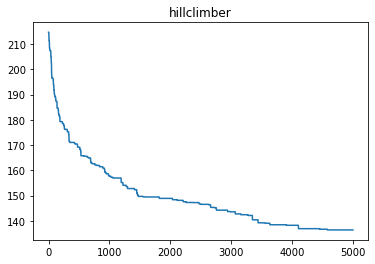

In [21]:
hillclimber_df_F, best_solution_F = random_start_hillclimber(joined_F, all_households_F, rel_poi_df, df_afstandn2)

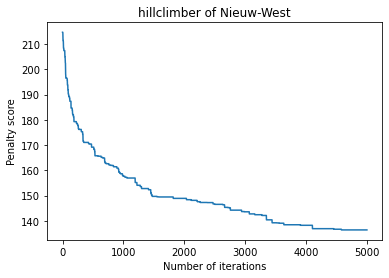

In [28]:
plt = hillclimber_df_F['best'].plot(title='hillclimber of Nieuw-West')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200505_NieuwWest.pdf')

In [23]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'F']
joined = joined.append(best_solution_F, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 172.0629101094821
Penalties are: 258.43719535775926


### Optimization of "Centrum"

In [24]:
joined_C = joined[joined['stadsdeel'].isin(['M', 'A', 'K', 'E'])]
all_households_C = create_all_households(rel_poi_df, subsectie = ['M', 'A', 'K', 'E'])
all_households_C = all_households_C.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?100
How many iterations hillclimber?5000
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 153.26724970083026
Penalties are: 284.94905064754465
Average distance is : 154.4059999434558
Penalties are: 281.20877170080917
Average distance is : 157.4402347745698
Penalties are: 283.3758193133773
Average distance is : 154.61484558480745
Penalties are: 286.48257516570567
Average distance is : 152.43233444980922
Penalties are: 284.4878963327767
Average distance is : 156.15738025184982
Penalties are: 284.5202909023281
Average distance is : 154.74000576486003
Penalties are: 285.5297839197254
Average distance is : 154.21899650529068
Penalties are: 285.729027130587
Average distance is : 156.9864155130398
Penalties are: 285.51367276869496
Average d

Average distance is : 154.00839372527435
Penalties are: 279.32623590182646
279.32623590182646 276.20403679604266
185.0
Amount of clusters to change: 97
Average distance is : 153.70130207937416
Penalties are: 277.26539076610857
277.26539076610857 276.20403679604266
184.0
Amount of clusters to change: 94
Average distance is : 153.50582194855113
Penalties are: 275.69212895104005
275.69212895104005 276.20403679604266
171.0
Amount of clusters to change: 89
Average distance is : 155.3119330013566
Penalties are: 279.9464890136141
279.9464890136141 275.69212895104005
124.0
Amount of clusters to change: 92
Average distance is : 153.61123319548383
Penalties are: 275.758592068324
275.758592068324 275.69212895104005
160.0
Amount of clusters to change: 105
Average distance is : 153.42411300166316
Penalties are: 277.769601665821
277.769601665821 275.69212895104005
212.0
Amount of clusters to change: 111
Average distance is : 154.02488416151223
Penalties are: 276.518848932437
276.518848932437 275.692

Average distance is : 150.8647761485957
Penalties are: 271.9993374748508
271.9993374748508 271.73433058726533
188.0
Amount of clusters to change: 105
Average distance is : 150.74563719070332
Penalties are: 272.6210712180788
272.6210712180788 271.73433058726533
189.0
Amount of clusters to change: 108
Average distance is : 152.10323748343615
Penalties are: 274.6093855510077
274.6093855510077 271.73433058726533
214.0
Amount of clusters to change: 97
Average distance is : 152.33846818406747
Penalties are: 275.13273855910705
275.13273855910705 271.73433058726533
200.0
Amount of clusters to change: 118
Average distance is : 151.5522618924727
Penalties are: 272.42831437933364
272.42831437933364 271.73433058726533
141.0
Amount of clusters to change: 86
Average distance is : 151.28913437989604
Penalties are: 272.7651000930154
272.7651000930154 271.73433058726533
179.0
Amount of clusters to change: 103
Average distance is : 151.11219998036435
Penalties are: 272.6944907787925
272.6944907787925 27

Average distance is : 152.0338472543113
Penalties are: 273.62864393920177
273.62864393920177 269.1589685523423
182.0
Amount of clusters to change: 116
Average distance is : 150.62202831425066
Penalties are: 270.24996828809407
270.24996828809407 269.1589685523423
166.0
Amount of clusters to change: 95
Average distance is : 150.4009882315082
Penalties are: 268.792001987147
268.792001987147 269.1589685523423
198.0
Amount of clusters to change: 100
Average distance is : 149.9942695911236
Penalties are: 268.82679762387954
268.82679762387954 268.792001987147
187.0
Amount of clusters to change: 106
Average distance is : 150.6061463113521
Penalties are: 270.89893798198887
270.89893798198887 268.792001987147
176.0
Amount of clusters to change: 91
Average distance is : 150.65562796777738
Penalties are: 270.49766889692205
270.49766889692205 268.792001987147
187.0
Amount of clusters to change: 84
Average distance is : 150.9936776813918
Penalties are: 271.46783848300356
271.46783848300356 268.79200

Average distance is : 150.96868304508192
Penalties are: 269.74538987184474
269.74538987184474 268.71209447436047
166.0
Amount of clusters to change: 95
Average distance is : 151.05639678985418
Penalties are: 269.33596222547214
269.33596222547214 268.71209447436047
149.0
Amount of clusters to change: 91
Average distance is : 151.01358458104133
Penalties are: 268.1637556490608
268.1637556490608 268.71209447436047
163.0
Amount of clusters to change: 91
Average distance is : 151.26619882813623
Penalties are: 269.9556626794258
269.9556626794258 268.1637556490608
144.0
Amount of clusters to change: 96
Average distance is : 150.94052669992067
Penalties are: 269.4759270546266
269.4759270546266 268.1637556490608
197.0
Amount of clusters to change: 114
Average distance is : 151.63104003827823
Penalties are: 267.95503985831914
267.95503985831914 268.1637556490608
149.0
Amount of clusters to change: 95
Average distance is : 151.2146062325217
Penalties are: 268.78956954706075
268.78956954706075 267

Average distance is : 152.5333276291152
Penalties are: 274.51793008702924
274.51793008702924 266.91036466500697
142.0
Amount of clusters to change: 93
Average distance is : 150.67262045116155
Penalties are: 267.7232498425526
267.7232498425526 266.91036466500697
184.0
Amount of clusters to change: 93
Average distance is : 150.59738778711724
Penalties are: 268.77547256823067
268.77547256823067 266.91036466500697
170.0
Amount of clusters to change: 101
Average distance is : 150.95550898581206
Penalties are: 268.0017061757409
268.0017061757409 266.91036466500697
140.0
Amount of clusters to change: 93
Average distance is : 151.07984412945433
Penalties are: 266.43970221525274
266.43970221525274 266.91036466500697
155.0
Amount of clusters to change: 101
Average distance is : 151.2153996598069
Penalties are: 268.3398104418248
268.3398104418248 266.43970221525274
229.0
Amount of clusters to change: 95
Average distance is : 151.91980676534376
Penalties are: 273.0723080452434
273.0723080452434 26

Average distance is : 151.68869785866934
Penalties are: 266.86932467337596
266.86932467337596 265.47600719397093
168.0
Amount of clusters to change: 82
Average distance is : 151.74125120581735
Penalties are: 266.9258265310435
266.9258265310435 265.47600719397093
163.0
Amount of clusters to change: 87
Average distance is : 152.03299545989213
Penalties are: 265.98336815209626
265.98336815209626 265.47600719397093
191.0
Amount of clusters to change: 106
Average distance is : 151.23710685105954
Penalties are: 266.2368852451741
266.2368852451741 265.47600719397093
171.0
Amount of clusters to change: 98
Average distance is : 153.082210186258
Penalties are: 272.0663234708585
272.0663234708585 265.47600719397093
176.0
Amount of clusters to change: 90
Average distance is : 152.68260210859117
Penalties are: 272.0576107013488
272.0576107013488 265.47600719397093
192.0
Amount of clusters to change: 101
Average distance is : 151.2838822232351
Penalties are: 266.17168377383376
266.17168377383376 265

Average distance is : 152.07840611715167
Penalties are: 265.3246914137294
265.3246914137294 264.21868165833286
185.0
Amount of clusters to change: 91
Average distance is : 152.7500678477259
Penalties are: 271.31611658713285
271.31611658713285 264.21868165833286
180.0
Amount of clusters to change: 85
Average distance is : 151.99751771328917
Penalties are: 265.25452652301266
265.25452652301266 264.21868165833286
180.0
Amount of clusters to change: 97
Average distance is : 151.9892187864647
Penalties are: 265.61533455557577
265.61533455557577 264.21868165833286
165.0
Amount of clusters to change: 86
Average distance is : 151.9859964375857
Penalties are: 264.79226023196543
264.79226023196543 264.21868165833286
143.0
Amount of clusters to change: 95
Average distance is : 151.70908552149766
Penalties are: 264.8613319518824
264.8613319518824 264.21868165833286
172.0
Amount of clusters to change: 105
Average distance is : 151.56184162454292
Penalties are: 264.6887280471877
264.6887280471877 26

Average distance is : 151.31270974113863
Penalties are: 264.35301790673196
264.35301790673196 262.5875913025652
167.0
Amount of clusters to change: 92
Average distance is : 152.35617494523055
Penalties are: 268.47850570825955
268.47850570825955 262.5875913025652
176.0
Amount of clusters to change: 99
Average distance is : 151.46222216364427
Penalties are: 262.9520534475689
262.9520534475689 262.5875913025652
155.0
Amount of clusters to change: 88
Average distance is : 151.60645239612967
Penalties are: 262.573911049635
262.573911049635 262.5875913025652
159.0
Amount of clusters to change: 81
Average distance is : 153.48498829879043
Penalties are: 271.088716474278
271.088716474278 262.573911049635
137.0
Amount of clusters to change: 82
Average distance is : 152.6098650165981
Penalties are: 264.7970140899542
264.7970140899542 262.573911049635
141.0
Amount of clusters to change: 89
Average distance is : 151.7907312484345
Penalties are: 262.19628780955844
262.19628780955844 262.573911049635

Average distance is : 151.96616460463517
Penalties are: 263.82045241708124
263.82045241708124 262.1108396234789
117.0
Amount of clusters to change: 74
Average distance is : 151.25113712224191
Penalties are: 262.98848803400017
262.98848803400017 262.1108396234789
188.0
Amount of clusters to change: 104
Average distance is : 151.4545459564284
Penalties are: 264.0440192719803
264.0440192719803 262.1108396234789
130.0
Amount of clusters to change: 92
Average distance is : 151.26046600723836
Penalties are: 261.86133311424555
261.86133311424555 262.1108396234789
188.0
Amount of clusters to change: 108
Average distance is : 151.3278655511175
Penalties are: 263.01641428311785
263.01641428311785 261.86133311424555
160.0
Amount of clusters to change: 98
Average distance is : 151.35919393784312
Penalties are: 263.2076132078263
263.2076132078263 261.86133311424555
151.0
Amount of clusters to change: 94
Average distance is : 150.78022248088536
Penalties are: 261.235681909826
261.235681909826 261.86

Average distance is : 151.2962557213702
Penalties are: 262.23075923867333
262.23075923867333 259.75673341941865
157.0
Amount of clusters to change: 95
Average distance is : 151.71591924907403
Penalties are: 260.8339559041706
260.8339559041706 259.75673341941865
133.0
Amount of clusters to change: 88
Average distance is : 150.82807753783976
Penalties are: 261.55982717033305
261.55982717033305 259.75673341941865
219.0
Amount of clusters to change: 107
Average distance is : 152.15799693632383
Penalties are: 270.46047631949347
270.46047631949347 259.75673341941865
112.0
Amount of clusters to change: 78
Average distance is : 150.74539847332377
Penalties are: 260.4832016044838
260.4832016044838 259.75673341941865
176.0
Amount of clusters to change: 110
Average distance is : 151.16291597999052
Penalties are: 261.5677101827235
261.5677101827235 259.75673341941865
206.0
Amount of clusters to change: 102
Average distance is : 150.95275052318573
Penalties are: 260.3527961933665
260.3527961933665 

Average distance is : 151.65299196075287
Penalties are: 259.55573661908727
259.55573661908727 258.9563887977784
143.0
Amount of clusters to change: 89
Average distance is : 151.92979485131502
Penalties are: 260.1231254844941
260.1231254844941 258.9563887977784
149.0
Amount of clusters to change: 81
Average distance is : 151.61349076939447
Penalties are: 258.85902288587283
258.85902288587283 258.9563887977784
191.0
Amount of clusters to change: 117
Average distance is : 151.44297282733015
Penalties are: 259.4977778956578
259.4977778956578 258.85902288587283
189.0
Amount of clusters to change: 99
Average distance is : 152.10255921256854
Penalties are: 260.5916945140688
260.5916945140688 258.85902288587283
127.0
Amount of clusters to change: 80
Average distance is : 151.34504645401117
Penalties are: 261.11613147172073
261.11613147172073 258.85902288587283
203.0
Amount of clusters to change: 103
Average distance is : 152.21334241791834
Penalties are: 262.2840694585924
262.2840694585924 258

Average distance is : 151.53687109012307
Penalties are: 259.7184969419283
259.7184969419283 258.85902288587283
236.0
Amount of clusters to change: 101
Average distance is : 151.45758473062835
Penalties are: 260.58338425822217
260.58338425822217 258.85902288587283
137.0
Amount of clusters to change: 84
Average distance is : 153.57020415976862
Penalties are: 268.1677422808523
268.1677422808523 258.85902288587283
183.0
Amount of clusters to change: 103
Average distance is : 153.9228434641286
Penalties are: 273.7786545203245
273.7786545203245 258.85902288587283
152.0
Amount of clusters to change: 92
Average distance is : 154.00316627978168
Penalties are: 267.8181369031265
267.8181369031265 258.85902288587283
123.0
Amount of clusters to change: 78
Average distance is : 151.53253074965778
Penalties are: 260.0676403923292
260.0676403923292 258.85902288587283
144.0
Amount of clusters to change: 93
Average distance is : 151.30499932692334
Penalties are: 258.3706227751314
258.3706227751314 258.8

Average distance is : 150.990468998815
Penalties are: 260.01916867579365
260.01916867579365 258.3706227751314
175.0
Amount of clusters to change: 114
Average distance is : 150.56669428238115
Penalties are: 259.4965929928821
259.4965929928821 258.3706227751314
166.0
Amount of clusters to change: 95
Average distance is : 151.47541878717183
Penalties are: 258.88343930351203
258.88343930351203 258.3706227751314
209.0
Amount of clusters to change: 109
Average distance is : 151.10338750532026
Penalties are: 260.09343704641424
260.09343704641424 258.3706227751314
188.0
Amount of clusters to change: 102
Average distance is : 151.11410661553742
Penalties are: 259.4988105115666
259.4988105115666 258.3706227751314
178.0
Amount of clusters to change: 102
Average distance is : 151.2717095091286
Penalties are: 259.4437551281347
259.4437551281347 258.3706227751314
175.0
Amount of clusters to change: 91
Average distance is : 151.8375187304379
Penalties are: 262.93709689881524
262.93709689881524 258.37

Average distance is : 152.29609282712218
Penalties are: 257.9309644950906
257.9309644950906 257.35733460629706
200.0
Amount of clusters to change: 114
Average distance is : 151.91063917667256
Penalties are: 258.23429385595995
258.23429385595995 257.35733460629706
208.0
Amount of clusters to change: 100
Average distance is : 152.0837494588646
Penalties are: 258.2332482469451
258.2332482469451 257.35733460629706
136.0
Amount of clusters to change: 88
Average distance is : 151.72083385739876
Penalties are: 258.0142649849738
258.0142649849738 257.35733460629706
144.0
Amount of clusters to change: 85
Average distance is : 151.5701710218441
Penalties are: 260.39993615245135
260.39993615245135 257.35733460629706
211.0
Amount of clusters to change: 116
Average distance is : 152.8107074035703
Penalties are: 258.6792497178628
258.6792497178628 257.35733460629706
165.0
Amount of clusters to change: 94
Average distance is : 152.18728624469318
Penalties are: 257.6227367141897
257.6227367141897 257.

Average distance is : 152.3524852985254
Penalties are: 258.9894439085833
258.9894439085833 257.35733460629706
169.0
Amount of clusters to change: 99
Average distance is : 151.775442051785
Penalties are: 256.91452055691985
256.91452055691985 257.35733460629706
128.0
Amount of clusters to change: 74
Average distance is : 153.138319337648
Penalties are: 262.09962848182056
262.09962848182056 256.91452055691985
146.0
Amount of clusters to change: 90
Average distance is : 153.23745831072654
Penalties are: 261.84256530367264
261.84256530367264 256.91452055691985
153.0
Amount of clusters to change: 95
Average distance is : 151.84019459788908
Penalties are: 258.4555301918533
258.4555301918533 256.91452055691985
158.0
Amount of clusters to change: 88
Average distance is : 151.90887877973802
Penalties are: 257.4473560423861
257.4473560423861 256.91452055691985
170.0
Amount of clusters to change: 85
Average distance is : 152.2882755445034
Penalties are: 258.1276746038455
258.1276746038455 256.9145

Average distance is : 151.5736899558899
Penalties are: 257.02559202534377
257.02559202534377 256.79702770862303
184.0
Amount of clusters to change: 94
Average distance is : 152.4407044130001
Penalties are: 260.1917043899284
260.1917043899284 256.79702770862303
225.0
Amount of clusters to change: 105
Average distance is : 151.67936656629627
Penalties are: 259.1153029054851
259.1153029054851 256.79702770862303
123.0
Amount of clusters to change: 83
Average distance is : 151.83458400548386
Penalties are: 259.1735086120539
259.1735086120539 256.79702770862303
172.0
Amount of clusters to change: 81
Average distance is : 152.73960452055607
Penalties are: 262.56660422804293
262.56660422804293 256.79702770862303
179.0
Amount of clusters to change: 94
Average distance is : 151.46720919725223
Penalties are: 258.07386382599213
258.07386382599213 256.79702770862303
145.0
Amount of clusters to change: 85
Average distance is : 152.04156652091856
Penalties are: 258.7552623833938
258.7552623833938 256

Average distance is : 151.90519251122032
Penalties are: 257.4672640466298
257.4672640466298 256.79702770862303
149.0
Amount of clusters to change: 91
Average distance is : 151.9591696384489
Penalties are: 257.863213130899
257.863213130899 256.79702770862303
149.0
Amount of clusters to change: 91
Average distance is : 151.55290034864035
Penalties are: 259.27724454006346
259.27724454006346 256.79702770862303
162.0
Amount of clusters to change: 86
Average distance is : 154.09215409724814
Penalties are: 264.60750652614047
264.60750652614047 256.79702770862303
251.0
Amount of clusters to change: 101
Average distance is : 152.21439175625216
Penalties are: 258.41487706636457
258.41487706636457 256.79702770862303
185.0
Amount of clusters to change: 92
Average distance is : 151.72035199630707
Penalties are: 258.38089322743855
258.38089322743855 256.79702770862303
147.0
Amount of clusters to change: 86
Average distance is : 152.2823621643653
Penalties are: 258.425882926788
258.425882926788 256.7

Average distance is : 152.10641430898926
Penalties are: 257.80286894250315
257.80286894250315 256.30271919209423
157.0
Amount of clusters to change: 94
Average distance is : 151.38852405962012
Penalties are: 257.5249248627355
257.5249248627355 256.30271919209423
162.0
Amount of clusters to change: 96
Average distance is : 152.98892448328797
Penalties are: 263.7073322872021
263.7073322872021 256.30271919209423
182.0
Amount of clusters to change: 96
Average distance is : 154.55479500292742
Penalties are: 269.5167276182022
269.5167276182022 256.30271919209423
186.0
Amount of clusters to change: 91
Average distance is : 151.78438380902355
Penalties are: 258.6503860884157
258.6503860884157 256.30271919209423
179.0
Amount of clusters to change: 98
Average distance is : 152.26676478284992
Penalties are: 256.47894383461477
256.47894383461477 256.30271919209423
158.0
Amount of clusters to change: 99
Average distance is : 151.7537276455429
Penalties are: 258.8072534564452
258.8072534564452 256.3

Average distance is : 152.09425307053465
Penalties are: 256.4518324020339
256.4518324020339 255.54630411645607
178.0
Amount of clusters to change: 95
Average distance is : 151.6681289249619
Penalties are: 257.6862750172241
257.6862750172241 255.54630411645607
128.0
Amount of clusters to change: 78
Average distance is : 151.63592382036782
Penalties are: 256.0778710453237
256.0778710453237 255.54630411645607
140.0
Amount of clusters to change: 92
Average distance is : 152.0638178395514
Penalties are: 256.98958444039613
256.98958444039613 255.54630411645607
155.0
Amount of clusters to change: 93
Average distance is : 151.7271402906719
Penalties are: 257.1561364037906
257.1561364037906 255.54630411645607
178.0
Amount of clusters to change: 113
Average distance is : 152.0341582125076
Penalties are: 256.97339594948164
256.97339594948164 255.54630411645607
177.0
Amount of clusters to change: 97
Average distance is : 151.91388257701362
Penalties are: 257.0643377319971
257.0643377319971 255.546

Average distance is : 152.2044673448636
Penalties are: 263.95217490394657
263.95217490394657 255.1944538753186
206.0
Amount of clusters to change: 117
Average distance is : 151.36089878832394
Penalties are: 257.34496280860736
257.34496280860736 255.1944538753186
156.0
Amount of clusters to change: 82
Average distance is : 151.65874892619564
Penalties are: 256.7708004412753
256.7708004412753 255.1944538753186
148.0
Amount of clusters to change: 94
Average distance is : 152.88781098082757
Penalties are: 262.7454070741657
262.7454070741657 255.1944538753186
180.0
Amount of clusters to change: 95
Average distance is : 151.2447110135989
Penalties are: 257.1692443878996
257.1692443878996 255.1944538753186
155.0
Amount of clusters to change: 100
Average distance is : 151.1693406759635
Penalties are: 257.70800960319207
257.70800960319207 255.1944538753186
172.0
Amount of clusters to change: 84
Average distance is : 150.6323363840049
Penalties are: 256.53306238719796
256.53306238719796 255.1944

Average distance is : 152.80889785822984
Penalties are: 260.86823497275844
260.86823497275844 255.1944538753186
168.0
Amount of clusters to change: 108
Average distance is : 151.05770524158424
Penalties are: 256.8595123590899
256.8595123590899 255.1944538753186
212.0
Amount of clusters to change: 107
Average distance is : 151.44168543978174
Penalties are: 259.1224437078115
259.1224437078115 255.1944538753186
199.0
Amount of clusters to change: 92
Average distance is : 151.11871612575945
Penalties are: 255.95241801324673
255.95241801324673 255.1944538753186
181.0
Amount of clusters to change: 97
Average distance is : 151.31859258402827
Penalties are: 257.25087855207596
257.25087855207596 255.1944538753186
142.0
Amount of clusters to change: 84
Average distance is : 150.7911928566556
Penalties are: 256.3176233330656
256.3176233330656 255.1944538753186
127.0
Amount of clusters to change: 89
Average distance is : 150.90890439196835
Penalties are: 256.43871215451395
256.43871215451395 255.1

Average distance is : 150.14677691238685
Penalties are: 256.79506917328507
256.79506917328507 255.1319008440869
214.0
Amount of clusters to change: 102
Average distance is : 150.05447348897437
Penalties are: 257.0578245846137
257.0578245846137 255.1319008440869
200.0
Amount of clusters to change: 135
Average distance is : 150.79098948887594
Penalties are: 257.57666195522154
257.57666195522154 255.1319008440869
126.0
Amount of clusters to change: 78
Average distance is : 150.22175288853225
Penalties are: 256.1584173940242
256.1584173940242 255.1319008440869
187.0
Amount of clusters to change: 102
Average distance is : 150.1427511976445
Penalties are: 257.1792031937511
257.1792031937511 255.1319008440869
164.0
Amount of clusters to change: 102
Average distance is : 150.89608180282087
Penalties are: 257.0292014087663
257.0292014087663 255.1319008440869
126.0
Amount of clusters to change: 84
Average distance is : 152.564331401397
Penalties are: 261.74053366203555
261.74053366203555 255.131

Average distance is : 150.2294377467935
Penalties are: 255.59754967888412
255.59754967888412 254.47150945106875
149.0
Amount of clusters to change: 92
Average distance is : 149.86169396067697
Penalties are: 255.92953316750285
255.92953316750285 254.47150945106875
145.0
Amount of clusters to change: 85
Average distance is : 151.59754915942108
Penalties are: 261.2017912353595
261.2017912353595 254.47150945106875
177.0
Amount of clusters to change: 105
Average distance is : 150.10054877376172
Penalties are: 255.58315268590414
255.58315268590414 254.47150945106875
118.0
Amount of clusters to change: 71
Average distance is : 149.89689003892832
Penalties are: 255.50631315964105
255.50631315964105 254.47150945106875
180.0
Amount of clusters to change: 103
Average distance is : 150.46591014716492
Penalties are: 255.1892029612785
255.1892029612785 254.47150945106875
234.0
Amount of clusters to change: 99
Average distance is : 150.52947377697086
Penalties are: 256.9490699150841
256.9490699150841

Average distance is : 151.32203406837186
Penalties are: 255.17664813155412
255.17664813155412 253.7544828540875
167.0
Amount of clusters to change: 84
Average distance is : 150.96350129374807
Penalties are: 254.21811561708796
254.21811561708796 253.7544828540875
136.0
Amount of clusters to change: 80
Average distance is : 151.42090316700725
Penalties are: 255.07538781505323
255.07538781505323 253.7544828540875
195.0
Amount of clusters to change: 95
Average distance is : 151.56173085394752
Penalties are: 259.04290714620834
259.04290714620834 253.7544828540875
173.0
Amount of clusters to change: 94
Average distance is : 150.86917259902282
Penalties are: 255.09233876967036
255.09233876967036 253.7544828540875
220.0
Amount of clusters to change: 104
Average distance is : 151.037485708092
Penalties are: 254.94044658413185
254.94044658413185 253.7544828540875
139.0
Amount of clusters to change: 82
Average distance is : 151.28193909736137
Penalties are: 254.3450691817386
254.3450691817386 253

Average distance is : 151.02243153814248
Penalties are: 254.50745418598655
254.50745418598655 253.74401083322414
162.0
Amount of clusters to change: 90
Average distance is : 151.5922540276787
Penalties are: 255.1057257118946
255.1057257118946 253.74401083322414
137.0
Amount of clusters to change: 74
Average distance is : 150.95766553417153
Penalties are: 254.09312811566144
254.09312811566144 253.74401083322414
111.0
Amount of clusters to change: 66
Average distance is : 151.57010053062157
Penalties are: 256.57121558454185
256.57121558454185 253.74401083322414
147.0
Amount of clusters to change: 91
Average distance is : 151.20186810987937
Penalties are: 255.5336224834839
255.5336224834839 253.74401083322414
148.0
Amount of clusters to change: 99
Average distance is : 152.91201023623088
Penalties are: 261.98225142336645
261.98225142336645 253.74401083322414
183.0
Amount of clusters to change: 95
Average distance is : 151.65049234748668
Penalties are: 255.53435840092652
255.53435840092652

Average distance is : 151.3196820694946
Penalties are: 255.4492002011945
255.4492002011945 253.70320357838767
277.0
Amount of clusters to change: 90
Average distance is : 151.1484435571927
Penalties are: 256.39346983773413
256.39346983773413 253.70320357838767
227.0
Amount of clusters to change: 91
Average distance is : 151.40514265034415
Penalties are: 256.6392593992907
256.6392593992907 253.70320357838767
145.0
Amount of clusters to change: 91
Average distance is : 151.11073939370831
Penalties are: 256.9647106751427
256.9647106751427 253.70320357838767
188.0
Amount of clusters to change: 100
Average distance is : 150.78865272301036
Penalties are: 255.14836211837505
255.14836211837505 253.70320357838767
168.0
Amount of clusters to change: 96
Average distance is : 150.98472963833282
Penalties are: 254.2280594772513
254.2280594772513 253.70320357838767
157.0
Amount of clusters to change: 88
Average distance is : 150.90461431199319
Penalties are: 256.06451338619615
256.06451338619615 253

Average distance is : 151.12042477213873
Penalties are: 254.8252734321835
254.8252734321835 253.3826745594644
193.0
Amount of clusters to change: 95
Average distance is : 151.03697114447542
Penalties are: 254.12097961637792
254.12097961637792 253.3826745594644
193.0
Amount of clusters to change: 83
Average distance is : 150.82167843945118
Penalties are: 254.9311339232502
254.9311339232502 253.3826745594644
139.0
Amount of clusters to change: 99
Average distance is : 152.24352973622484
Penalties are: 259.618660828786
259.618660828786 253.3826745594644
139.0
Amount of clusters to change: 91
Average distance is : 152.32736911704336
Penalties are: 262.58235187415994
262.58235187415994 253.3826745594644
149.0
Amount of clusters to change: 92
Average distance is : 150.47339636975053
Penalties are: 256.7017781027698
256.7017781027698 253.3826745594644
248.0
Amount of clusters to change: 117
Average distance is : 150.8150519396072
Penalties are: 253.89405293190242
253.89405293190242 253.382674

Average distance is : 152.7564816341909
Penalties are: 259.81969882749263
259.81969882749263 252.73877218105812
167.0
Amount of clusters to change: 98
Average distance is : 150.22380845694764
Penalties are: 254.47825801290858
254.47825801290858 252.73877218105812
176.0
Amount of clusters to change: 100
Average distance is : 150.35634081108174
Penalties are: 255.00506678304384
255.00506678304384 252.73877218105812
152.0
Amount of clusters to change: 96
Average distance is : 150.01358376064158
Penalties are: 253.12112714561658
253.12112714561658 252.73877218105812
149.0
Amount of clusters to change: 88
Average distance is : 150.1458257042894
Penalties are: 255.80166702735147
255.80166702735147 252.73877218105812
170.0
Amount of clusters to change: 92
Average distance is : 150.32020978080425
Penalties are: 256.1101584871527
256.1101584871527 252.73877218105812
184.0
Amount of clusters to change: 96
Average distance is : 150.89076815502193
Penalties are: 254.9626690308428
254.9626690308428

Average distance is : 149.63239937683892
Penalties are: 252.87992243022651
252.87992243022651 251.82209041071573
135.0
Amount of clusters to change: 87
Average distance is : 150.237449721065
Penalties are: 252.114364119753
252.114364119753 251.82209041071573
182.0
Amount of clusters to change: 109
Average distance is : 150.78445458494718
Penalties are: 253.16219251903104
253.16219251903104 251.82209041071573
209.0
Amount of clusters to change: 106
Average distance is : 150.26855786524067
Penalties are: 253.1793469653869
253.1793469653869 251.82209041071573
225.0
Amount of clusters to change: 93
Average distance is : 150.62845578226137
Penalties are: 253.38948434831858
253.38948434831858 251.82209041071573
137.0
Amount of clusters to change: 93
Average distance is : 150.0251122819726
Penalties are: 252.94714839995433
252.94714839995433 251.82209041071573
202.0
Amount of clusters to change: 94
Average distance is : 150.3137910272096
Penalties are: 253.12789226162045
253.12789226162045 25

Average distance is : 150.06515138802942
Penalties are: 251.92689651586946
251.92689651586946 251.22251875842716
205.0
Amount of clusters to change: 97
Average distance is : 151.08316907158095
Penalties are: 253.07767092443794
253.07767092443794 251.22251875842716
175.0
Amount of clusters to change: 103
Average distance is : 150.85193807876692
Penalties are: 253.73978640838257
253.73978640838257 251.22251875842716
151.0
Amount of clusters to change: 87
Average distance is : 149.82254438669636
Penalties are: 252.99250100597246
252.99250100597246 251.22251875842716
176.0
Amount of clusters to change: 102
Average distance is : 150.22245627514133
Penalties are: 252.70315182786882
252.70315182786882 251.22251875842716
171.0
Amount of clusters to change: 75
Average distance is : 149.7095302813634
Penalties are: 251.84094327456705
251.84094327456705 251.22251875842716
150.0
Amount of clusters to change: 79
Average distance is : 149.56607311610966
Penalties are: 251.52145914399355
251.52145914

Average distance is : 150.58378874500113
Penalties are: 254.00924839910903
254.00924839910903 251.22251875842716
166.0
Amount of clusters to change: 87
Average distance is : 149.90347746158758
Penalties are: 252.67945565267743
252.67945565267743 251.22251875842716
187.0
Amount of clusters to change: 99
Average distance is : 150.01636533941308
Penalties are: 252.50864958345136
252.50864958345136 251.22251875842716
114.0
Amount of clusters to change: 86
Average distance is : 150.78318849554168
Penalties are: 252.34312446161454
252.34312446161454 251.22251875842716
173.0
Amount of clusters to change: 97
Average distance is : 149.93699773375732
Penalties are: 252.11551672112162
252.11551672112162 251.22251875842716
182.0
Amount of clusters to change: 95
Average distance is : 151.25906152585225
Penalties are: 257.53129695418596
257.53129695418596 251.22251875842716
205.0
Amount of clusters to change: 83
Average distance is : 150.43743137171055
Penalties are: 252.7990281925888
252.7990281925

Average distance is : 150.62016357173943
Penalties are: 252.47329084649618
252.47329084649618 251.22251875842716
196.0
Amount of clusters to change: 113
Average distance is : 151.27003318335645
Penalties are: 257.27707428556937
257.27707428556937 251.22251875842716
168.0
Amount of clusters to change: 90
Average distance is : 149.75080169336076
Penalties are: 253.32928623931153
253.32928623931153 251.22251875842716
174.0
Amount of clusters to change: 95
Average distance is : 150.29651092459676
Penalties are: 252.84070573826963
252.84070573826963 251.22251875842716
162.0
Amount of clusters to change: 90
Average distance is : 151.08062906008004
Penalties are: 257.92763558437275
257.92763558437275 251.22251875842716
173.0
Amount of clusters to change: 91
Average distance is : 149.73204236940796
Penalties are: 251.6619703998952
251.6619703998952 251.22251875842716
203.0
Amount of clusters to change: 102
Average distance is : 150.1437233204949
Penalties are: 252.2155226238128
252.21552262381

Average distance is : 149.79739518805187
Penalties are: 254.07951776090823
254.07951776090823 251.22251875842716
168.0
Amount of clusters to change: 100
Average distance is : 150.2852797470692
Penalties are: 252.58059467341826
252.58059467341826 251.22251875842716
196.0
Amount of clusters to change: 92
Average distance is : 150.18640510866453
Penalties are: 254.06287084666528
254.06287084666528 251.22251875842716
180.0
Amount of clusters to change: 102
Average distance is : 150.96230666334145
Penalties are: 258.4060266160017
258.4060266160017 251.22251875842716
162.0
Amount of clusters to change: 91
Average distance is : 150.0980942664435
Penalties are: 253.10948090749625
253.10948090749625 251.22251875842716
184.0
Amount of clusters to change: 113
Average distance is : 149.9629909594268
Penalties are: 253.7749214538415
253.7749214538415 251.22251875842716
180.0
Amount of clusters to change: 99
Average distance is : 150.3818007344432
Penalties are: 257.9618853613172
257.9618853613172 2

253.75422042208575 251.22251875842716
130.0
Amount of clusters to change: 81
Average distance is : 151.51817085179667
Penalties are: 258.9718368380342
258.9718368380342 251.22251875842716
125.0
Amount of clusters to change: 83
Average distance is : 149.825656653258
Penalties are: 252.9784102380942
252.9784102380942 251.22251875842716
147.0
Amount of clusters to change: 94
Average distance is : 150.79166012350635
Penalties are: 253.0329827674386
253.0329827674386 251.22251875842716
185.0
Amount of clusters to change: 97
Average distance is : 149.98632232129773
Penalties are: 254.67406938673724
254.67406938673724 251.22251875842716
250.0
Amount of clusters to change: 113
Average distance is : 150.8989836205609
Penalties are: 257.43488611588975
257.43488611588975 251.22251875842716
193.0
Amount of clusters to change: 104
Average distance is : 149.79887144936737
Penalties are: 253.6154307083652
253.6154307083652 251.22251875842716
138.0
Amount of clusters to change: 87
Average distance is 

Average distance is : 151.0913943565192
Penalties are: 258.36678478107416
258.36678478107416 250.98171434187
145.0
Amount of clusters to change: 82
Average distance is : 149.6193445990921
Penalties are: 252.5934739377058
252.5934739377058 250.98171434187
151.0
Amount of clusters to change: 92
Average distance is : 150.33698028580764
Penalties are: 257.69928007878707
257.69928007878707 250.98171434187
186.0
Amount of clusters to change: 108
Average distance is : 150.79040042169507
Penalties are: 258.39677861209617
258.39677861209617 250.98171434187
190.0
Amount of clusters to change: 104
Average distance is : 149.7842901398868
Penalties are: 252.41168324126008
252.41168324126008 250.98171434187
172.0
Amount of clusters to change: 92
Average distance is : 149.53342931273662
Penalties are: 252.20193140789647
252.20193140789647 250.98171434187
134.0
Amount of clusters to change: 75
Average distance is : 149.98274853418613
Penalties are: 252.09794696665497
252.09794696665497 250.98171434187

Average distance is : 149.96924665346813
Penalties are: 255.86045022338507
255.86045022338507 250.69460892398993
112.0
Amount of clusters to change: 90
Average distance is : 149.47198969244184
Penalties are: 251.13126493847932
251.13126493847932 250.69460892398993
145.0
Amount of clusters to change: 91
Average distance is : 149.3371514376848
Penalties are: 252.10073812593254
252.10073812593254 250.69460892398993
213.0
Amount of clusters to change: 103
Average distance is : 149.4237623435438
Penalties are: 251.59435304771606
251.59435304771606 250.69460892398993
205.0
Amount of clusters to change: 100
Average distance is : 149.72125619878136
Penalties are: 252.27711155304394
252.27711155304394 250.69460892398993
179.0
Amount of clusters to change: 104
Average distance is : 151.3751184218549
Penalties are: 255.312857340006
255.312857340006 250.69460892398993
183.0
Amount of clusters to change: 90
Average distance is : 149.39585523597577
Penalties are: 252.60335911736482
252.6033591173648

Average distance is : 150.4398922380564
Penalties are: 251.69494435662145
251.69494435662145 250.55376514770464
156.0
Amount of clusters to change: 89
Average distance is : 150.78370748684256
Penalties are: 257.96200150684524
257.96200150684524 250.55376514770464
160.0
Amount of clusters to change: 95
Average distance is : 151.18442709411377
Penalties are: 257.82657223347013
257.82657223347013 250.55376514770464
150.0
Amount of clusters to change: 91
Average distance is : 149.57050513670887
Penalties are: 252.1014881629168
252.1014881629168 250.55376514770464
182.0
Amount of clusters to change: 95
Average distance is : 149.86896522253812
Penalties are: 251.78017301880493
251.78017301880493 250.55376514770464
158.0
Amount of clusters to change: 108
Average distance is : 151.71966121112686
Penalties are: 258.6682401611247
258.6682401611247 250.55376514770464
139.0
Amount of clusters to change: 85
Average distance is : 149.81295988445544
Penalties are: 252.43352638141573
252.4335263814157

Average distance is : 150.0844350597516
Penalties are: 252.61029147205892
252.61029147205892 250.55376514770464
130.0
Amount of clusters to change: 84
Average distance is : 150.83815646759098
Penalties are: 253.36920794253274
253.36920794253274 250.55376514770464
146.0
Amount of clusters to change: 99
Average distance is : 150.2314158734928
Penalties are: 252.0599446017744
252.0599446017744 250.55376514770464
147.0
Amount of clusters to change: 90
Average distance is : 150.11593989239202
Penalties are: 251.04956127766954
251.04956127766954 250.55376514770464
127.0
Amount of clusters to change: 77
Average distance is : 149.60805637585202
Penalties are: 251.92860525303587
251.92860525303587 250.55376514770464
213.0
Amount of clusters to change: 117
Average distance is : 149.64525123055944
Penalties are: 251.94810946079033
251.94810946079033 250.55376514770464
184.0
Amount of clusters to change: 87
Average distance is : 151.43783143026855
Penalties are: 259.4837247503033
259.4837247503033

Average distance is : 151.56384556821706
Penalties are: 261.80131495141035
261.80131495141035 250.55376514770464
153.0
Amount of clusters to change: 92
Average distance is : 149.98939379019373
Penalties are: 251.64906037947983
251.64906037947983 250.55376514770464
190.0
Amount of clusters to change: 95
Average distance is : 150.34482050592942
Penalties are: 251.55130355006824
251.55130355006824 250.55376514770464
174.0
Amount of clusters to change: 97
Average distance is : 149.56877518650865
Penalties are: 251.50501161940429
251.50501161940429 250.55376514770464
154.0
Amount of clusters to change: 93
Average distance is : 149.7240337563566
Penalties are: 251.62454786399925
251.62454786399925 250.55376514770464
175.0
Amount of clusters to change: 100
Average distance is : 150.3501334677733
Penalties are: 252.5246238508456
252.5246238508456 250.55376514770464
122.0
Amount of clusters to change: 81
Average distance is : 149.97230832984317
Penalties are: 251.66863150764834
251.668631507648

Average distance is : 149.88591463069656
Penalties are: 253.19397123468323
253.19397123468323 250.55376514770464
206.0
Amount of clusters to change: 109
Average distance is : 149.85695241731634
Penalties are: 252.94202844854914
252.94202844854914 250.55376514770464
111.0
Amount of clusters to change: 73
Average distance is : 149.3065452825503
Penalties are: 251.1506038095922
251.1506038095922 250.55376514770464
176.0
Amount of clusters to change: 100
Average distance is : 150.33903433552103
Penalties are: 256.3584094011928
256.3584094011928 250.55376514770464
141.0
Amount of clusters to change: 90
Average distance is : 151.5429092946071
Penalties are: 259.3455287612116
259.3455287612116 250.55376514770464
186.0
Amount of clusters to change: 88
Average distance is : 150.6278076102749
Penalties are: 254.37408715398564
254.37408715398564 250.55376514770464
156.0
Amount of clusters to change: 100
Average distance is : 149.99572861847275
Penalties are: 252.44610569896062
252.44610569896062 

Average distance is : 149.0278135814962
Penalties are: 252.03561008377434
252.03561008377434 250.23539962508664
161.0
Amount of clusters to change: 97
Average distance is : 149.059881226759
Penalties are: 252.05471174996197
252.05471174996197 250.23539962508664
182.0
Amount of clusters to change: 95
Average distance is : 149.68763204876987
Penalties are: 251.16263458205827
251.16263458205827 250.23539962508664
167.0
Amount of clusters to change: 104
Average distance is : 149.1580970198898
Penalties are: 251.60256747172298
251.60256747172298 250.23539962508664
148.0
Amount of clusters to change: 100
Average distance is : 149.31319677594956
Penalties are: 251.2329583009282
251.2329583009282 250.23539962508664
152.0
Amount of clusters to change: 81
Average distance is : 149.24692668027473
Penalties are: 251.3228682625492
251.3228682625492 250.23539962508664
163.0
Amount of clusters to change: 104
Average distance is : 149.16515502515048
Penalties are: 251.14212655967333
251.14212655967333

Average distance is : 150.33769871022074
Penalties are: 255.83632685301032
255.83632685301032 250.09048473506687
143.0
Amount of clusters to change: 83
Average distance is : 149.26110070190094
Penalties are: 251.9640824365564
251.9640824365564 250.09048473506687
133.0
Amount of clusters to change: 79
Average distance is : 149.17684981507313
Penalties are: 251.51270459617564
251.51270459617564 250.09048473506687
154.0
Amount of clusters to change: 96
Average distance is : 151.23947314472778
Penalties are: 258.1742406694338
258.1742406694338 250.09048473506687
195.0
Amount of clusters to change: 104
Average distance is : 149.1683848274388
Penalties are: 252.14999603530185
252.14999603530185 250.09048473506687
189.0
Amount of clusters to change: 95
Average distance is : 149.34635150106047
Penalties are: 251.5838141727391
251.5838141727391 250.09048473506687
166.0
Amount of clusters to change: 97
Average distance is : 149.36227463040575
Penalties are: 252.09484919987486
252.09484919987486 

Average distance is : 149.77687776887802
Penalties are: 252.32764624790775
252.32764624790775 250.09048473506687
164.0
Amount of clusters to change: 104
Average distance is : 149.28448132876548
Penalties are: 252.34377909276887
252.34377909276887 250.09048473506687
194.0
Amount of clusters to change: 103
Average distance is : 149.39136876998217
Penalties are: 251.72063028344633
251.72063028344633 250.09048473506687
207.0
Amount of clusters to change: 110
Average distance is : 150.36419687995254
Penalties are: 256.39870230738666
256.39870230738666 250.09048473506687
147.0
Amount of clusters to change: 91
Average distance is : 150.97597321049673
Penalties are: 258.6472050526654
258.6472050526654 250.09048473506687
159.0
Amount of clusters to change: 85
Average distance is : 148.44428842004135
Penalties are: 250.84304558768832
250.84304558768832 250.09048473506687
193.0
Amount of clusters to change: 102
Average distance is : 149.25316343554485
Penalties are: 252.85084877297243
252.8508487

Average distance is : 149.20415036206333
Penalties are: 250.7405979762287
250.7405979762287 249.93780040619137
160.0
Amount of clusters to change: 88
Average distance is : 148.58267373999027
Penalties are: 250.67425167802256
250.67425167802256 249.93780040619137
148.0
Amount of clusters to change: 96
Average distance is : 150.509124382594
Penalties are: 252.59936147860418
252.59936147860418 249.93780040619137
172.0
Amount of clusters to change: 103
Average distance is : 150.11500475865554
Penalties are: 257.64123250333915
257.64123250333915 249.93780040619137
155.0
Amount of clusters to change: 92
Average distance is : 149.26631221517644
Penalties are: 251.61853511167092
251.61853511167092 249.93780040619137
163.0
Amount of clusters to change: 96
Average distance is : 149.16639379809948
Penalties are: 250.4988152082946
250.4988152082946 249.93780040619137
171.0
Amount of clusters to change: 76
Average distance is : 148.62575282958923
Penalties are: 251.84197553553014
251.84197553553014

Average distance is : 150.66330165444563
Penalties are: 257.17898787554736
257.17898787554736 249.93780040619137
169.0
Amount of clusters to change: 93
Average distance is : 149.93959055535686
Penalties are: 252.01261343981943
252.01261343981943 249.93780040619137
156.0
Amount of clusters to change: 95
Average distance is : 149.83804226071038
Penalties are: 254.98380666390517
254.98380666390517 249.93780040619137
171.0
Amount of clusters to change: 94
Average distance is : 149.61851097601988
Penalties are: 251.67495452854754
251.67495452854754 249.93780040619137
160.0
Amount of clusters to change: 92
Average distance is : 150.01895214210668
Penalties are: 250.73550650920586
250.73550650920586 249.93780040619137
135.0
Amount of clusters to change: 87
Average distance is : 149.32665496741916
Penalties are: 250.8242649119989
250.8242649119989 249.93780040619137
177.0
Amount of clusters to change: 83
Average distance is : 149.21288235178963
Penalties are: 251.84684940487264
251.84684940487

Average distance is : 149.2512568782928
Penalties are: 251.04037296058974
251.04037296058974 249.93780040619137
166.0
Amount of clusters to change: 95
Average distance is : 149.28473339701725
Penalties are: 252.23988193610836
252.23988193610836 249.93780040619137
148.0
Amount of clusters to change: 84
Average distance is : 149.0416073020789
Penalties are: 252.32964674243834
252.32964674243834 249.93780040619137
171.0
Amount of clusters to change: 92
Average distance is : 148.8156220629504
Penalties are: 251.64357429582228
251.64357429582228 249.93780040619137
126.0
Amount of clusters to change: 88
Average distance is : 149.22541895142834
Penalties are: 252.05255980015892
252.05255980015892 249.93780040619137
184.0
Amount of clusters to change: 99
Average distance is : 149.48272663465661
Penalties are: 252.1333896372597
252.1333896372597 249.93780040619137
141.0
Amount of clusters to change: 85
Average distance is : 149.03969286721673
Penalties are: 250.62442156618258
250.62442156618258

Average distance is : 149.29997405226237
Penalties are: 251.28924723992762
251.28924723992762 249.93780040619137
173.0
Amount of clusters to change: 102
Average distance is : 148.89069403131654
Penalties are: 251.9085619367846
251.9085619367846 249.93780040619137
152.0
Amount of clusters to change: 92
Average distance is : 149.55002561196048
Penalties are: 252.9058033945086
252.9058033945086 249.93780040619137
162.0
Amount of clusters to change: 106
Average distance is : 149.12357883411553
Penalties are: 253.26975548421728
253.26975548421728 249.93780040619137
261.0
Amount of clusters to change: 108
Average distance is : 148.73260736852208
Penalties are: 251.36563650100595
251.36563650100595 249.93780040619137
137.0
Amount of clusters to change: 85
Average distance is : 148.69009840965765
Penalties are: 252.20210830219622
252.20210830219622 249.93780040619137
234.0
Amount of clusters to change: 111
Average distance is : 148.88124409636072
Penalties are: 250.47089451493733
250.470894514

Average distance is : 149.40535973599833
Penalties are: 251.7484987319729
251.7484987319729 249.93780040619137
186.0
Amount of clusters to change: 88
Average distance is : 150.1511840415357
Penalties are: 255.97872911559335
255.97872911559335 249.93780040619137
157.0
Amount of clusters to change: 107
Average distance is : 149.31639072523342
Penalties are: 252.00931173812702
252.00931173812702 249.93780040619137
197.0
Amount of clusters to change: 92
Average distance is : 150.1128143149697
Penalties are: 254.60054061913536
254.60054061913536 249.93780040619137
150.0
Amount of clusters to change: 85
Average distance is : 149.26975076864116
Penalties are: 251.679008090013
251.679008090013 249.93780040619137
179.0
Amount of clusters to change: 101
Average distance is : 149.1879185352699
Penalties are: 252.0005931534989
252.0005931534989 249.93780040619137
217.0
Amount of clusters to change: 115
Average distance is : 149.73978481474137
Penalties are: 251.3047384123455
251.3047384123455 249.

Average distance is : 149.6776408756136
Penalties are: 251.99178107089116
251.99178107089116 249.9335199249328
222.0
Amount of clusters to change: 100
Average distance is : 149.31087229895815
Penalties are: 251.61027997404773
251.61027997404773 249.9335199249328
171.0
Amount of clusters to change: 95
Average distance is : 149.01554881562964
Penalties are: 251.0680870690821
251.0680870690821 249.9335199249328
184.0
Amount of clusters to change: 100
Average distance is : 149.4351089170745
Penalties are: 252.27589985967165
252.27589985967165 249.9335199249328
153.0
Amount of clusters to change: 90
Average distance is : 148.95846846403214
Penalties are: 250.56695429184916
250.56695429184916 249.9335199249328
151.0
Amount of clusters to change: 91
Average distance is : 150.3668343207293
Penalties are: 257.93969284156424
257.93969284156424 249.9335199249328
159.0
Amount of clusters to change: 91
Average distance is : 149.0580849826565
Penalties are: 250.17978227129015
250.17978227129015 249.

Average distance is : 148.72680175051525
Penalties are: 251.01462751280707
251.01462751280707 249.2778232518133
162.0
Amount of clusters to change: 95
Average distance is : 148.63128903139727
Penalties are: 251.0227884191083
251.0227884191083 249.2778232518133
204.0
Amount of clusters to change: 102
Average distance is : 148.55027484922581
Penalties are: 251.26688312171368
251.26688312171368 249.2778232518133
169.0
Amount of clusters to change: 98
Average distance is : 148.82156283539584
Penalties are: 250.97377039832958
250.97377039832958 249.2778232518133
168.0
Amount of clusters to change: 99
Average distance is : 148.6384689649644
Penalties are: 250.83048042166126
250.83048042166126 249.2778232518133
160.0
Amount of clusters to change: 94
Average distance is : 150.71056338733723
Penalties are: 257.00954247045496
257.00954247045496 249.2778232518133
202.0
Amount of clusters to change: 108
Average distance is : 150.42807155206654
Penalties are: 258.27290368715603
258.27290368715603 2

Average distance is : 148.87068245122953
Penalties are: 249.82564818587585
249.82564818587585 249.2778232518133
144.0
Amount of clusters to change: 91
Average distance is : 149.22307079700394
Penalties are: 250.18334877085908
250.18334877085908 249.2778232518133
129.0
Amount of clusters to change: 82
Average distance is : 149.65831738370582
Penalties are: 255.4405499408234
255.4405499408234 249.2778232518133
169.0
Amount of clusters to change: 94
Average distance is : 148.77322878114546
Penalties are: 249.29666306194736
249.29666306194736 249.2778232518133
196.0
Amount of clusters to change: 107
Average distance is : 148.72647729351877
Penalties are: 252.53762791223562
252.53762791223562 249.2778232518133
153.0
Amount of clusters to change: 78
Average distance is : 148.61423200951276
Penalties are: 251.34102974791622
251.34102974791622 249.2778232518133
227.0
Amount of clusters to change: 110
Average distance is : 148.8150118690815
Penalties are: 251.630340368066
251.630340368066 249.2

Average distance is : 149.44877314657816
Penalties are: 251.57954641401932
251.57954641401932 249.2778232518133
167.0
Amount of clusters to change: 102
Average distance is : 149.19934245225917
Penalties are: 251.02450898185876
251.02450898185876 249.2778232518133
129.0
Amount of clusters to change: 93
Average distance is : 148.43784684440433
Penalties are: 250.27722640624208
250.27722640624208 249.2778232518133
187.0
Amount of clusters to change: 116
Average distance is : 150.9236727633175
Penalties are: 255.63714155254038
255.63714155254038 249.2778232518133
127.0
Amount of clusters to change: 84
Average distance is : 148.3674440499204
Penalties are: 250.48979566165656
250.48979566165656 249.2778232518133
183.0
Amount of clusters to change: 100
Average distance is : 148.94997487140233
Penalties are: 251.22269319661183
251.22269319661183 249.2778232518133
129.0
Amount of clusters to change: 82
Average distance is : 148.76159396005053
Penalties are: 249.78104037609685
249.78104037609685

Average distance is : 149.08693592706794
Penalties are: 251.34362634622212
251.34362634622212 248.91562401093884
220.0
Amount of clusters to change: 91
Average distance is : 149.10767465214607
Penalties are: 250.42214504539538
250.42214504539538 248.91562401093884
187.0
Amount of clusters to change: 112
Average distance is : 150.77926779119667
Penalties are: 257.1449862123185
257.1449862123185 248.91562401093884
182.0
Amount of clusters to change: 105
Average distance is : 150.21957743541913
Penalties are: 256.7725417497929
256.7725417497929 248.91562401093884
196.0
Amount of clusters to change: 98
Average distance is : 149.09792655473697
Penalties are: 251.43774492789152
251.43774492789152 248.91562401093884
201.0
Amount of clusters to change: 100
Average distance is : 149.7817008844923
Penalties are: 249.93942353796473
249.93942353796473 248.91562401093884
202.0
Amount of clusters to change: 91
Average distance is : 149.0160916349687
Penalties are: 250.1982947233165
250.1982947233165

Average distance is : 149.00963969208175
Penalties are: 250.00348904213232
250.00348904213232 248.59643112710702
130.0
Amount of clusters to change: 87
Average distance is : 149.28748055562522
Penalties are: 250.95130673787344
250.95130673787344 248.59643112710702
141.0
Amount of clusters to change: 86
Average distance is : 151.74333662287114
Penalties are: 259.62968832527434
259.62968832527434 248.59643112710702
162.0
Amount of clusters to change: 88
Average distance is : 149.36580594121597
Penalties are: 250.44283827793467
250.44283827793467 248.59643112710702
142.0
Amount of clusters to change: 81
Average distance is : 149.52078888963774
Penalties are: 248.56155687101628
248.56155687101628 248.59643112710702
153.0
Amount of clusters to change: 100
Average distance is : 150.73649881426198
Penalties are: 250.46453706865944
250.46453706865944 248.56155687101628
158.0
Amount of clusters to change: 104
Average distance is : 151.22765512045473
Penalties are: 256.1380144184414
256.13801441

Average distance is : 149.44235503238042
Penalties are: 250.77388531117384
250.77388531117384 248.56155687101628
143.0
Amount of clusters to change: 95
Average distance is : 149.71574107105022
Penalties are: 249.19888071668896
249.19888071668896 248.56155687101628
173.0
Amount of clusters to change: 81
Average distance is : 150.91723443991478
Penalties are: 255.02102316896884
255.02102316896884 248.56155687101628
187.0
Amount of clusters to change: 102
Average distance is : 149.29706852902257
Penalties are: 250.08232162873855
250.08232162873855 248.56155687101628
148.0
Amount of clusters to change: 93
Average distance is : 149.48617722093286
Penalties are: 249.33531567112448
249.33531567112448 248.56155687101628
186.0
Amount of clusters to change: 111
Average distance is : 149.9186042749803
Penalties are: 250.3307545691244
250.3307545691244 248.56155687101628
180.0
Amount of clusters to change: 115
Average distance is : 149.6538617770093
Penalties are: 250.13824807682556
250.1382480768

Average distance is : 151.0436200553769
Penalties are: 251.9622407920097
251.9622407920097 248.5196517257849
148.0
Amount of clusters to change: 90
Average distance is : 151.54935491579735
Penalties are: 250.50080798899353
250.50080798899353 248.5196517257849
165.0
Amount of clusters to change: 103
Average distance is : 150.21881134532885
Penalties are: 254.85591168613794
254.85591168613794 248.5196517257849
99.0
Amount of clusters to change: 78
Average distance is : 149.9722415606802
Penalties are: 249.48206573452583
249.48206573452583 248.5196517257849
184.0
Amount of clusters to change: 97
Average distance is : 150.39641569868465
Penalties are: 249.21088822763622
249.21088822763622 248.5196517257849
143.0
Amount of clusters to change: 87
Average distance is : 151.45105027533623
Penalties are: 253.40552686104115
253.40552686104115 248.5196517257849
128.0
Amount of clusters to change: 78
Average distance is : 149.85075887934454
Penalties are: 249.36134489069607
249.36134489069607 248.

Average distance is : 149.9752990037861
Penalties are: 250.3190567399868
250.3190567399868 248.16751087755932
151.0
Amount of clusters to change: 96
Average distance is : 151.40687573000272
Penalties are: 255.61657632043892
255.61657632043892 248.16751087755932
173.0
Amount of clusters to change: 87
Average distance is : 150.6900782337764
Penalties are: 252.99071065100514
252.99071065100514 248.16751087755932
141.0
Amount of clusters to change: 81
Average distance is : 151.4429750953052
Penalties are: 256.11952931202165
256.11952931202165 248.16751087755932
172.0
Amount of clusters to change: 102
Average distance is : 150.75624142506882
Penalties are: 252.61751926767207
252.61751926767207 248.16751087755932
181.0
Amount of clusters to change: 98
Average distance is : 150.1780489312259
Penalties are: 251.3008854717906
251.3008854717906 248.16751087755932
138.0
Amount of clusters to change: 90
Average distance is : 151.28800934321825
Penalties are: 253.53559222783915
253.53559222783915 2

Average distance is : 149.90241624121612
Penalties are: 249.5769487252101
249.5769487252101 248.16751087755932
237.0
Amount of clusters to change: 92
Average distance is : 150.31688027214395
Penalties are: 250.2717246173685
250.2717246173685 248.16751087755932
198.0
Amount of clusters to change: 90
Average distance is : 150.10648961633157
Penalties are: 249.99291515207872
249.99291515207872 248.16751087755932
194.0
Amount of clusters to change: 109
Average distance is : 150.39863328573054
Penalties are: 250.43879446125754
250.43879446125754 248.16751087755932
178.0
Amount of clusters to change: 100
Average distance is : 150.0082301823912
Penalties are: 249.01990861539892
249.01990861539892 248.16751087755932
170.0
Amount of clusters to change: 97
Average distance is : 150.09051843603154
Penalties are: 251.68053197964394
251.68053197964394 248.16751087755932
149.0
Amount of clusters to change: 88
Average distance is : 150.02220756345514
Penalties are: 249.36953977801073
249.369539778010

Average distance is : 150.367715928789
Penalties are: 248.97167688132959
248.97167688132959 248.1255501377923
139.0
Amount of clusters to change: 86
Average distance is : 150.74518541565178
Penalties are: 249.77160102372056
249.77160102372056 248.1255501377923
170.0
Amount of clusters to change: 94
Average distance is : 150.9037665471155
Penalties are: 250.1699797601738
250.1699797601738 248.1255501377923
155.0
Amount of clusters to change: 87
Average distance is : 151.37177392328897
Penalties are: 253.04113960978577
253.04113960978577 248.1255501377923
199.0
Amount of clusters to change: 103
Average distance is : 150.09714647211905
Penalties are: 249.83274950758278
249.83274950758278 248.1255501377923
202.0
Amount of clusters to change: 102
Average distance is : 150.61723350079092
Penalties are: 249.20296683263734
249.20296683263734 248.1255501377923
146.0
Amount of clusters to change: 87
Average distance is : 151.24126669413226
Penalties are: 253.73659208624272
253.73659208624272 248

Average distance is : 150.7002083920121
Penalties are: 249.09272770174312
249.09272770174312 248.08803870230105
156.0
Amount of clusters to change: 88
Average distance is : 152.24798005763512
Penalties are: 257.31353258618356
257.31353258618356 248.08803870230105
248.0
Amount of clusters to change: 102
Average distance is : 151.1214359214393
Penalties are: 252.93552443065585
252.93552443065585 248.08803870230105
202.0
Amount of clusters to change: 108
Average distance is : 150.19638900096322
Penalties are: 251.02208954384832
251.02208954384832 248.08803870230105
136.0
Amount of clusters to change: 93
Average distance is : 150.5336272271568
Penalties are: 249.621658492823
249.621658492823 248.08803870230105
136.0
Amount of clusters to change: 80
Average distance is : 151.15301475226292
Penalties are: 248.8123312615179
248.8123312615179 248.08803870230105
160.0
Amount of clusters to change: 98
Average distance is : 150.28674164593926
Penalties are: 248.49050425423098
248.49050425423098 2

Average distance is : 151.0316774263825
Penalties are: 248.76553239386612
248.76553239386612 247.92474731812266
114.0
Amount of clusters to change: 81
Average distance is : 150.33611543817355
Penalties are: 247.06997723881702
247.06997723881702 247.92474731812266
193.0
Amount of clusters to change: 97
Average distance is : 150.9301911896082
Penalties are: 249.04340216072734
249.04340216072734 247.06997723881702
157.0
Amount of clusters to change: 97
Average distance is : 151.14100940890796
Penalties are: 251.88366645673685
251.88366645673685 247.06997723881702
118.0
Amount of clusters to change: 81
Average distance is : 150.75658513570957
Penalties are: 249.53624103395367
249.53624103395367 247.06997723881702
180.0
Amount of clusters to change: 98
Average distance is : 150.93465213126782
Penalties are: 248.38575048924918
248.38575048924918 247.06997723881702
130.0
Amount of clusters to change: 90
Average distance is : 150.4001685874988
Penalties are: 248.60716264841264
248.607162648412

Average distance is : 152.64343442533232
Penalties are: 254.1416272851002
254.1416272851002 247.06997723881702
207.0
Amount of clusters to change: 109
Average distance is : 150.5655828140331
Penalties are: 249.38526171979018
249.38526171979018 247.06997723881702
198.0
Amount of clusters to change: 97
Average distance is : 150.7637564078115
Penalties are: 248.8260208401138
248.8260208401138 247.06997723881702
175.0
Amount of clusters to change: 105
Average distance is : 150.53229442946088
Penalties are: 248.22832949823956
248.22832949823956 247.06997723881702
172.0
Amount of clusters to change: 94
Average distance is : 150.64516427396825
Penalties are: 248.63208989082239
248.63208989082239 247.06997723881702
155.0
Amount of clusters to change: 89
Average distance is : 150.65983552464843
Penalties are: 248.15879092469157
248.15879092469157 247.06997723881702
161.0
Amount of clusters to change: 99
Average distance is : 150.73841058152465
Penalties are: 248.0145021197276
248.0145021197276 

Average distance is : 149.9952145080174
Penalties are: 248.22382571316257
248.22382571316257 247.06997723881702
166.0
Amount of clusters to change: 90
Average distance is : 150.59691868277568
Penalties are: 247.84365253162684
247.84365253162684 247.06997723881702
118.0
Amount of clusters to change: 82
Average distance is : 150.0614242435525
Penalties are: 248.52632015918033
248.52632015918033 247.06997723881702
152.0
Amount of clusters to change: 89
Average distance is : 150.9352438991316
Penalties are: 249.164936439872
249.164936439872 247.06997723881702
164.0
Amount of clusters to change: 86
Average distance is : 150.92080196547235
Penalties are: 248.00944192833927
248.00944192833927 247.06997723881702
123.0
Amount of clusters to change: 74
Average distance is : 150.2678954291948
Penalties are: 247.15835917442632
247.15835917442632 247.06997723881702
124.0
Amount of clusters to change: 70
Average distance is : 150.75770670519006
Penalties are: 247.14932501363134
247.14932501363134 24

248.87742455840768 247.06997723881702
167.0
Amount of clusters to change: 103
Average distance is : 150.9047501807439
Penalties are: 248.28818916719854
248.28818916719854 247.06997723881702
164.0
Amount of clusters to change: 102
Average distance is : 150.89794870499193
Penalties are: 247.88594586558008
247.88594586558008 247.06997723881702
130.0
Amount of clusters to change: 85
Average distance is : 150.40677456067266
Penalties are: 249.49863484680054
249.49863484680054 247.06997723881702
162.0
Amount of clusters to change: 89
Average distance is : 150.25860712126732
Penalties are: 248.9359332697908
248.9359332697908 247.06997723881702
170.0
Amount of clusters to change: 100
Average distance is : 150.61334647053235
Penalties are: 246.87827310672185
246.87827310672185 247.06997723881702
141.0
Amount of clusters to change: 79
Average distance is : 151.13048110389045
Penalties are: 248.63987513684182
248.63987513684182 246.87827310672185
155.0
Amount of clusters to change: 97
Average dis

Average distance is : 151.52161906916683
Penalties are: 247.30510864290937
247.30510864290937 245.90890187542004
204.0
Amount of clusters to change: 102
Average distance is : 151.00309541212275
Penalties are: 247.57953982890015
247.57953982890015 245.90890187542004
204.0
Amount of clusters to change: 99
Average distance is : 150.53635340437933
Penalties are: 246.7960483331713
246.7960483331713 245.90890187542004
156.0
Amount of clusters to change: 96
Average distance is : 150.80789982590295
Penalties are: 247.50197229560374
247.50197229560374 245.90890187542004
161.0
Amount of clusters to change: 88
Average distance is : 151.64567671983085
Penalties are: 247.69930804101662
247.69930804101662 245.90890187542004
166.0
Amount of clusters to change: 99
Average distance is : 150.52288589296592
Penalties are: 247.33923719815544
247.33923719815544 245.90890187542004
171.0
Amount of clusters to change: 87
Average distance is : 151.4498775711437
Penalties are: 252.9359872150502
252.935987215050

Average distance is : 150.33843580858945
Penalties are: 246.6187416869904
246.6187416869904 245.90890187542004
207.0
Amount of clusters to change: 107
Average distance is : 150.67923342856292
Penalties are: 247.55990092650904
247.55990092650904 245.90890187542004
190.0
Amount of clusters to change: 88
Average distance is : 151.17309357764822
Penalties are: 252.30548853275963
252.30548853275963 245.90890187542004
163.0
Amount of clusters to change: 102
Average distance is : 150.67394463246504
Penalties are: 251.48060178285368
251.48060178285368 245.90890187542004
162.0
Amount of clusters to change: 89
Average distance is : 150.13031034769844
Penalties are: 247.39786670174905
247.39786670174905 245.90890187542004
212.0
Amount of clusters to change: 78
Average distance is : 150.49788586223988
Penalties are: 247.67813309902914
247.67813309902914 245.90890187542004
150.0
Amount of clusters to change: 86
Average distance is : 150.57739653245685
Penalties are: 249.8531355273113
249.8531355273

Average distance is : 150.3874437085441
Penalties are: 247.8053489287239
247.8053489287239 245.90890187542004
121.0
Amount of clusters to change: 85
Average distance is : 151.00890880072566
Penalties are: 252.05332198092032
252.05332198092032 245.90890187542004
176.0
Amount of clusters to change: 108
Average distance is : 150.81210343049725
Penalties are: 248.24897678443872
248.24897678443872 245.90890187542004
199.0
Amount of clusters to change: 112
Average distance is : 150.97158184514294
Penalties are: 247.839709590975
247.839709590975 245.90890187542004
235.0
Amount of clusters to change: 140
Average distance is : 150.84654845690704
Penalties are: 249.057097644841
249.057097644841 245.90890187542004
172.0
Amount of clusters to change: 92
Average distance is : 151.07590741222012
Penalties are: 249.18247262951894
249.18247262951894 245.90890187542004
158.0
Amount of clusters to change: 87
Average distance is : 150.84623158289926
Penalties are: 247.83785243906044
247.83785243906044 24

Average distance is : 150.86082193319535
Penalties are: 247.8556553382054
247.8556553382054 245.90890187542004
148.0
Amount of clusters to change: 84
Average distance is : 150.62769168760857
Penalties are: 247.01470583125868
247.01470583125868 245.90890187542004
174.0
Amount of clusters to change: 103
Average distance is : 151.14378871312533
Penalties are: 247.43798486814575
247.43798486814575 245.90890187542004
146.0
Amount of clusters to change: 91
Average distance is : 150.5074944013661
Penalties are: 247.54654681575911
247.54654681575911 245.90890187542004
177.0
Amount of clusters to change: 90
Average distance is : 150.37409650370995
Penalties are: 248.45889676524916
248.45889676524916 245.90890187542004
213.0
Amount of clusters to change: 108
Average distance is : 151.01982059098663
Penalties are: 248.10582791531235
248.10582791531235 245.90890187542004
147.0
Amount of clusters to change: 84
Average distance is : 150.39723053151326
Penalties are: 247.29054055379203
247.2905405537

Average distance is : 150.78589721941418
Penalties are: 247.51314753980563
247.51314753980563 245.90890187542004
139.0
Amount of clusters to change: 93
Average distance is : 152.14785666649885
Penalties are: 253.53023394111355
253.53023394111355 245.90890187542004
185.0
Amount of clusters to change: 100
Average distance is : 151.38828643582946
Penalties are: 253.2716740360799
253.2716740360799 245.90890187542004
204.0
Amount of clusters to change: 99
Average distance is : 151.91909693624837
Penalties are: 251.1743442095297
251.1743442095297 245.90890187542004
154.0
Amount of clusters to change: 79
Average distance is : 150.50817857558107
Penalties are: 248.4384057048781
248.4384057048781 245.90890187542004
139.0
Amount of clusters to change: 86
Average distance is : 152.50322650145043
Penalties are: 256.6355970573193
256.6355970573193 245.90890187542004
129.0
Amount of clusters to change: 80
Average distance is : 150.55693674163274
Penalties are: 246.94921340986613
246.94921340986613 2

Average distance is : 152.34014063185282
Penalties are: 253.37167275463148
253.37167275463148 245.90890187542004
149.0
Amount of clusters to change: 91
Average distance is : 150.94455225687767
Penalties are: 250.97906840430122
250.97906840430122 245.90890187542004
185.0
Amount of clusters to change: 98
Average distance is : 152.3402810032168
Penalties are: 250.10138325624266
250.10138325624266 245.90890187542004
176.0
Amount of clusters to change: 99
Average distance is : 150.27403982919313
Penalties are: 248.04696126794792
248.04696126794792 245.90890187542004
168.0
Amount of clusters to change: 102
Average distance is : 150.35998446507415
Penalties are: 248.5586358485462
248.5586358485462 245.90890187542004
204.0
Amount of clusters to change: 123
Average distance is : 150.0341079982409
Penalties are: 247.24009067911592
247.24009067911592 245.90890187542004
167.0
Amount of clusters to change: 88
Average distance is : 150.70592293708245
Penalties are: 247.48756921977957
247.48756921977

Average distance is : 150.729121159063
Penalties are: 248.9916673971943
248.9916673971943 245.90890187542004
149.0
Amount of clusters to change: 90
Average distance is : 150.861205510035
Penalties are: 247.98111937257752
247.98111937257752 245.90890187542004
188.0
Amount of clusters to change: 120
Average distance is : 150.56073554038585
Penalties are: 248.57041856484085
248.57041856484085 245.90890187542004
196.0
Amount of clusters to change: 108
Average distance is : 151.02181290130875
Penalties are: 250.15419027038678
250.15419027038678 245.90890187542004
182.0
Amount of clusters to change: 94
Average distance is : 150.12528949614787
Penalties are: 246.03099531884678
246.03099531884678 245.90890187542004
246.0
Amount of clusters to change: 109
Average distance is : 151.10314115956925
Penalties are: 248.3170863995063
248.3170863995063 245.90890187542004
174.0
Amount of clusters to change: 87
Average distance is : 151.86540716435255
Penalties are: 251.99267095825215
251.99267095825215

Average distance is : 150.2449480160914
Penalties are: 245.94735822340198
245.94735822340198 245.90890187542004
184.0
Amount of clusters to change: 107
Average distance is : 150.48343249105065
Penalties are: 247.95149221850735
247.95149221850735 245.90890187542004
168.0
Amount of clusters to change: 99
Average distance is : 150.68213925663625
Penalties are: 246.64206183771722
246.64206183771722 245.90890187542004
146.0
Amount of clusters to change: 87
Average distance is : 149.85576324862646
Penalties are: 247.21503426857774
247.21503426857774 245.90890187542004
205.0
Amount of clusters to change: 92
Average distance is : 150.9823737568076
Penalties are: 248.94873901778206
248.94873901778206 245.90890187542004
143.0
Amount of clusters to change: 90
Average distance is : 150.73709863263912
Penalties are: 247.2901459885793
247.2901459885793 245.90890187542004
170.0
Amount of clusters to change: 102
Average distance is : 153.2789036592936
Penalties are: 260.6935501908389
260.6935501908389

Average distance is : 149.77743659875236
Penalties are: 246.97490250732287
246.97490250732287 245.90890187542004
173.0
Amount of clusters to change: 84
Average distance is : 150.45386864483518
Penalties are: 246.9345303503574
246.9345303503574 245.90890187542004
172.0
Amount of clusters to change: 94
Average distance is : 151.6933805748367
Penalties are: 248.72256151859568
248.72256151859568 245.90890187542004
167.0
Amount of clusters to change: 85
Average distance is : 150.192442128555
Penalties are: 246.68956710216537
246.68956710216537 245.90890187542004
153.0
Amount of clusters to change: 93
Average distance is : 151.41306822769045
Penalties are: 246.51611186371187
246.51611186371187 245.90890187542004
143.0
Amount of clusters to change: 82
Average distance is : 150.70721938362703
Penalties are: 247.7066489113941
247.7066489113941 245.90890187542004
125.0
Amount of clusters to change: 80
Average distance is : 150.92585910128085
Penalties are: 248.10070078026263
248.10070078026263 2

Average distance is : 150.58835757681746
Penalties are: 248.29539453985214
248.29539453985214 245.79343289360784
149.0
Amount of clusters to change: 91
Average distance is : 151.69637252716126
Penalties are: 249.95753516254058
249.95753516254058 245.79343289360784
143.0
Amount of clusters to change: 85
Average distance is : 151.2474985021052
Penalties are: 246.6099514576033
246.6099514576033 245.79343289360784
203.0
Amount of clusters to change: 111
Average distance is : 152.00786282220213
Penalties are: 253.35015481619868
253.35015481619868 245.79343289360784
172.0
Amount of clusters to change: 91
Average distance is : 151.23597584859817
Penalties are: 248.2916727673118
248.2916727673118 245.79343289360784
195.0
Amount of clusters to change: 110
Average distance is : 150.29572475506168
Penalties are: 248.05023319117282
248.05023319117282 245.79343289360784
186.0
Amount of clusters to change: 90
Average distance is : 150.95169140130332
Penalties are: 247.47757345712145
247.477573457121

Average distance is : 151.09157886234308
Penalties are: 246.73276927726377
246.73276927726377 245.79343289360784
186.0
Amount of clusters to change: 95
Average distance is : 152.34550302025855
Penalties are: 252.66647842020058
252.66647842020058 245.79343289360784
203.0
Amount of clusters to change: 102
Average distance is : 150.5944118712624
Penalties are: 250.94712867782255
250.94712867782255 245.79343289360784
139.0
Amount of clusters to change: 83
Average distance is : 150.89822398329144
Penalties are: 247.07582499323718
247.07582499323718 245.79343289360784
177.0
Amount of clusters to change: 91
Average distance is : 150.9997652999554
Penalties are: 247.7414920600033
247.7414920600033 245.79343289360784
174.0
Amount of clusters to change: 107
Average distance is : 150.68865593004668
Penalties are: 247.65182878180119
247.65182878180119 245.79343289360784
163.0
Amount of clusters to change: 77
Average distance is : 150.81600828117124
Penalties are: 246.83606603279134
246.83606603279

Average distance is : 151.48123162221168
Penalties are: 255.08223264803223
255.08223264803223 245.79343289360784
242.0
Amount of clusters to change: 116
Average distance is : 151.030045179833
Penalties are: 248.91973632321304
248.91973632321304 245.79343289360784
179.0
Amount of clusters to change: 95
Average distance is : 150.44395545273102
Penalties are: 246.43837746156805
246.43837746156805 245.79343289360784
270.0
Amount of clusters to change: 101
Average distance is : 149.89484179667406
Penalties are: 247.40354518845078
247.40354518845078 245.79343289360784
186.0
Amount of clusters to change: 86
Average distance is : 150.51676649233036
Penalties are: 247.018576367256
247.018576367256 245.79343289360784
164.0
Amount of clusters to change: 94
Average distance is : 150.14226626111645
Penalties are: 248.31175322819936
248.31175322819936 245.79343289360784
188.0
Amount of clusters to change: 105
Average distance is : 150.68755861236193
Penalties are: 248.63663524411743
248.636635244117

Average distance is : 151.2920710611237
Penalties are: 247.02030183188427
247.02030183188427 245.41445359635142
140.0
Amount of clusters to change: 83
Average distance is : 151.41999919546242
Penalties are: 246.70282616120073
246.70282616120073 245.41445359635142
147.0
Amount of clusters to change: 96
Average distance is : 151.12222228934883
Penalties are: 246.96793392282757
246.96793392282757 245.41445359635142
168.0
Amount of clusters to change: 99
Average distance is : 150.8341821866744
Penalties are: 246.2930825552545
246.2930825552545 245.41445359635142
192.0
Amount of clusters to change: 89
Average distance is : 151.86320674478804
Penalties are: 246.79622362598113
246.79622362598113 245.41445359635142
161.0
Amount of clusters to change: 90
Average distance is : 151.358041007146
Penalties are: 248.23215922472494
248.23215922472494 245.41445359635142
156.0
Amount of clusters to change: 93
Average distance is : 151.11194233626412
Penalties are: 248.5977885006361
248.5977885006361 24

Average distance is : 151.70759607453445
Penalties are: 246.37726319282126
246.37726319282126 244.83185361621727
128.0
Amount of clusters to change: 81
Average distance is : 151.03664817168078
Penalties are: 245.1160583781019
245.1160583781019 244.83185361621727
141.0
Amount of clusters to change: 85
Average distance is : 150.94680888508304
Penalties are: 247.20400029376083
247.20400029376083 244.83185361621727
114.0
Amount of clusters to change: 81
Average distance is : 151.49607109563
Penalties are: 246.16765879359392
246.16765879359392 244.83185361621727
151.0
Amount of clusters to change: 95
Average distance is : 151.44974357437363
Penalties are: 247.0608856509445
247.0608856509445 244.83185361621727
224.0
Amount of clusters to change: 110
Average distance is : 151.29113198024905
Penalties are: 248.4745374999472
248.4745374999472 244.83185361621727
148.0
Amount of clusters to change: 88
Average distance is : 152.75729158417664
Penalties are: 251.66096254866073
251.66096254866073 24

Average distance is : 152.72677624345374
Penalties are: 250.19488412296533
250.19488412296533 244.10991781670168
178.0
Amount of clusters to change: 104
Average distance is : 151.7092174537407
Penalties are: 246.39453222704543
246.39453222704543 244.10991781670168
156.0
Amount of clusters to change: 83
Average distance is : 151.22344894092976
Penalties are: 246.01765639001135
246.01765639001135 244.10991781670168
252.0
Amount of clusters to change: 114
Average distance is : 151.3711888398045
Penalties are: 244.79311066542118
244.79311066542118 244.10991781670168
182.0
Amount of clusters to change: 112
Average distance is : 150.59884744492882
Penalties are: 245.78992040560132
245.78992040560132 244.10991781670168
202.0
Amount of clusters to change: 104
Average distance is : 151.30060826792138
Penalties are: 246.03697579960013
246.03697579960013 244.10991781670168
149.0
Amount of clusters to change: 91
Average distance is : 151.70380410375117
Penalties are: 246.18257723585825
246.1825772

Average distance is : 152.25552212673819
Penalties are: 246.00028394839956
246.00028394839956 244.10991781670168
202.0
Amount of clusters to change: 103
Average distance is : 150.88967594638146
Penalties are: 245.48378260428512
245.48378260428512 244.10991781670168
150.0
Amount of clusters to change: 89
Average distance is : 151.41586594462606
Penalties are: 246.91113512999442
246.91113512999442 244.10991781670168
178.0
Amount of clusters to change: 95
Average distance is : 150.95013953689497
Penalties are: 246.9645159941163
246.9645159941163 244.10991781670168
177.0
Amount of clusters to change: 86
Average distance is : 150.46573041485865
Penalties are: 245.75721817555487
245.75721817555487 244.10991781670168
175.0
Amount of clusters to change: 86
Average distance is : 151.0709945220669
Penalties are: 245.4154463727931
245.4154463727931 244.10991781670168
139.0
Amount of clusters to change: 87
Average distance is : 151.06177975332054
Penalties are: 245.1026165765659
245.1026165765659 

Average distance is : 150.9747126778081
Penalties are: 246.53043791501648
246.53043791501648 244.10991781670168
171.0
Amount of clusters to change: 97
Average distance is : 151.6167060496083
Penalties are: 244.90332655851756
244.90332655851756 244.10991781670168
131.0
Amount of clusters to change: 91
Average distance is : 151.77480010115423
Penalties are: 249.80035072087645
249.80035072087645 244.10991781670168
156.0
Amount of clusters to change: 83
Average distance is : 151.61399426330897
Penalties are: 245.27750784700766
245.27750784700766 244.10991781670168
192.0
Amount of clusters to change: 103
Average distance is : 151.5279359633716
Penalties are: 245.78076558517586
245.78076558517586 244.10991781670168
167.0
Amount of clusters to change: 87
Average distance is : 150.71398682219743
Penalties are: 245.24143899707087
245.24143899707087 244.10991781670168
142.0
Amount of clusters to change: 81
Average distance is : 151.48074055537538
Penalties are: 247.1681928508329
247.168192850832

Average distance is : 150.22534193257198
Penalties are: 247.09872732863596
247.09872732863596 244.10991781670168
149.0
Amount of clusters to change: 97
Average distance is : 151.14843368987297
Penalties are: 245.87153866442364
245.87153866442364 244.10991781670168
214.0
Amount of clusters to change: 99
Average distance is : 150.7733533978847
Penalties are: 245.70607349938925
245.70607349938925 244.10991781670168
164.0
Amount of clusters to change: 86
Average distance is : 151.30182154761056
Penalties are: 244.9971068359631
244.9971068359631 244.10991781670168
145.0
Amount of clusters to change: 85
Average distance is : 152.79860666537408
Penalties are: 253.43737466344302
253.43737466344302 244.10991781670168
170.0
Amount of clusters to change: 86
Average distance is : 151.7151137992485
Penalties are: 246.368756493383
246.368756493383 244.10991781670168
130.0
Amount of clusters to change: 84
Average distance is : 152.39110325685687
Penalties are: 251.79703824597294
251.79703824597294 24

Average distance is : 151.67636158078972
Penalties are: 246.0911133029287
246.0911133029287 244.10991781670168
181.0
Amount of clusters to change: 98
Average distance is : 152.4715815808174
Penalties are: 250.31444948581284
250.31444948581284 244.10991781670168
148.0
Amount of clusters to change: 102
Average distance is : 150.78329589725985
Penalties are: 245.0602098614886
245.0602098614886 244.10991781670168
218.0
Amount of clusters to change: 91
Average distance is : 151.59560479381864
Penalties are: 247.60864312493925
247.60864312493925 244.10991781670168
228.0
Amount of clusters to change: 103
Average distance is : 151.66693354448248
Penalties are: 245.6608604551391
245.6608604551391 244.10991781670168
138.0
Amount of clusters to change: 96
Average distance is : 151.21943926802683
Penalties are: 246.09396358210722
246.09396358210722 244.10991781670168
156.0
Amount of clusters to change: 92
Average distance is : 151.48034580137534
Penalties are: 244.8536674605959
244.8536674605959 2

Average distance is : 151.62060315873717
Penalties are: 246.50055438168621
246.50055438168621 244.10991781670168
141.0
Amount of clusters to change: 78
Average distance is : 151.5060547789616
Penalties are: 245.83811106696479
245.83811106696479 244.10991781670168
186.0
Amount of clusters to change: 101
Average distance is : 152.08611663989447
Penalties are: 246.64014936365905
246.64014936365905 244.10991781670168
224.0
Amount of clusters to change: 123
Average distance is : 151.25187656283845
Penalties are: 247.42429203844674
247.42429203844674 244.10991781670168
161.0
Amount of clusters to change: 102
Average distance is : 152.32017646221368
Penalties are: 250.28680287167091
250.28680287167091 244.10991781670168
127.0
Amount of clusters to change: 90
Average distance is : 151.1824455482593
Penalties are: 247.02472167109775
247.02472167109775 244.10991781670168
163.0
Amount of clusters to change: 92
Average distance is : 151.13301858709104
Penalties are: 245.7969112060257
245.796911206

Average distance is : 151.74277906398393
Penalties are: 245.8962562376631
245.8962562376631 244.10991781670168
170.0
Amount of clusters to change: 92
Average distance is : 151.22854292182436
Penalties are: 245.12390123083685
245.12390123083685 244.10991781670168
158.0
Amount of clusters to change: 88
Average distance is : 152.54338672097023
Penalties are: 250.25183435269057
250.25183435269057 244.10991781670168
167.0
Amount of clusters to change: 93
Average distance is : 149.88281283947077
Penalties are: 244.42724585670385
244.42724585670385 244.10991781670168
192.0
Amount of clusters to change: 100
Average distance is : 151.88008634054404
Penalties are: 245.44145712148176
245.44145712148176 244.10991781670168
192.0
Amount of clusters to change: 92
Average distance is : 151.58242582271447
Penalties are: 245.91928294665385
245.91928294665385 244.10991781670168
192.0
Amount of clusters to change: 91
Average distance is : 151.23151700432453
Penalties are: 246.53263181831628
246.5326318183

Average distance is : 151.14429564561095
Penalties are: 246.89460298748452
246.89460298748452 244.10991781670168
131.0
Amount of clusters to change: 80
Average distance is : 153.05800618532558
Penalties are: 251.8773012042082
251.8773012042082 244.10991781670168
155.0
Amount of clusters to change: 92
Average distance is : 151.27689983575502
Penalties are: 246.4713837911635
246.4713837911635 244.10991781670168
182.0
Amount of clusters to change: 98
Average distance is : 152.1622951463799
Penalties are: 246.66053013267847
246.66053013267847 244.10991781670168
156.0
Amount of clusters to change: 92
Average distance is : 151.52419748909625
Penalties are: 246.45588170947687
246.45588170947687 244.10991781670168
181.0
Amount of clusters to change: 104
Average distance is : 151.87492339067424
Penalties are: 245.9342537142785
245.9342537142785 244.10991781670168
152.0
Amount of clusters to change: 92
Average distance is : 151.44823573705432
Penalties are: 245.5953821701953
245.5953821701953 24

Average distance is : 150.71207837122046
Penalties are: 245.71686150971945
245.71686150971945 244.10991781670168
185.0
Amount of clusters to change: 100
Average distance is : 151.15807057644804
Penalties are: 245.51753568666072
245.51753568666072 244.10991781670168
147.0
Amount of clusters to change: 91
Average distance is : 151.3207007773163
Penalties are: 244.99971877153015
244.99971877153015 244.10991781670168
170.0
Amount of clusters to change: 111
Average distance is : 151.13247891714022
Penalties are: 245.67682224086698
245.67682224086698 244.10991781670168
217.0
Amount of clusters to change: 112
Average distance is : 151.52935616647767
Penalties are: 246.3256552177423
246.3256552177423 244.10991781670168
117.0
Amount of clusters to change: 79
Average distance is : 153.44865040812377
Penalties are: 252.31710185893562
252.31710185893562 244.10991781670168
187.0
Amount of clusters to change: 93
Average distance is : 153.57604529952238
Penalties are: 254.41083362991208
254.410833629

246.42297714582796 244.10991781670168
176.0
Amount of clusters to change: 88
Average distance is : 151.1486832995523
Penalties are: 245.32453176632697
245.32453176632697 244.10991781670168
164.0
Amount of clusters to change: 98
Average distance is : 150.74858046425277
Penalties are: 246.44139631509762
246.44139631509762 244.10991781670168
144.0
Amount of clusters to change: 83
Average distance is : 151.32327689237968
Penalties are: 246.14827845147875
246.14827845147875 244.10991781670168
167.0
Amount of clusters to change: 95
Average distance is : 151.00353339008458
Penalties are: 245.55173102820092
245.55173102820092 244.10991781670168
216.0
Amount of clusters to change: 116
Average distance is : 151.10098200956583
Penalties are: 248.21013086517854
248.21013086517854 244.10991781670168
162.0
Amount of clusters to change: 79
Average distance is : 151.46046945219118
Penalties are: 244.42043475972898
244.42043475972898 244.10991781670168
163.0
Amount of clusters to change: 96
Average dis

Average distance is : 152.23192621442794
Penalties are: 252.69141690371833
252.69141690371833 244.10991781670168
146.0
Amount of clusters to change: 91
Average distance is : 151.37117739899952
Penalties are: 246.44515969601034
246.44515969601034 244.10991781670168
208.0
Amount of clusters to change: 105
Average distance is : 151.3856721171756
Penalties are: 246.49595854801828
246.49595854801828 244.10991781670168
147.0
Amount of clusters to change: 88
Average distance is : 151.7798023407842
Penalties are: 246.3198120374323
246.3198120374323 244.10991781670168
156.0
Amount of clusters to change: 101
Average distance is : 151.03385695899976
Penalties are: 247.5140171607062
247.5140171607062 244.10991781670168
224.0
Amount of clusters to change: 94
Average distance is : 150.18765413953753
Penalties are: 246.19744955132782
246.19744955132782 244.10991781670168
193.0
Amount of clusters to change: 100
Average distance is : 151.4170496733405
Penalties are: 246.41726859886637
246.4172685988663

Average distance is : 151.19529349244783
Penalties are: 245.37451923182593
245.37451923182593 244.10991781670168
150.0
Amount of clusters to change: 96
Average distance is : 151.4538803262319
Penalties are: 247.0845279960437
247.0845279960437 244.10991781670168
160.0
Amount of clusters to change: 91
Average distance is : 151.55038739723676
Penalties are: 245.69372699260742
245.69372699260742 244.10991781670168
148.0
Amount of clusters to change: 88
Average distance is : 151.25738071167794
Penalties are: 245.6564550693825
245.6564550693825 244.10991781670168
195.0
Amount of clusters to change: 107
Average distance is : 150.91745156729388
Penalties are: 246.3220286786679
246.3220286786679 244.10991781670168
158.0
Amount of clusters to change: 101
Average distance is : 151.3909678579392
Penalties are: 246.02388722541815
246.02388722541815 244.10991781670168
185.0
Amount of clusters to change: 90
Average distance is : 150.99078232501842
Penalties are: 245.01359897838847
245.01359897838847 

Average distance is : 151.14680457877708
Penalties are: 245.90849319911914
245.90849319911914 244.10991781670168
202.0
Amount of clusters to change: 101
Average distance is : 152.89039653166822
Penalties are: 254.6906625110425
254.6906625110425 244.10991781670168
159.0
Amount of clusters to change: 94
Average distance is : 153.42412073285007
Penalties are: 255.61500982091155
255.61500982091155 244.10991781670168
144.0
Amount of clusters to change: 97
Average distance is : 151.90224664261802
Penalties are: 246.1613465025551
246.1613465025551 244.10991781670168
192.0
Amount of clusters to change: 93
Average distance is : 151.11374291649534
Penalties are: 245.00965480563178
245.00965480563178 244.10991781670168
168.0
Amount of clusters to change: 89
Average distance is : 153.47308479082753
Penalties are: 256.121214041769
256.121214041769 244.10991781670168
143.0
Amount of clusters to change: 80
Average distance is : 151.80420178360967
Penalties are: 246.72369402587634
246.72369402587634 2

..\Code\algorithms.py:117: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


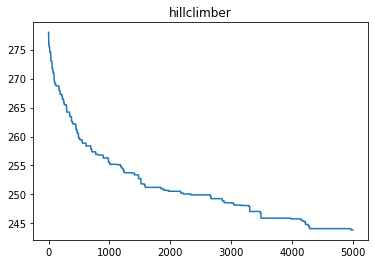

In [25]:
hillclimber_df_C, best_solution_C = random_start_hillclimber(joined_C, all_households_C, rel_poi_df, df_afstandn2)

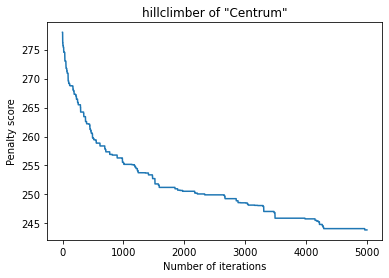

In [27]:
plt = hillclimber_df_C['best'].plot(title='hillclimber of "Centrum"')
plt.set_xlabel('Number of iterations')
plt.set_ylabel('Penalty score')
plt.figure.savefig('20200507_Centrum.pdf')

In [32]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'].isin(['T', 'N', 'F'])]
joined = joined.append(best_solution_C, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 170.63724990505773
Penalties are: 232.1286964831426


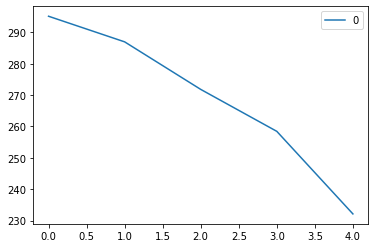

In [33]:
lst = [295.12, 286.96, 271.81, 258.44, 232.13]
pd.DataFrame(lst).plot()

### Conclusion
Preliminary results show that optimization for the different stadsdelen proves to be efficient and working. A new step is to compare the initial results of the current situation with the final score and to see what makes the difference. Another thing to investigate is the huge performance optimization of the Zuidoost part

In [83]:
# joined_total = joined_start.set_index('s1_afv_nodes').join(joined.set_index('s1_afv_nodes'), rsuffix='_new', lsuffix='_old')
# joined_total['rest_difference'] = -(joined_total['rest_new'] - joined_total['rest_old'])
# joined_total['plastic_difference'] = -(joined_total['plastic_new'] - joined_total['plastic_old'])
# joined_total['paper_difference'] = -(joined_total['papier_new'] - joined_total['papier_old'])
# joined_total['glass_difference'] = -(joined_total['glas_new'] - joined_total['glas_old'])
# joined_total['textile_difference'] = -(joined_total['textiel_new'] - joined_total['textiel_old'])
# # joined_total[['rest_difference', 'plastic_difference', 'paper_difference', 'glass_difference', 'textile_difference', 'totaal_new']]
# tmp = joined_total[(joined_total['totaal_old'] > 10)][['cluster_x_old', 'cluster_y_old', 'rest_old', 'rest_new', 'totaal_old', 'totaal_new', 'stadsdeel_old']]
# print(tmp['stadsdeel_old'].value_counts())
# joined_total.sum()

### Calculation of lower and upper bounds

In [ ]:
# Lower bound
joined_cluster_distance = joined.set_index('s1_afv_nodes').join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index().rename(columns={'index': 'van_s1_afv_nodes'})
joined_cluster_distance = joined_cluster_distance.sort_values(by='afstand')
pivot = joined_cluster_distance.groupby('naar_s1_afv_nodes').first()
lower_bound = (pivot['afstand'] * pivot['count']).sum() / pivot['count'].sum()
lower_bound